>># **PROJET : Segmentez des clients d'un site e-commerce**

>>>Source du jeu de données : 	https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?resource=download


>>>>>># **TRAITEE PROJET :**




># **Importation de librairies**

Importons dans un premier temps l'ensemble des librairies qui vont nous servir tout au long de l'étude :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime as dt

Reglages de quelques paramètres

In [ ]:
#Formatons les colonnes en faisant en sorte que tous les décimaux soit affichés avec 3 chiffres après la virgule
pd.set_option('display.float_format', '{:.3f}'.format)

# Change les parametre de panda pour afficher toutes colonnes
pd.set_option('display.max_columns', None)

# **Exploration des données**

In [ ]:
df_for_essais = pd.read_csv('df_for_essais.csv')

>## **Aperçu des données**

In [ ]:
df_for_essais.head()

Identifiant_commande                Identifiant_client  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  Statut_commande  Horodatage_achat_annee  Horodatage_achat_mois  \
0       delivered                    2017                     10   
1       delivered                    2018                      7   
2       delivered                    2018                      8   
3       delivered                    2017                     11   
4       delivered                    2018                      2   

  Horodatage_achat_mois_nom Horodatage_achat_annee_mois  \
0                       Oct                     2017 10   
1                       Jul                     2018 07   
2                       Aug                     2018 08   
3                       Nov                     2017 11   
4                       Feb                     2018 02   

   Horodatage_achat_jour date_Horodatage_achat  Horodatage_achat_dayofweek  \
0                      2             2017 10 2                           1   
1                     24             2018 7 24                           2   
2                      8              2018 8 8                           3   
3                     18            2017 11 18                           6   
4                     13             2018 2 13                           2   

  Horodatage_achat_dayofweek_nom  Horodatage_achat_heure  \
0                            Mon                      10   
1                            Tue                      20   
2                            Wed                       8   
3                            Sat                      19   
4                            Tue                      21   

  Horodatage_achat_time_day  Date_achat Heure_achat Date_validation  \
0                        AM  2017-10-02    10:56:33      2017-10-02   
1                        PM  2018-07-24    20:41:37      2018-07-26   
2                        AM  2018-08-08    08:38:49      2018-08-08   
3                        PM  2017-11-18    19:28:06      2017-11-18   
4                        PM  2018-02-13    21:18:39      2018-02-13   

  Heure_validation Date_livraison_transporteur Heure_livraison_transporteur  \
0         11:07:15                  2017-10-04                     19:55:00   
1         03:24:27                  2018-07-26                     14:31:00   
2         08:55:23                  2018-08-08                     13:50:00   
3         19:45:59                  2017-11-22                     13:39:59   
4         22:20:29                  2018-02-14                     19:46:34   

  Date_livraison_client Heure_livraison_client Date_livraison_estimee  \
0            2017-10-10               21:25:13             2017-10-18   
1            2018-08-07               15:27:45             2018-08-13   
2            2018-08-17               18:06:29             2018-09-04   
3            2017-12-02               00:28:42             2017-12-15   
4            2018-02-16               18:17:02             2018-02-26   

  Heure_livraison_estimee classification_horodatage_achat  \
0                00:00:00                           Matin   
1                00:00:00                            soir   
2                00:00:00                           Matin   
3                00:00:00                            soir   
4                00:00:00                            nuit   

   Identifiant_article_commande               Identifiant_produit  \
0                             1  87285b34884572647811a353c7ac498a   
1                             1  595fac2a385ac33a80bd5114aec74eb8   
2                             1  aa4383b373c6aca5d8797843e5594415  

In [ ]:
df_for_essais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112372 entries, 0 to 112371
Data columns (total 39 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Identifiant_commande             112372 non-null  object 
 1   Identifiant_client               112372 non-null  object 
 2   Statut_commande                  112372 non-null  object 
 3   Horodatage_achat_annee           112372 non-null  int64  
 4   Horodatage_achat_mois            112372 non-null  int64  
 5   Horodatage_achat_mois_nom        112372 non-null  object 
 6   Horodatage_achat_annee_mois      112372 non-null  object 
 7   Horodatage_achat_jour            112372 non-null  int64  
 8   date_Horodatage_achat            112372 non-null  object 
 9   Horodatage_achat_dayofweek       112372 non-null  int64  
 10  Horodatage_achat_dayofweek_nom   112372 non-null  object 
 11  Horodatage_achat_heure           112372 non-null  int64  
 12  Ho

# **Analyse RFM**


Ici, nous allons effectuer les opérations suivantes :

Pour la récence : calculez le nombre de jours entre la date actuelle et la date du dernier achat de chaque client.

Pour la fréquence: calculez le nombre de commandes pour chaque client.

Pour Montant, calculer la somme des prix d'achat pour chaque client.

>> **Récupérer les données nécessaires**

* Identifions les clients et leur dernier achat (la date la plus récente)

In [ ]:
df_for_essais['Date_achat'] = pd.to_datetime(df_for_essais['Date_achat'])
df_for_essais['Date_achat']

0        2017-10-02
1        2018-07-24
2        2018-08-08
3        2017-11-18
4        2018-02-13
            ...    
112367   2018-02-06
112368   2017-08-27
112369   2018-01-08
112370   2018-01-08
112371   2018-03-08
Name: Date_achat, Length: 112372, dtype: datetime64[ns]

In [ ]:
df_for_essais['Date_achat'].max()

Timestamp('2018-09-03 00:00:00')

In [ ]:
recente_commande_effectuee = df_for_essais[df_for_essais['Date_achat'] == df_for_essais['Date_achat'].max()]
recente_commande_effectuee

Identifiant_commande                Identifiant_client  \
70346  54282e97f61c23b78330c15b154c867d  4b7decb9b58e2569548b8b4c8e20e8d7   

      Statut_commande  Horodatage_achat_annee  Horodatage_achat_mois  \
70346         shipped                    2018                      9   

      Horodatage_achat_mois_nom Horodatage_achat_annee_mois  \
70346                       Sep                     2018 09   

       Horodatage_achat_jour date_Horodatage_achat  \
70346                      3              2018 9 3   

       Horodatage_achat_dayofweek Horodatage_achat_dayofweek_nom  \
70346                           1                            Mon   

       Horodatage_achat_heure Horodatage_achat_time_day Date_achat  \
70346                       9                        AM 2018-09-03   

      Heure_achat Date_validation Heure_validation  \
70346    09:06:57      2018-09-03         17:40:06   

      Date_livraison_transporteur Heure_livraison_transporteur  \
70346                  2018-09-04                     15:25:00   

      Date_livraison_client Heure_livraison_client Date_livraison_estimee  \
70346                   NaN                    NaN             2018-09-06   

      Heure_livraison_estimee classification_horodatage_achat  \
70346                00:00:00                           Matin   

       Identifiant_article_commande               Identifiant_produit  \
70346                             1  b98992ea80b467987a7fbb88e7f2076a   

                    Identifiant_vendeur    Prix  Frais_de_port  \
70346  25be943a321c8938947bdaabca979a90 145.000         21.460   

      Date_limite_livraison Heure_livraison_livraison  \
70346            2018-09-05                  17:30:54   

                Identifiant_commentaire  Score_commentaire Titre_commentaire  \
70346  6efce984242ca6456d74750810733a03                  1               NaN   

      Message_commentaire Date_creation_commentaire  \
70346          Nao recebi                2018-08-31   

      Heure_creation_commentaire Date_réponse_commentaire  \
70346                   00:00:00               2018-08-31   

      Heure_réponse_commentaire  
70346                  09:51:47

In [ ]:
date_achat_anciens = df_for_essais['Date_achat'].loc[~(df_for_essais['Date_achat'] ==  df_for_essais['Date_achat'].max())]
date_achat_anciens

0        2017-10-02
1        2018-07-24
2        2018-08-08
3        2017-11-18
4        2018-02-13
            ...    
112367   2018-02-06
112368   2017-08-27
112369   2018-01-08
112370   2018-01-08
112371   2018-03-08
Name: Date_achat, Length: 112371, dtype: datetime64[ns]

>> **Récence (R) :** le nombre de jours écoulés depuis le dernier achat (plus récent est mieux)

In [ ]:
recence = df_for_essais.groupby('Identifiant_client')['Date_achat'].max() - df_for_essais['Date_achat'].min()
recence = recence.dt.days.rename('recence')
recence

Identifiant_client
00012a2ce6f8dcda20d059ce98491703    436
000161a058600d5901f007fab4c27140    315
0001fd6190edaaf884bcaf3d49edf079    177
0002414f95344307404f0ace7a26f1d5    346
000379cdec625522490c315e70c7a9fb    575
                                   ... 
fffcb937e9dd47a13f05ecb8290f4d3e    559
fffecc9f79fd8c764f843e9951b11341    571
fffeda5b6d849fbd39689bb92087f431    625
ffff42319e9b2d713724ae527742af25    647
ffffa3172527f765de70084a7e53aae8    363
Name: recence, Length: 97917, dtype: int64

>> **Fréquence (F) :** le nombre de commandes effectuées au cours d'une période de temps donnée (plus élevé est mieux)

In [ ]:
frequence = df_for_essais.groupby('Identifiant_client')['Identifiant_article_commande'].count().rename('frequence')
frequence

Identifiant_client
00012a2ce6f8dcda20d059ce98491703    1
000161a058600d5901f007fab4c27140    1
0001fd6190edaaf884bcaf3d49edf079    1
0002414f95344307404f0ace7a26f1d5    1
000379cdec625522490c315e70c7a9fb    1
                                   ..
fffcb937e9dd47a13f05ecb8290f4d3e    1
fffecc9f79fd8c764f843e9951b11341    1
fffeda5b6d849fbd39689bb92087f431    1
ffff42319e9b2d713724ae527742af25    1
ffffa3172527f765de70084a7e53aae8    2
Name: frequence, Length: 97917, dtype: int64

>> **Montant (M) :** le montant total des commandes effectuées au cours d'une période de temps donnée (plus élevé est mieux)

In [ ]:
montant = df_for_essais.groupby('Identifiant_client')['Prix'].sum().rename('montant')
montant

Identifiant_client
00012a2ce6f8dcda20d059ce98491703    89.800
000161a058600d5901f007fab4c27140    54.900
0001fd6190edaaf884bcaf3d49edf079   179.990
0002414f95344307404f0ace7a26f1d5   149.900
000379cdec625522490c315e70c7a9fb    93.000
                                     ...  
fffcb937e9dd47a13f05ecb8290f4d3e    78.000
fffecc9f79fd8c764f843e9951b11341    54.900
fffeda5b6d849fbd39689bb92087f431    47.900
ffff42319e9b2d713724ae527742af25   199.900
ffffa3172527f765de70084a7e53aae8    21.800
Name: montant, Length: 97917, dtype: float64

>> **Construisons notre RFM**

In [ ]:
rfm = pd.concat([recence, frequence, montant], axis=1)
rfm = rfm.reset_index()
rfm

Identifiant_client  recence  frequence  montant
0      00012a2ce6f8dcda20d059ce98491703      436          1   89.800
1      000161a058600d5901f007fab4c27140      315          1   54.900
2      0001fd6190edaaf884bcaf3d49edf079      177          1  179.990
3      0002414f95344307404f0ace7a26f1d5      346          1  149.900
4      000379cdec625522490c315e70c7a9fb      575          1   93.000
...                                 ...      ...        ...      ...
97912  fffcb937e9dd47a13f05ecb8290f4d3e      559          1   78.000
97913  fffecc9f79fd8c764f843e9951b11341      571          1   54.900
97914  fffeda5b6d849fbd39689bb92087f431      625          1   47.900
97915  ffff42319e9b2d713724ae527742af25      647          1  199.900
97916  ffffa3172527f765de70084a7e53aae8      363          2   21.800

[97917 rows x 4 columns]

In [ ]:
rfm.columns

Index(['Identifiant_client', 'recence', 'frequence', 'montant'], dtype='object')

<ipython-input-15-597f2affbcdc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(recence, bins=50, kde=True, hist=True, hist_kws={"edgecolor": "black", "alpha": 0.5},


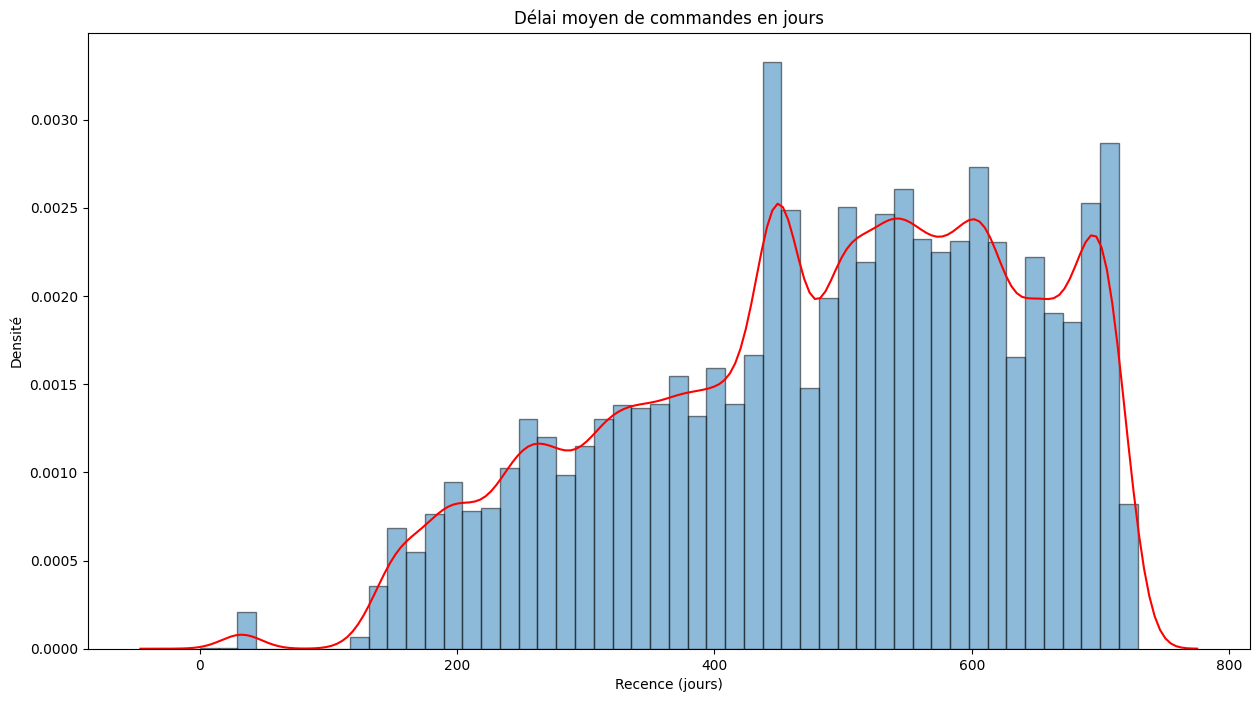

In [ ]:
# Tracer l'histogramme avec une courbe de densité gaussienne
plt.figure(figsize=(15, 8))
sns.distplot(recence, bins=50, kde=True, hist=True, hist_kws={"edgecolor": "black", "alpha": 0.5},
             kde_kws={"color": "red", "label": "Courbe de densité"})

# Ajouter des légendes et des titres
plt.xlabel('Recence (jours)')
plt.ylabel('Densité')
plt.title('Délai moyen de commandes en jours')

# Afficher le graphique
plt.show()

>> ## **RFM + quartiles**

In [ ]:
# calcul des limites de chaque variable
Q1 = rfm[['recence', 'frequence', 'montant']].quantile(0.25)
Q3 = rfm[['recence', 'frequence', 'montant']].quantile(0.75)
IQR = Q3 - Q1

# définition des limites supérieure et inférieure pour chaque variable
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# identification des valeurs aberrantes
outliers = rfm[((rfm[['recence', 'frequence', 'montant']] < lower_bound) | (rfm[['recence', 'frequence', 'montant']] > upper_bound)).any(axis=1)]

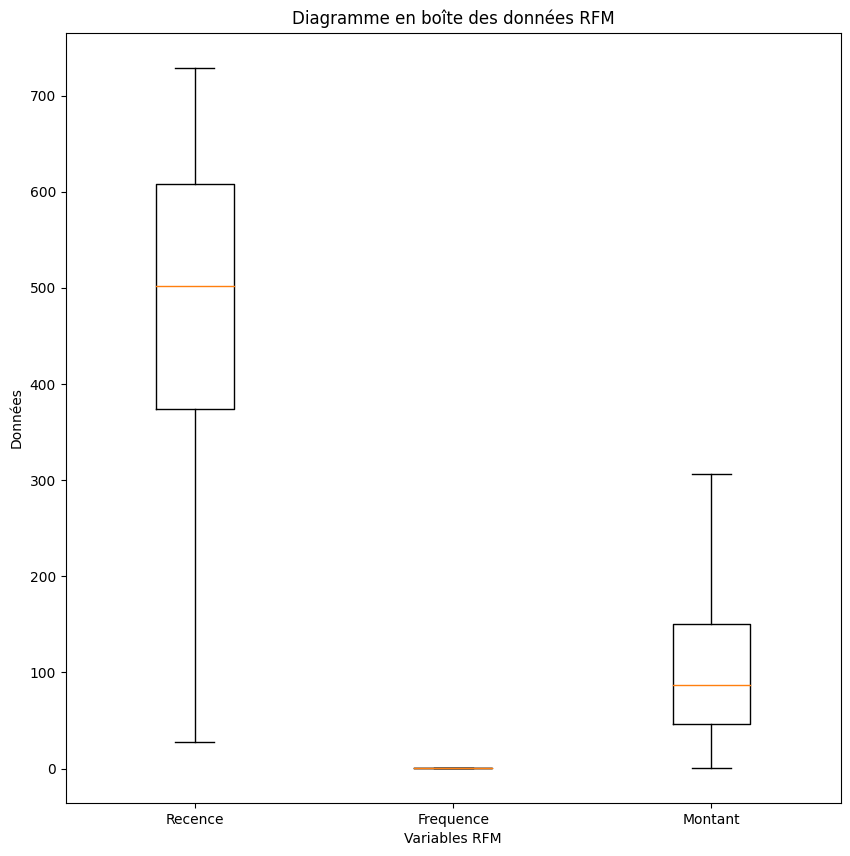

In [ ]:
plt.figure(figsize=(10,10))

# Tracer un diagramme en boîte de rfm_normalized
plt.boxplot(rfm[['recence', 'frequence', 'montant']], labels=['Recence', 'Frequence', 'Montant'], showfliers=False)

# Ajouter des titres et des légendes
plt.title('Diagramme en boîte des données RFM')
plt.xlabel('Variables RFM')
plt.ylabel('Données')
plt.show()

>> Calculons le quantile des valeurs RFM

Les clients dont la récurrence, la fréquence et les montants monétaires sont les plus faibles sont considérés comme les meilleurs.

In [ ]:
# Calcul des quartiles pour la variable "recence"
rfm['r_quartile'] = pd.cut(rfm['recence'], bins=5, labels=['1','2','3','4','5'])

# Calcul des quartiles pour la variable "frequence"
rfm['f_quartile'] = pd.cut(rfm['frequence'], bins=5, labels=['1','2','3','4','5'])

# Calcul des quartiles pour la variable "montant"
rfm['m_quartile'] = pd.cut(rfm['montant'], bins=5, labels=['1','2','3','4','5'])


In [ ]:
rfm.head()

Identifiant_client  recence  frequence  montant r_quartile  \
0  00012a2ce6f8dcda20d059ce98491703      436          1   89.800          3   
1  000161a058600d5901f007fab4c27140      315          1   54.900          3   
2  0001fd6190edaaf884bcaf3d49edf079      177          1  179.990          2   
3  0002414f95344307404f0ace7a26f1d5      346          1  149.900          3   
4  000379cdec625522490c315e70c7a9fb      575          1   93.000          4   

  f_quartile m_quartile  
0          1          1  
1          1          1  
2          1          1  
3          1          1  
4          1          1

In [ ]:
print('r_quartile :', rfm.r_quartile.nunique())
print('\n')
print('f_quartile :', rfm.f_quartile.nunique())
print('\n')
print('m_quartile :', rfm.m_quartile.nunique())

r_quartile : 5


f_quartile : 5


m_quartile : 4


In [ ]:
# Concaténation des quartiles en un score RFM
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

Identifiant_client  recence  frequence  montant r_quartile  \
0  00012a2ce6f8dcda20d059ce98491703      436          1   89.800          3   
1  000161a058600d5901f007fab4c27140      315          1   54.900          3   
2  0001fd6190edaaf884bcaf3d49edf079      177          1  179.990          2   
3  0002414f95344307404f0ace7a26f1d5      346          1  149.900          3   
4  000379cdec625522490c315e70c7a9fb      575          1   93.000          4   

  f_quartile m_quartile RFM_Score  
0          1          1       311  
1          1          1       311  
2          1          1       211  
3          1          1       311  
4          1          1       411

Par exemple, si un client a un score de recence de 3, un score de frequence de 1 et un score de montant de 1, le score RFM final pour ce client sera "311".

>> **Interprétation des résultats RFM**


Combinez les trois quartiles (r_quartile, f_quartile, m_quartile) dans une seule colonne, ce classement vous aidera à segmenter les groupes de clients.

>>> Filtrons les meilleurs clients

In [ ]:
rfm[rfm['RFM_Score']=='111'].sort_values('montant', ascending=False)

Identifiant_client  recence  frequence  montant  \
70471  b7a4690ba0bc91f249bb7fd25b3be748      145          1 1999.000   
22628  3afe43b81b0d102b2ca5138ab53f418a      144          2 1718.000   
65079  a9dc96b027d1252bbac0a9b72d837fc6       34          1 1399.000   
11185  1d34ed25963d5aae4cf3d7f3a4cda173       32          1 1299.990   
93723  f4af9116429bdaa90732a4ad05f1db2c      144          1 1299.000   
...                                 ...      ...        ...      ...   
24184  3f402674c608ea67085eb5e0ec4d96ef      123          1    6.900   
14976  27129ce1ebca4ffa23a049c51cc8ec95      123          1    6.900   
34165  59b219b2e1d1b20580c3551e07db6648       36          1    6.000   
22886  3bb0f1d5881cfaf2de8eacdbe88b2d58      144          1    3.900   
80881  d2c63ad286e3ca9dd69218008d61ff81      123          1    2.900   

      r_quartile f_quartile m_quartile RFM_Score  
70471          1          1          1       111  
22628          1          1          1       111  
65079          1          1          1       111  
11185          1          1          1       111  
93723          1          1          1       111  
...          ...        ...        ...       ...  
24184          1          1          1       111  
14976          1          1          1       111  
34165          1          1          1       111  
22886          1          1          1       111  
80881          1          1          1       111  

[901 rows x 8 columns]

>>> ### **KMeans Clustering**

 J'ai tracé les valeurs Recence, Frequence et Montant dans un diagramme en boîte, mais ces données souffrent de valeurs aberrantes qui pourraient nuire à la précision des prédictions.

 Je vais donc utiliser un scalaire standard pour normaliser les données.

In [ ]:
rfm_data = rfm[['recence', 'frequence', 'montant']]
rfm_data.head()

recence  frequence  montant
0      436          1   89.800
1      315          1   54.900
2      177          1  179.990
3      346          1  149.900
4      575          1   93.000

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_data)

In [ ]:
rfm_normalized

array([[-0.3092099 , -0.26824985, -0.23000999],
       [-1.09789404, -0.26824985, -0.39603613],
       [-1.99738505, -0.26824985,  0.1990415 ],
       ...,
       [ 0.92270169, -0.26824985, -0.4293365 ],
       [ 1.0660988 , -0.26824985,  0.29375727],
       [-0.78502761,  1.54885295, -0.55349931]])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusters_range = range(2, 10)
inertia = []
silhouette_scores = []
centroids = []

for nbre_cluster in clusters_range:
    # On instancie notre Kmeans
    kmeans = KMeans(n_clusters=nbre_cluster, n_init=50, init='random')

    # On l'entraine :
    kmeans.fit(rfm_normalized)

    # Ajoutons la valeur de l'inertie du modèle pour le nombre de clusters à la liste inertia
    inertia.append(kmeans.inertia_)

    # Calculons le score de silhouette pour les clusters obtenus
    silhouette_scores.append(silhouette_score(rfm_normalized, kmeans.labels_))
    print("Pour n_clusters={0}, le coef. de silhouette pour la rfm normal est de : {1}".format(nbre_cluster, silhouette_scores))

    # Ajoutons les coordonnées des centroïdes à la liste centroids
    centroids.append(kmeans.cluster_centers_)
    print("son centroïde est de :", centroids)

    print('\n')

Pour n_clusters=2, le coef. de silhouette pour la rfm normal est de : [0.38079036994565996]
son centroïde est de : [array([[-0.98446328,  0.02079056,  0.01598844],
       [ 0.71464819, -0.01509242, -0.01160643]])]


Pour n_clusters=3, le coef. de silhouette pour la rfm normal est de : [0.38079036994565996, 0.4179490824544091]
son centroïde est de : [array([[-0.98446328,  0.02079056,  0.01598844],
       [ 0.71464819, -0.01509242, -0.01160643]]), array([[-0.97921884, -0.12169164, -0.10792368],
       [ 0.72171041, -0.13337386, -0.11342413],
       [ 0.01791232,  2.89192893,  2.50178143]])]


Pour n_clusters=4, le coef. de silhouette pour la rfm normal est de : [0.38079036994565996, 0.4179490824544091, 0.4369230478921108]
son centroïde est de : [array([[-0.98446328,  0.02079056,  0.01598844],
       [ 0.71464819, -0.01509242, -0.01160643]]), array([[-0.97921884, -0.12169164, -0.10792368],
       [ 0.72171041, -0.13337386, -0.11342413],
       [ 0.01791232,  2.89192893,  2.50178143]]), ar

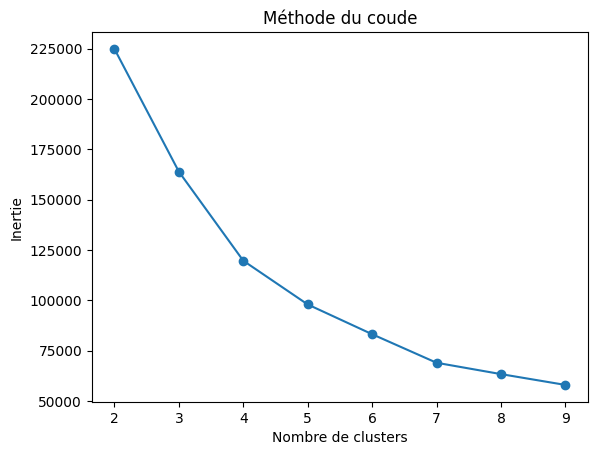

In [ ]:
# Tracer la courbe du coude
plt.plot(clusters_range, inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

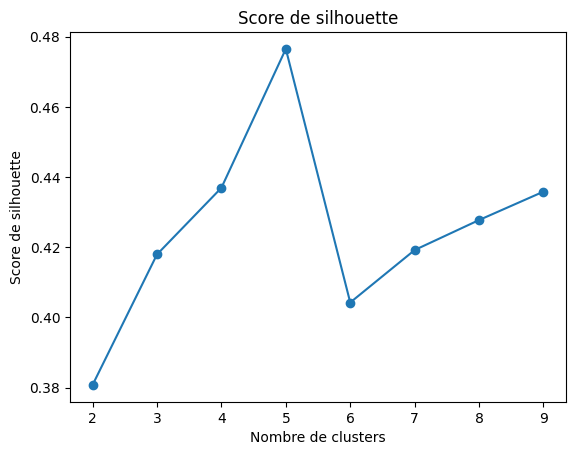

In [ ]:
# Tracer le score de silhouette
plt.plot(clusters_range, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette')
plt.show()

In [ ]:
# Stocker les centroids du meilleur nombre de clusters
best_cluster = silhouette_scores.index(max(silhouette_scores))
best_centroids = centroids[best_cluster]

In [ ]:
indice_cluster = best_cluster

In [ ]:
meilleur_cluster = clusters_range[indice_cluster]

In [ ]:
meilleur_coef_silhouette_RFM_KCL = silhouette_scores[indice_cluster]

In [ ]:
print('Meilleur cluster :', meilleur_cluster)
print('\n')
print('Meilleur silhouette_scores :', meilleur_coef_silhouette_RFM_KCL)
print('\n')
print('Meilleur centroïde :', best_centroids)

Meilleur cluster : 5


Meilleur silhouette_scores : 0.47648101266164905


Meilleur centroïde : [[ 0.07239767  1.81532455  0.11527822]
 [ 0.63193501 -0.26824985 -0.15016367]
 [-0.00909498 -0.04409686  4.56318157]
 [-1.12507133 -0.24614893 -0.14542201]
 [-0.04834491  6.92588297  1.0113511 ]]


Modèle finalisé avec N_clusters = 5 sur la base de l'analyse ci-dessus

Ajustement du modèle avec les 5 clusters finalisées.

In [ ]:
kmeans_kcl = KMeans(n_clusters=5, n_init=50, init='random')
kmeans_kcl.fit(rfm_normalized)

KMeans(init='random', n_clusters=5, n_init=50)

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(rfm_normalized)
print(pca.explained_variance_ratio_.cumsum())

rfm_trans = pca.transform(rfm_normalized)

[0.38589579 0.71916975]


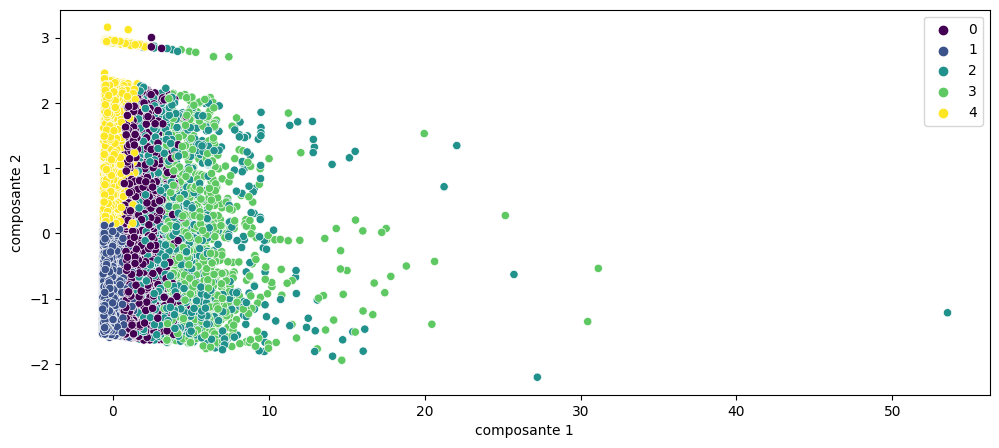

In [ ]:
plt.figure(figsize = (12, 5))

sns.scatterplot(x=rfm_trans[:, 0], y=rfm_trans[:, 1], hue=kmeans_kcl.labels_, palette='viridis')
plt.xlabel('composante 1')
plt.ylabel('composante 2')
plt.show()

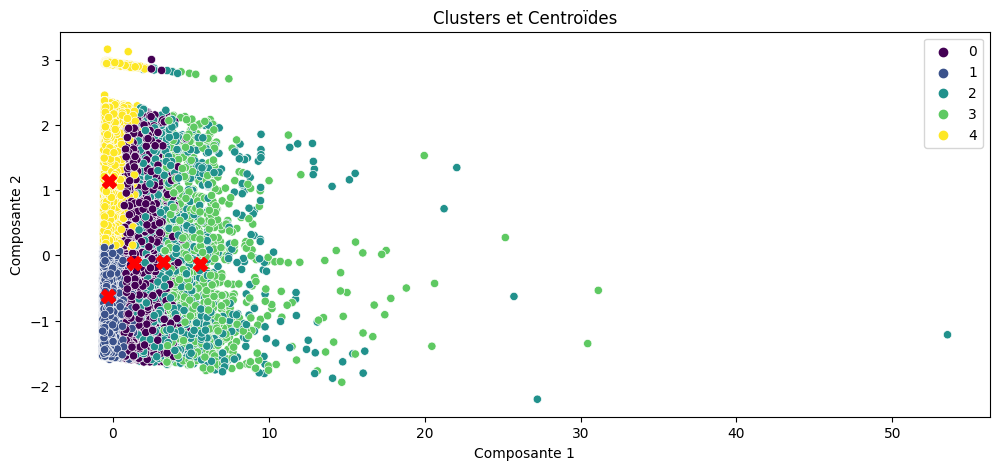

In [ ]:
# Tracer les points
plt.figure(figsize=(12, 5))
sns.scatterplot(x=rfm_trans[:, 0], y=rfm_trans[:, 1], hue=kmeans_kcl.labels_, palette='viridis')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')

# Tracer les centroïdes
centroids_trans = pca.transform(best_centroids)
plt.scatter(centroids_trans[:, 0], centroids_trans[:, 1], c='red', marker='X', s=100, label='Centroids')

plt.title('Clusters et Centroïdes')

plt.show()


In [ ]:
rfm_normalized

array([[-0.3092099 , -0.26824985, -0.23000999],
       [-1.09789404, -0.26824985, -0.39603613],
       [-1.99738505, -0.26824985,  0.1990415 ],
       ...,
       [ 0.92270169, -0.26824985, -0.4293365 ],
       [ 1.0660988 , -0.26824985,  0.29375727],
       [-0.78502761,  1.54885295, -0.55349931]])

In [ ]:
rfm_normalized = pd.DataFrame(rfm_normalized)
rfm_normalized = rfm_normalized.rename(columns={0: 'Recence', 1: 'Frequence', 2: 'Montant'})
rfm_normalized.head()

Recence  Frequence  Montant
0   -0.309     -0.268   -0.230
1   -1.098     -0.268   -0.396
2   -1.997     -0.268    0.199
3   -0.896     -0.268    0.056
4    0.597     -0.268   -0.215

>> Retransformation des données projetées dans leur unité d'origine

In [ ]:
rfm_kcl_reconstruit = scaler.inverse_transform(rfm_normalized)

In [ ]:
rfm_kcl = pd.DataFrame(rfm_kcl_reconstruit)
rfm_kcl = rfm_kcl.rename(columns={0: 'Recence', 1: 'Frequence', 2: 'Montant'})
rfm_kcl.head()

Recence  Frequence  Montant
0  436.000      1.000   89.800
1  315.000      1.000   54.900
2  177.000      1.000  179.990
3  346.000      1.000  149.900
4  575.000      1.000   93.000

In [ ]:
rfm_kcl.loc[:, 'Identifiant_client'] = rfm['Identifiant_client']

In [ ]:
rfm_kcl.head()

Recence  Frequence  Montant                Identifiant_client
0  436.000      1.000   89.800  00012a2ce6f8dcda20d059ce98491703
1  315.000      1.000   54.900  000161a058600d5901f007fab4c27140
2  177.000      1.000  179.990  0001fd6190edaaf884bcaf3d49edf079
3  346.000      1.000  149.900  0002414f95344307404f0ace7a26f1d5
4  575.000      1.000   93.000  000379cdec625522490c315e70c7a9fb

Vue d'ensemble du dataframe actuel

In [ ]:
rfm_kcl = rfm_kcl.reindex(columns=['Identifiant_client', 'Recence', 'Frequence', 'Montant'])
rfm_kcl.head()

Identifiant_client  Recence  Frequence  Montant
0  00012a2ce6f8dcda20d059ce98491703  436.000      1.000   89.800
1  000161a058600d5901f007fab4c27140  315.000      1.000   54.900
2  0001fd6190edaaf884bcaf3d49edf079  177.000      1.000  179.990
3  0002414f95344307404f0ace7a26f1d5  346.000      1.000  149.900
4  000379cdec625522490c315e70c7a9fb  575.000      1.000   93.000

Après avoir ajouté les étiquettes de regroupement résultantes dans la dernière colonne, la vue du dataframe.

In [ ]:
rfm_kcl['cluster'] = kmeans_kcl.labels_
rfm_kcl

Identifiant_client  Recence  Frequence  Montant  cluster
0      00012a2ce6f8dcda20d059ce98491703  436.000      1.000   89.800        4
1      000161a058600d5901f007fab4c27140  315.000      1.000   54.900        4
2      0001fd6190edaaf884bcaf3d49edf079  177.000      1.000  179.990        4
3      0002414f95344307404f0ace7a26f1d5  346.000      1.000  149.900        4
4      000379cdec625522490c315e70c7a9fb  575.000      1.000   93.000        1
...                                 ...      ...        ...      ...      ...
97912  fffcb937e9dd47a13f05ecb8290f4d3e  559.000      1.000   78.000        1
97913  fffecc9f79fd8c764f843e9951b11341  571.000      1.000   54.900        1
97914  fffeda5b6d849fbd39689bb92087f431  625.000      1.000   47.900        1
97915  ffff42319e9b2d713724ae527742af25  647.000      1.000  199.900        1
97916  ffffa3172527f765de70084a7e53aae8  363.000      2.000   21.800        0

[97917 rows x 5 columns]

In [ ]:
rfm_kcl.cluster.unique()

array([4, 1, 2, 3, 0], dtype=int32)

>>>> #### **Segmentation de la clientèle**

In [ ]:
type_client_1 = rfm_kcl.loc[rfm_kcl['cluster'] == 0]
type_client_1 = type_client_1[['Identifiant_client', 'cluster']]
display('Client 1', type_client_1.head())
print('\n')
print('Type de client au nombre de :', type_client_1.shape[0])

'Client 1'

Identifiant_client  cluster
15  000bf8121c3412d3057d32371c5d3395        0
28  001450ebb4a77efb3d68be5f7887cb1e        0
66  002f90a6eb386bc43bc9ba200db31a89        0
74  0031abfb953b66e998f67b09e7b11375        0
77  00331de1659c7f4fb660c8810e6de3f5        0



Type de client au nombre de : 8780


In [ ]:
type_client_2 = rfm_kcl.loc[rfm_kcl['cluster'] == 1]
type_client_2 = type_client_2[['Identifiant_client', 'cluster']]
display('Client 2', type_client_2.head())
print('\n')
print('Type de client au nombre de :', type_client_2.shape[0])

'Client 2'

Identifiant_client  cluster
4   000379cdec625522490c315e70c7a9fb        1
6   000419c5494106c306a97b5635748086        1
7   00046a560d407e99b969756e0b10f282        1
10  0005aefbb696d34b3424dccd0a0e9fd0        1
18  000fd45d6fedae68fc6676036610f879        1



Type de client au nombre de : 49829


In [ ]:
type_client_3 = rfm_kcl.loc[rfm_kcl['cluster'] == 2]
type_client_3 = type_client_3[['Identifiant_client', 'cluster']]
display('Client 3', type_client_3.head())
print('\n')
print('Type de client au nombre de :', type_client_3.shape[0])

'Client 3'

Identifiant_client  cluster
9    000598caf2ef4117407665ac33275130        2
44   00205ad9ba1ef4340cef86583294cf82        2
110  0049e8442c2a3e4a8d1ff5a9549abd53        2
121  005196c65bab2861e397cc85bc7664bf        2
300  00c634fb2feeb4e2767a916c2375c9b8        2



Type de client au nombre de : 2373


In [ ]:
type_client_4 = rfm_kcl.loc[rfm_kcl['cluster'] == 3]
type_client_4 = type_client_4[['Identifiant_client', 'cluster']]
display('Client 4', type_client_4.head())
print('\n')
print('Type de client au nombre de :', type_client_4.shape[0])

'Client 4'

Identifiant_client  cluster
12   00066ccbe787a588c52bd5ff404590e3        3
100  00426311a53f3c052943c88b692a3be2        3
355  00f394e6fc446865ac4097b6db69ef4a        3
496  014fb09b34197c57ae3c77a43d18475e        3
566  0179f2f4c32e0b0c2a4cb0d57e7d5a26        3



Type de client au nombre de : 1003


In [ ]:
type_client_5 = rfm_kcl.loc[rfm_kcl['cluster'] == 4]
type_client_5 = type_client_5[['Identifiant_client', 'cluster']]
display('Client 4', type_client_5.head())
print('\n')
print('Type de client au nombre de :', type_client_5.shape[0])

'Client 4'

Identifiant_client  cluster
0  00012a2ce6f8dcda20d059ce98491703        4
1  000161a058600d5901f007fab4c27140        4
2  0001fd6190edaaf884bcaf3d49edf079        4
3  0002414f95344307404f0ace7a26f1d5        4
5  0004164d20a9e969af783496f3408652        4



Type de client au nombre de : 35932


>>>> #### **Analyses**

>> Analysons les centroides des clusters

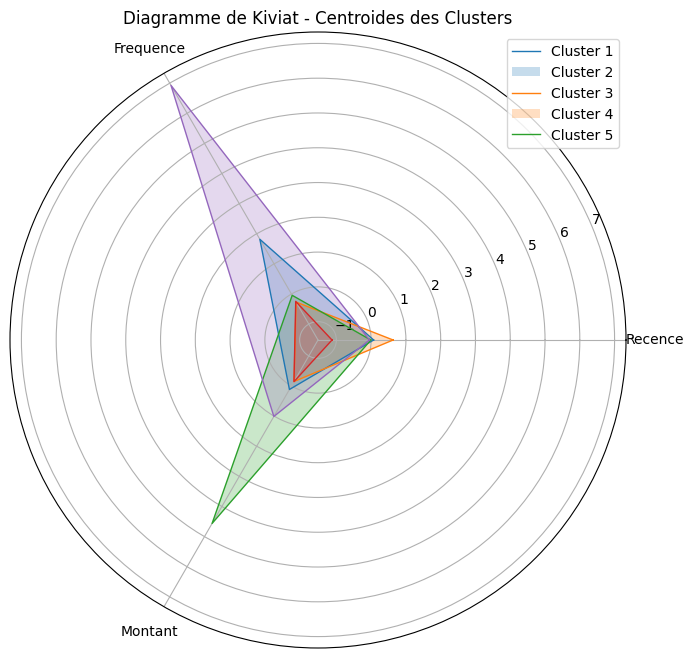

In [ ]:
# Variables
variables = ['Recence', 'Frequence', 'Montant']

# Centroides
centroids = np.array(best_centroids)

# Tracer le diagramme de Kiviat
angles = np.linspace(0, 2*np.pi, len(variables), endpoint=False).tolist()
angles += angles[:1]  # Fermer la forme en ajoutant le premier angle à la fin

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
ax.set_xticks(angles[:-1])
ax.set_xticklabels(variables)
ax.tick_params(axis='x', pad=10)  # Augmenter l'espacement entre les étiquettes et le graphique

# Tracer les centroides pour chaque cluster
for centroid in centroids:
    values = centroid.tolist()
    values += values[:1]  # Fermer la forme en ajoutant la première valeur à la fin
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

# Ajouter une légende
legend_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
ax.legend(legend_labels, loc='upper right')

plt.title('Diagramme de Kiviat - Centroides des Clusters')
plt.show()

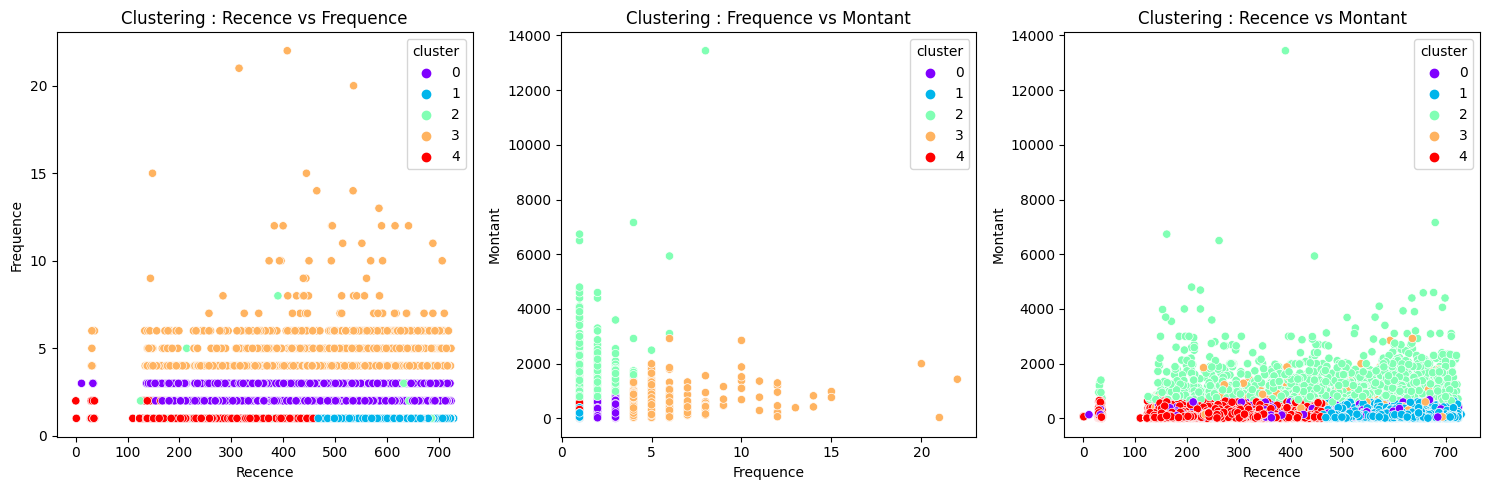

In [ ]:
# Créons une figure avec 1 ligne et 3 colonnes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Graphique 1
sns.scatterplot(x='Recence', y='Frequence', data=rfm_kcl[['Recence', 'Frequence', 'Montant']], hue=rfm_kcl['cluster'], palette='rainbow', ax=axes[0])
axes[0].set_title('Clustering : Recence vs Frequence')

# Graphique 2
sns.scatterplot(x='Frequence', y='Montant', data=rfm_kcl[['Recence', 'Frequence', 'Montant']], hue=rfm_kcl['cluster'], palette='rainbow', ax=axes[1])
axes[1].set_title('Clustering : Frequence vs Montant')

# Graphique 3
sns.scatterplot(x='Recence', y='Montant', data=rfm_kcl[['Recence', 'Frequence', 'Montant']], hue=rfm_kcl['cluster'], palette='rainbow', ax=axes[2])
axes[2].set_title('Clustering : Recence vs Montant')

# Ajustons l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichons la figure
plt.show()

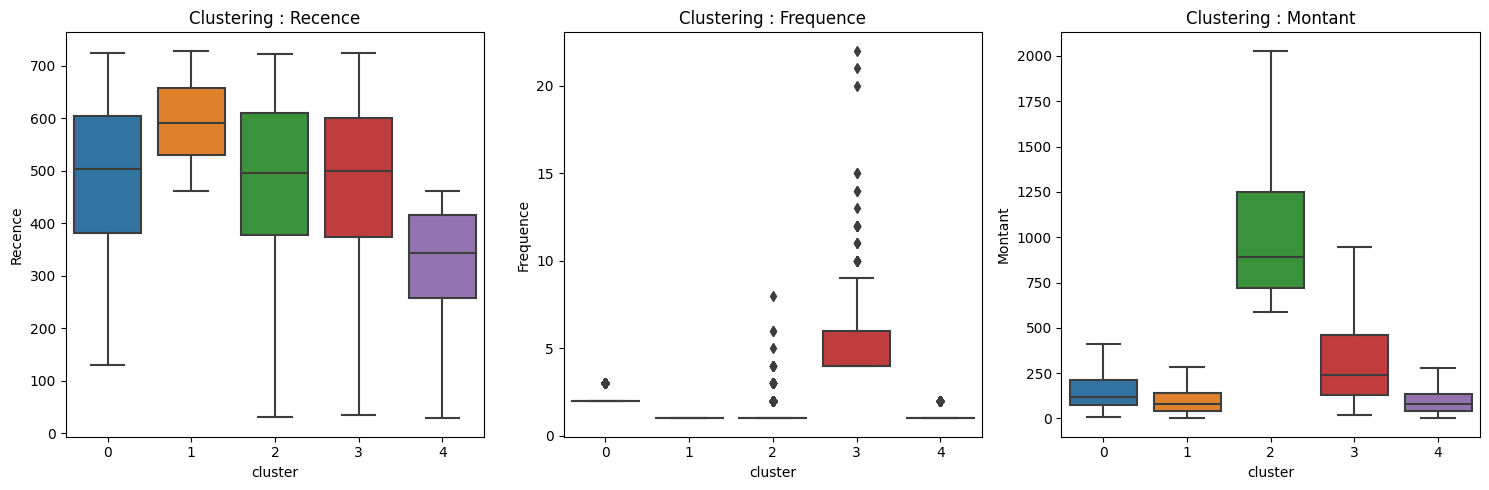

In [ ]:
# Créons une figure avec 1 ligne et 3 colonnes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Graphique 1
sns.boxplot(x=rfm_kcl['cluster'], y='Recence', data=rfm_kcl[['Recence', 'Frequence', 'Montant']], showfliers=False, ax=axes[0])
axes[0].set_title('Clustering : Recence')

# Graphique 2
sns.boxplot(x=rfm_kcl['cluster'], y='Frequence', data=rfm_kcl[['Recence', 'Frequence', 'Montant']], showfliers=True, ax=axes[1])
axes[1].set_title('Clustering : Frequence')

# Graphique 3
sns.boxplot(x=rfm_kcl['cluster'], y='Montant', data=rfm_kcl[['Recence', 'Frequence', 'Montant']], showfliers=False, ax=axes[2])
axes[2].set_title('Clustering : Montant')

# Ajustons l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichons la figure
plt.show()

>>> ### **Clustering hierarchique**

In [ ]:
X_data = rfm_data[['recence', 'frequence',	'montant']]
X_data.head()

recence  frequence  montant
0      436          1   89.800
1      315          1   54.900
2      177          1  179.990
3      346          1  149.900
4      575          1   93.000

Effectuer le clustering K-means pour obtenir les centres de cluster :

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform

# Appliquer le clustering K-means pour obtenir les centres de cluster
kmeans = KMeans(n_clusters=300, n_init=10)
kmeans.fit(X_data)
cluster_centers = kmeans.cluster_centers_

# Ajouter les coordonnées des centroïdes à la liste centroids
centroids = []
for center in cluster_centers:
    centroids.append(center.tolist())

# Calculer les distances entre les centres de cluster
distances = pdist(cluster_centers)

from scipy.spatial.distance import squareform
distance_matrix = squareform(distances)

from scipy.cluster import hierarchy

# Effectuer le clustering agglomératif avec les distances entre les centres de cluster
clusters = hierarchy.linkage(distance_matrix, method='ward', optimal_ordering=True)

# Obtenir les étiquettes de cluster à partir du modèle KMeans
cluster_labels = kmeans.labels_


<ipython-input-245-168e580c5217>:24: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = hierarchy.linkage(distance_matrix, method='ward', optimal_ordering=True)


In [ ]:
# Calculer le score silhouette
silhouette_coef = silhouette_score(X_data, cluster_labels)
print("Silhouette Score:", silhouette_coef)

print('\n')
# Afficher les coordonnées des centroïdes
print("Coordonnees des centroides:")
for i, centroid in enumerate(centroids):
    print("Cluster", i+1, ":", centroid)

Silhouette Score: 0.33466281559246797


Coordonnees des centroides:
Cluster 1 : [448.44863915715536, 1.0307287093942064, 24.033775241439287]
Cluster 2 : [239.20000000000002, 1.2249999999999999, 989.8770000000004]
Cluster 3 : [647.1210526315784, 1.1921052631578946, 188.9679473684212]
Cluster 4 : [339.4957264957261, 1.098290598290598, 74.90465811965822]
Cluster 5 : [609.0, 2.6999999999999997, 2797.3600000000006]
Cluster 6 : [615.4366041896369, 1.0639470782800442, 44.130683572215816]
Cluster 7 : [566.9814814814815, 1.4999999999999996, 496.79055555555556]
Cluster 8 : [250.8372093023255, 1.27906976744186, 276.60970930232565]
Cluster 9 : [562.6190476190476, 1.1428571428571428, 1513.6980952380954]
Cluster 10 : [466.9537572254336, 1.1618497109826587, 171.76606936416192]
Cluster 11 : [390.0, 8.0, 13440.0]
Cluster 12 : [191.93141592920443, 1.0818584070796458, 41.968871681415976]
Cluster 13 : [531.7150610583448, 1.1383989145183173, 96.92449118046146]
Cluster 14 : [446.0, 6.0, 5934.6]
Cluster 15 :

Effectuer le clustering agglomératif hiérarchique (CAH) avec les distances entre les centres de cluster :

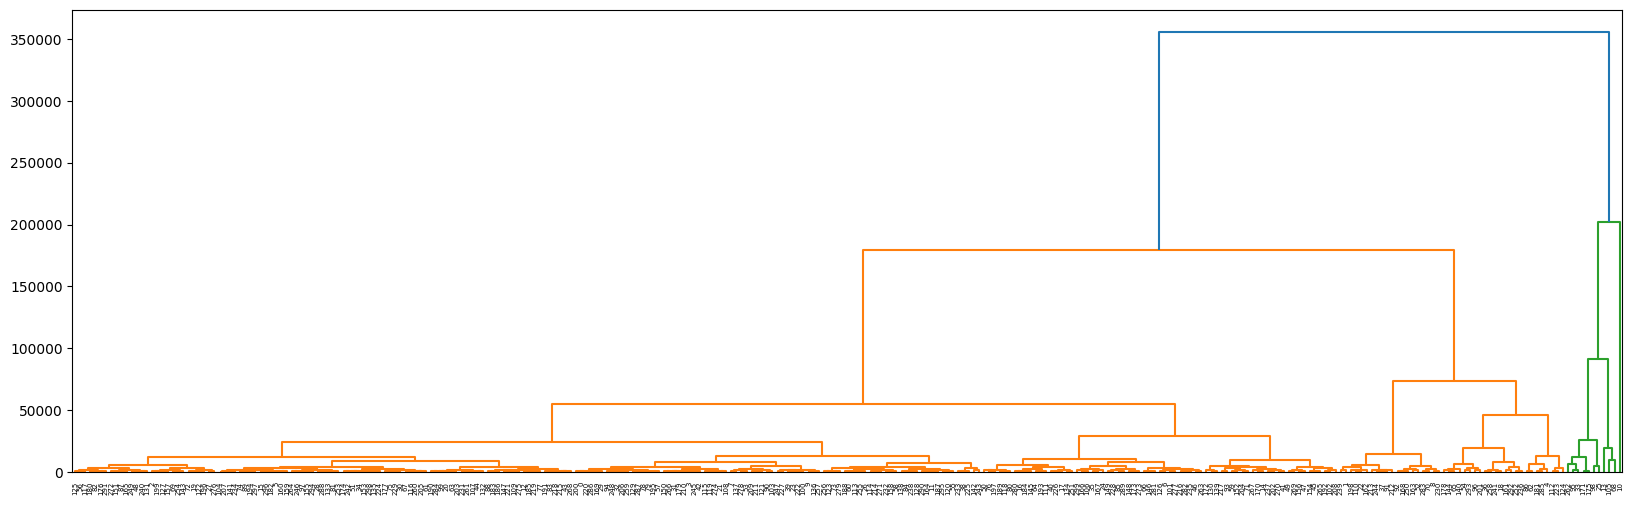

In [ ]:
# Tracer le dendrogramme
plt.figure(figsize=(20, 6))
dendrogram = hierarchy.dendrogram(clusters)

plt.show()

Et tracez les données après le regroupement agglomératif avec 300 clusters :

<ipython-input-248-67ab4e2766ea>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = hierarchy.linkage(distance_matrix, method='ward')


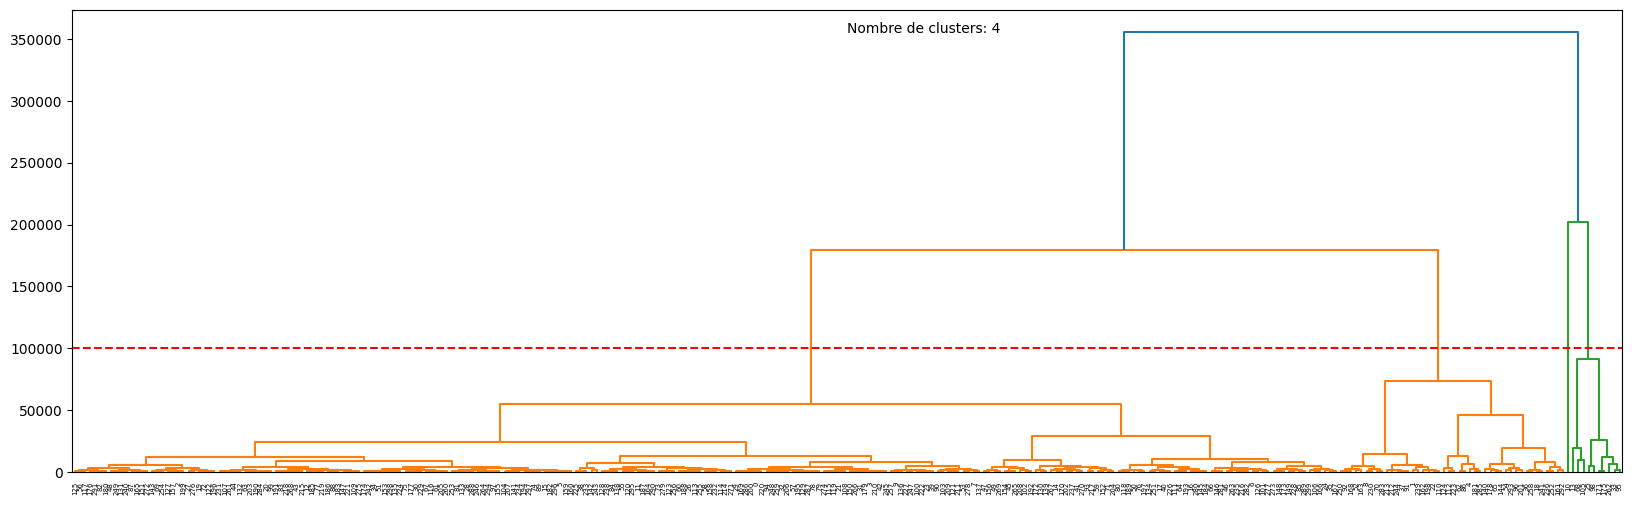

In [ ]:

# Effectuer le clustering agglomératif avec les distances entre les centres de cluster
clusters = hierarchy.linkage(distance_matrix, method='ward')

# Obtenir les clusters en coupant le dendrogramme à une distance de 100000
threshold = 100000
cluster_labels = hierarchy.fcluster(clusters, threshold, criterion='distance')

# Obtenir le nombre de clusters
num_clusters = len(set(cluster_labels))

# Tracer le dendrogramme
plt.figure(figsize=(20, 6))
dendrogram = hierarchy.dendrogram(clusters)

# Tracer une ligne horizontale basée sur la première plus grande distance entre les clusters
plt.axhline(threshold, color='red', linestyle='--')

# Afficher le nombre de clusters
plt.text(0.5, 0.95, f'Nombre de clusters: {num_clusters}', transform=plt.gca().transAxes)

plt.show()


In [ ]:
num_clusters

4

In [ ]:
# Appliquer le clustering K-means pour obtenir les centres de cluster
kmeans_ch = KMeans(n_clusters=num_clusters, n_init=10)
display(kmeans_ch.fit(rfm_data))
cluster_centers = kmeans_ch.cluster_centers_

KMeans(n_clusters=4, n_init=10)

In [ ]:
# Ajouter les coordonnées des centroïdes à la liste centroids
centroids = []
for center in cluster_centers:
    centroids.append(center.tolist())

# Calculer les distances entre les centres de cluster
distances = pdist(cluster_centers)

distance_matrix = squareform(distances)

# Effectuer le clustering agglomératif avec les distances entre les centres de cluster
clusters = hierarchy.linkage(distance_matrix, method='ward', optimal_ordering=True)

# Obtenir les étiquettes de cluster à partir du modèle KMeans
cluster_labels = kmeans_ch.labels_

<ipython-input-251-f790900102ac>:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = hierarchy.linkage(distance_matrix, method='ward', optimal_ordering=True)


In [ ]:
# Calculer le score silhouette
meilleur_coef_silhouette_RFM_CLH = silhouette_score(X_data, cluster_labels)
print("Silhouette Score:", meilleur_coef_silhouette_RFM_CLH)

print('\n')
# Afficher les coordonnées des centroïdes
print("Coordonnees des centroides:")
for i, centroid in enumerate(centroids):
    print("Cluster", i+1, ":", centroid)

Silhouette Score: 0.47019323098391


Coordonnees des centroides:
Cluster 1 : [488.8732081911262, 1.421672354948794, 556.9132047781638]
Cluster 2 : [332.66976924069166, 1.131184736367152, 98.46257522238416]
Cluster 3 : [594.2813600624494, 1.124716812306042, 97.73655834143241]
Cluster 4 : [474.74765100671146, 1.4630872483221464, 1759.7774630872539]


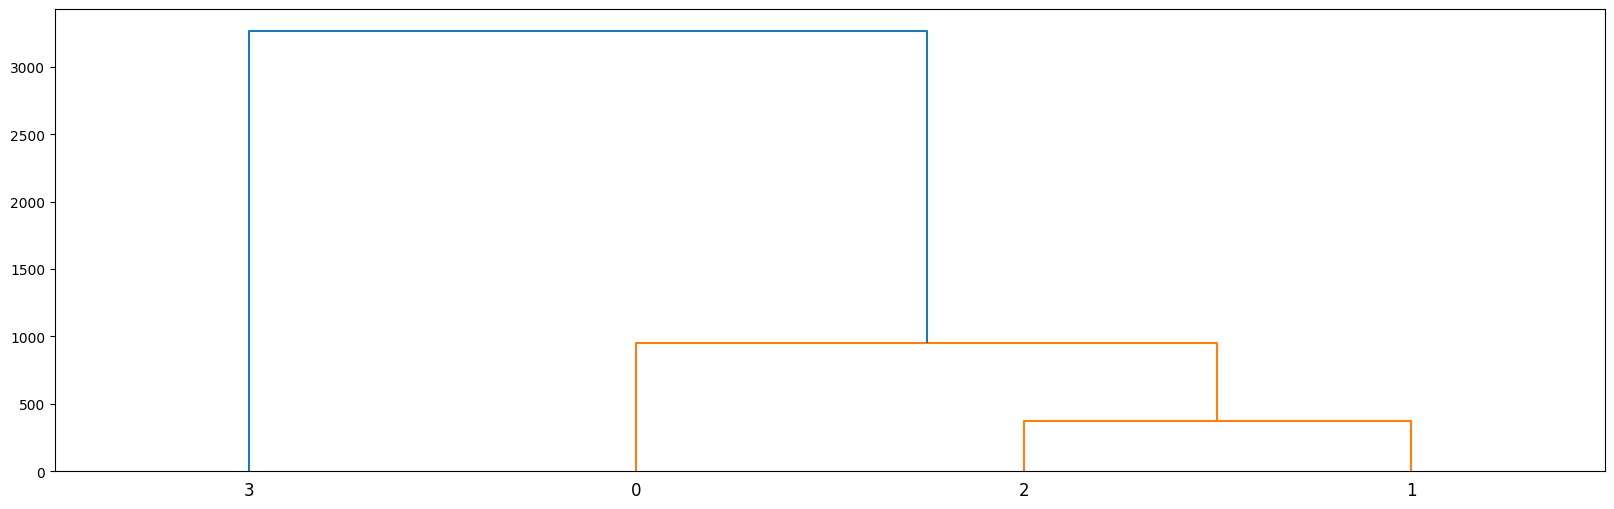

In [ ]:
# Tracer le dendrogramme
plt.figure(figsize=(20, 6))
dendrogram = hierarchy.dendrogram(clusters)

plt.show()

Modèle finalisé avec N_clusters = 5 sur la base de l'analyse ci-dessus

Ajustement du modèle avec les 5 clusters finalisées.

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X_data)
print(pca.explained_variance_ratio_.cumsum())

X_data_trans = pca.transform(X_data)

[0.65245898 0.99999564]


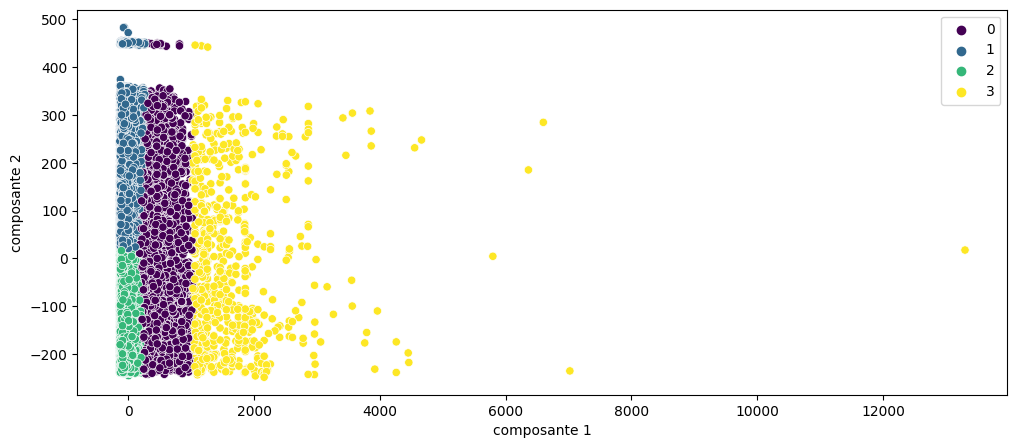

In [ ]:
plt.figure(figsize = (12, 5))

sns.scatterplot(x=X_data_trans[:, 0], y=X_data_trans[:, 1], hue=kmeans_ch.labels_, palette='viridis')
plt.xlabel('composante 1')
plt.ylabel('composante 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


'les coordonnées des centroides :'

array([[ 4.18725424e+02, -7.83015496e+00],
       [-3.88240277e+01,  1.50993858e+02],
       [-4.10469066e+01, -1.10609297e+02],
       [ 1.62165073e+03, -5.87300155e-01]])

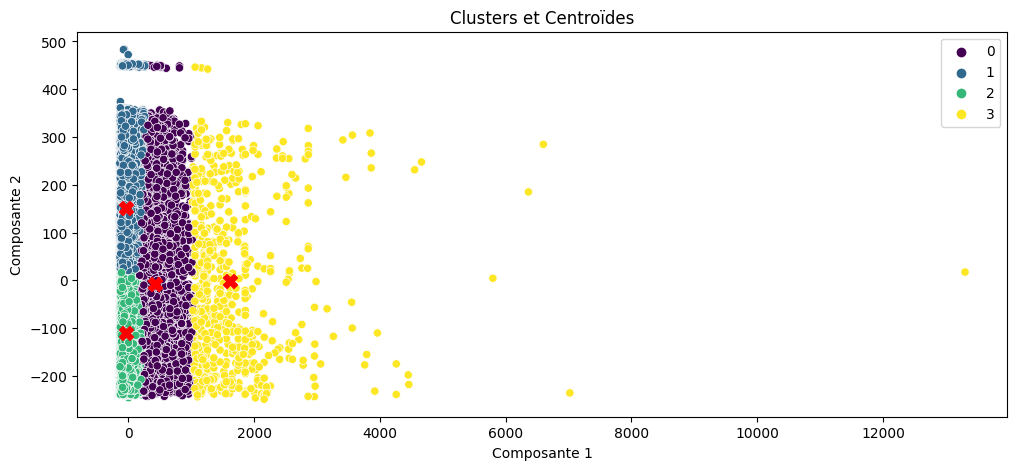

In [ ]:
# Tracer les points
plt.figure(figsize=(12, 5))
sns.scatterplot(x=X_data_trans[:, 0], y=X_data_trans[:, 1], hue=kmeans_ch.labels_, palette='viridis')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')

# Tracer les centroïdes
centroids_trans = pca.transform(centroids)
display('les coordonnées des centroides :', centroids_trans)

print('\n')

plt.scatter(centroids_trans[:, 0], centroids_trans[:, 1], c='red', marker='X', s=100, label='Centroids')

plt.title('Clusters et Centroïdes')

plt.show()


>> Retransformation des données projetées dans leur unité d'origine


In [ ]:
X_data = pca.inverse_transform(X_data_trans)
X_data = pd.DataFrame(X_data)
X_data.head()

0     1       2
0 436.000 1.128  89.800
1 315.000 1.115  54.900
2 177.000 1.168 179.990
3 346.000 1.154 149.900
4 575.000 1.128  93.000

In [ ]:
X_data = X_data.rename(columns={0: 'Recence', 1: 'Frequence', 2: 'Montant'})
X_data.head()

Recence  Frequence  Montant
0  436.000      1.128   89.800
1  315.000      1.115   54.900
2  177.000      1.168  179.990
3  346.000      1.154  149.900
4  575.000      1.128   93.000

In [ ]:
X_data.loc[:, 'Identifiant_client'] = rfm['Identifiant_client']

In [ ]:
X_data.head()

Recence  Frequence  Montant                Identifiant_client
0  436.000      1.128   89.800  00012a2ce6f8dcda20d059ce98491703
1  315.000      1.115   54.900  000161a058600d5901f007fab4c27140
2  177.000      1.168  179.990  0001fd6190edaaf884bcaf3d49edf079
3  346.000      1.154  149.900  0002414f95344307404f0ace7a26f1d5
4  575.000      1.128   93.000  000379cdec625522490c315e70c7a9fb

In [ ]:
X_data = X_data.reindex(columns=['Identifiant_client', 'Recence', 'Frequence', 'Montant'])
X_data.head()

Identifiant_client  Recence  Frequence  Montant
0  00012a2ce6f8dcda20d059ce98491703  436.000      1.128   89.800
1  000161a058600d5901f007fab4c27140  315.000      1.115   54.900
2  0001fd6190edaaf884bcaf3d49edf079  177.000      1.168  179.990
3  0002414f95344307404f0ace7a26f1d5  346.000      1.154  149.900
4  000379cdec625522490c315e70c7a9fb  575.000      1.128   93.000

In [ ]:
# Ajouter la colonne 'cluster' aux données d'origine
X_data['cluster'] =  kmeans_ch.labels_
X_data['cluster']

0        1
1        1
2        1
3        1
4        2
        ..
97912    2
97913    2
97914    2
97915    2
97916    1
Name: cluster, Length: 97917, dtype: int32

In [ ]:
X_data['cluster'].value_counts()

2    52535
1    38789
0     5849
3      744
Name: cluster, dtype: int64

>>>> #### **Segmentation de la clientèle**

In [ ]:
X_data.head()

Identifiant_client  Recence  Frequence  Montant  cluster
0  00012a2ce6f8dcda20d059ce98491703  436.000      1.128   89.800        1
1  000161a058600d5901f007fab4c27140  315.000      1.115   54.900        1
2  0001fd6190edaaf884bcaf3d49edf079  177.000      1.168  179.990        1
3  0002414f95344307404f0ace7a26f1d5  346.000      1.154  149.900        1
4  000379cdec625522490c315e70c7a9fb  575.000      1.128   93.000        2

groupby sur la colonne cluster et les 3 variables

appliquer la fonction stan.caler, retransformer les var dans leurs unités de base

In [ ]:
type_client_1 = X_data.loc[X_data['cluster'] == 0]
type_client_1 = type_client_1[['Identifiant_client', 'cluster']]
display('Client 1', type_client_1.head())
print('\n')
print('Type de client au nombre de :', type_client_1.shape[0])

'Client 1'

Identifiant_client  cluster
9   000598caf2ef4117407665ac33275130        0
25  0012a5c13793cf51e253f096a7e740dd        0
44  00205ad9ba1ef4340cef86583294cf82        0
56  0029cdf064769cabdf3186b54d068c99        0
74  0031abfb953b66e998f67b09e7b11375        0



Type de client au nombre de : 5849


In [ ]:
type_client_2 = X_data.loc[X_data['cluster'] == 1]
type_client_2 = type_client_2[['Identifiant_client', 'cluster']]
display('Client 2', type_client_2.head())
print('\n')
print('Type de client au nombre de :', type_client_2.shape[0])

'Client 2'

Identifiant_client  cluster
0  00012a2ce6f8dcda20d059ce98491703        1
1  000161a058600d5901f007fab4c27140        1
2  0001fd6190edaaf884bcaf3d49edf079        1
3  0002414f95344307404f0ace7a26f1d5        1
5  0004164d20a9e969af783496f3408652        1



Type de client au nombre de : 38789


In [ ]:
type_client_3 = X_data.loc[X_data['cluster'] == 2]
type_client_3 = type_client_3[['Identifiant_client', 'cluster']]
display('Client 3', type_client_3.head())
print('\n')
print('Type de client au nombre de :', type_client_3.shape[0])

'Client 3'

Identifiant_client  cluster
4   000379cdec625522490c315e70c7a9fb        2
6   000419c5494106c306a97b5635748086        2
7   00046a560d407e99b969756e0b10f282        2
10  0005aefbb696d34b3424dccd0a0e9fd0        2
12  00066ccbe787a588c52bd5ff404590e3        2



Type de client au nombre de : 52535


In [ ]:
type_client_4 = X_data.loc[X_data['cluster'] == 3]
type_client_4 = type_client_4[['Identifiant_client', 'cluster']]
display('Client 4', type_client_4.head())
print('\n')
print('Type de client au nombre de :', type_client_4.shape[0])

'Client 4'

Identifiant_client  cluster
110  0049e8442c2a3e4a8d1ff5a9549abd53        3
300  00c634fb2feeb4e2767a916c2375c9b8        3
388  010be179fab38706ae5cf77170b038e3        3
525  016025d2b068f90498479376f9bfcca1        3
602  019200fa574c9eda0fbc82c71fcc8fbe        3



Type de client au nombre de : 744


In [ ]:
type_client_5 = X_data.loc[X_data['cluster'] == 4]
type_client_5 = type_client_5[['Identifiant_client', 'cluster']]
display('Client 5', type_client_5.head())
print('\n')
print('Type de client au nombre de :', type_client_5.shape[0])

'Client 5'

Empty DataFrame
Columns: [Identifiant_client, cluster]
Index: []



Type de client au nombre de : 0


>>>> #### **Analyses**

>> Analysons les centroides des clusters

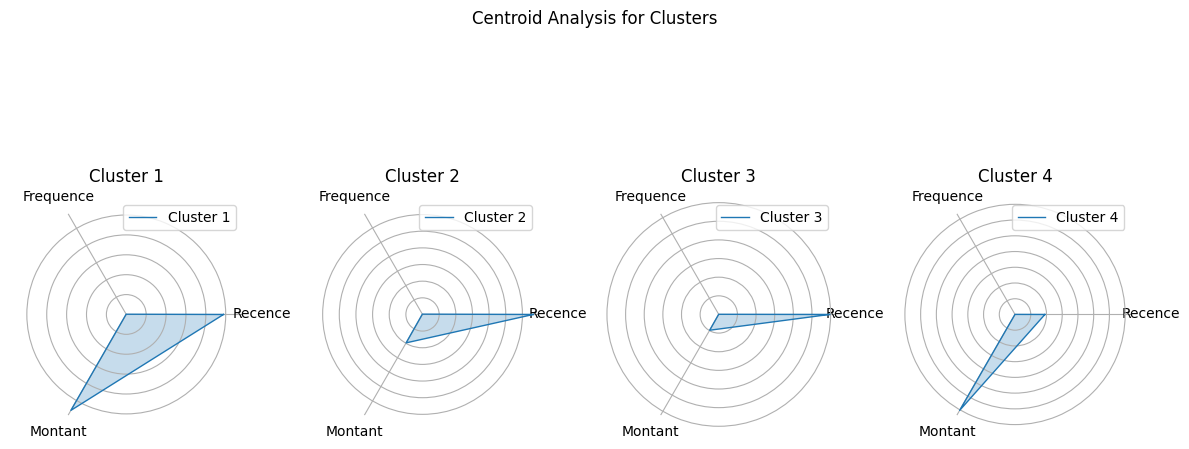

In [ ]:
# Define the variable names
variables = ['Recence', 'Frequence', 'Montant']

# Get the coordinates of the centroids
centroid_values = np.array(centroids)

# Calculate the number of clusters and variables
n_clusters = centroid_values.shape[0]
n_variables = centroid_values.shape[1]

# Create a figure with subplots
fig, axs = plt.subplots(1, n_clusters, subplot_kw={'projection': 'polar'})
fig.set_size_inches(12, 6)

# Set the title for each subplot
for i, ax in enumerate(axs):
    ax.set_title('Cluster {}'.format(i+1))

# Plot the radar charts for each cluster
for i in range(n_clusters):
    values = centroid_values[i]
    angles = np.linspace(0, 2*np.pi, n_variables, endpoint=False).tolist()
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]

    ax = axs[i]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label='Cluster {}'.format(i+1))
    ax.fill(angles, values, alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variables)
    ax.spines['polar'].set_visible(False)

    ax.legend(loc='upper right')

plt.suptitle('Centroid Analysis for Clusters')
plt.tight_layout()
plt.show()


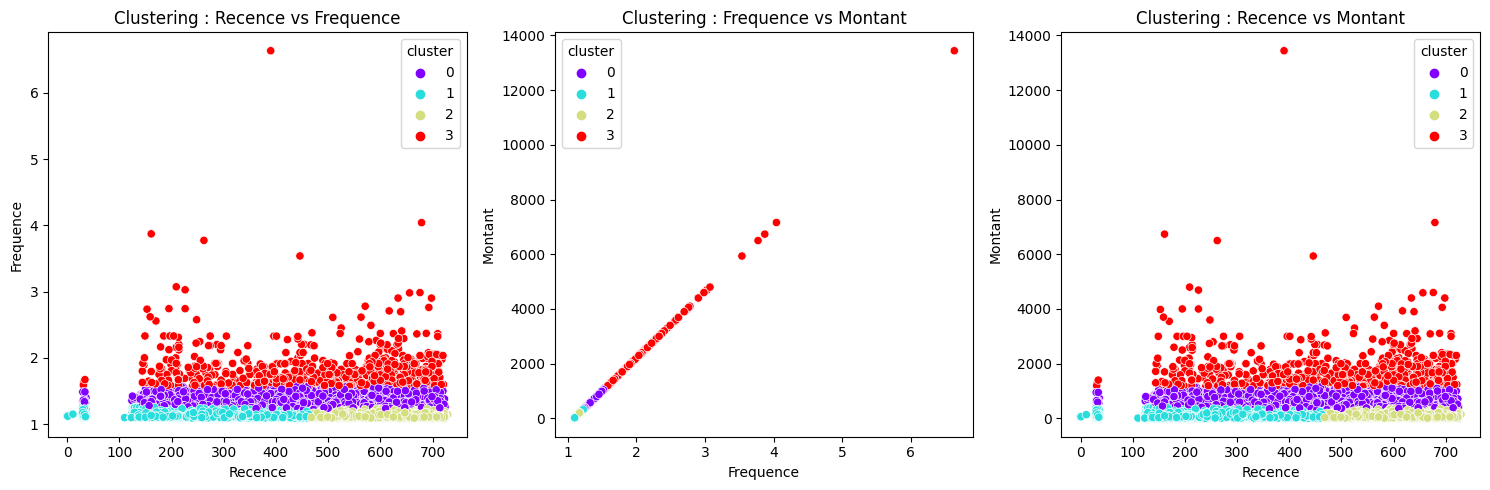

In [ ]:
# Créons une figure avec 1 ligne et 3 colonnes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Graphique 1
sns.scatterplot(x='Recence', y='Frequence', data=X_data[['Recence', 'Frequence', 'Montant']], hue=X_data['cluster'], palette='rainbow', ax=axes[0])
axes[0].set_title('Clustering : Recence vs Frequence')

# Graphique 2
sns.scatterplot(x='Frequence', y='Montant', data=X_data[['Recence', 'Frequence', 'Montant']], hue=X_data['cluster'], palette='rainbow', ax=axes[1])
axes[1].set_title('Clustering : Frequence vs Montant')

# Graphique 3
sns.scatterplot(x='Recence', y='Montant', data=X_data[['Recence', 'Frequence', 'Montant']], hue=X_data['cluster'], palette='rainbow', ax=axes[2])
axes[2].set_title('Clustering : Recence vs Montant')

# Ajustons l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichons la figure
plt.show()

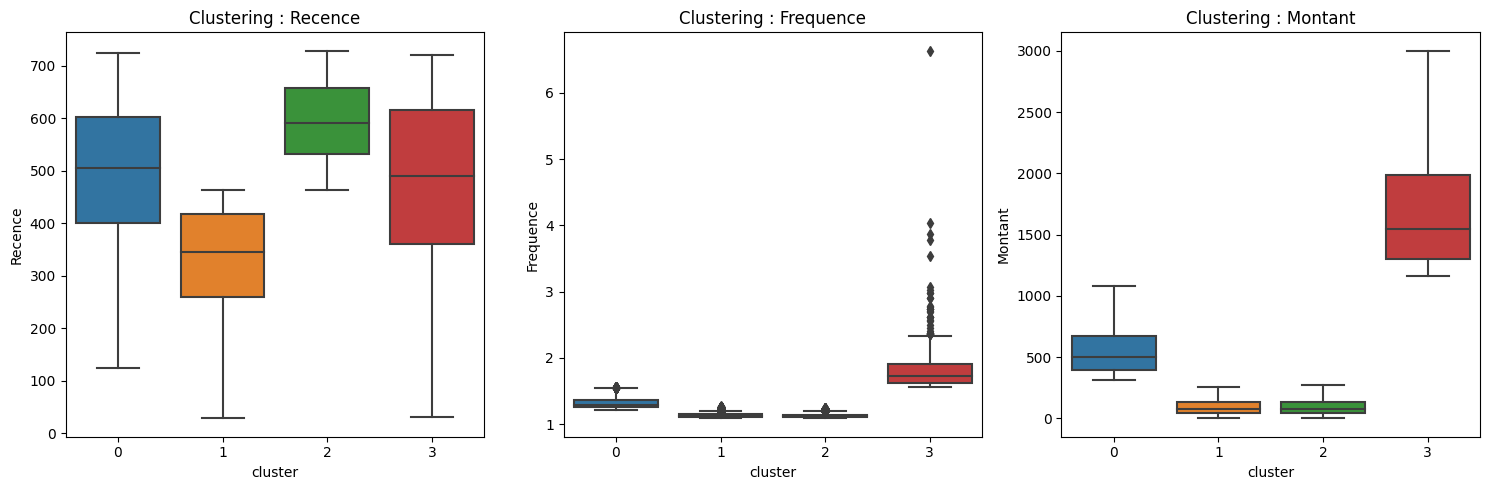

In [ ]:
# Créons une figure avec 1 ligne et 3 colonnes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Graphique 1
sns.boxplot(x=X_data['cluster'], y='Recence', data=X_data[['Recence', 'Frequence', 'Montant']], showfliers=False, ax=axes[0])
axes[0].set_title('Clustering : Recence')

# Graphique 2
sns.boxplot(x=X_data['cluster'], y='Frequence', data=X_data[['Recence', 'Frequence', 'Montant']], showfliers=True, ax=axes[1])
axes[1].set_title('Clustering : Frequence')

# Graphique 3
sns.boxplot(x=X_data['cluster'], y='Montant', data=X_data[['Recence', 'Frequence', 'Montant']], showfliers=False, ax=axes[2])
axes[2].set_title('Clustering : Montant')

# Ajustons l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichons la figure
plt.show()

>>> ### **PCA clustering**

In [ ]:
rfm_data = rfm[['recence', 'frequence', 'montant']]
rfm_data.head()

recence  frequence  montant
0      436          1   89.800
1      315          1   54.900
2      177          1  179.990
3      346          1  149.900
4      575          1   93.000

In [ ]:
X = rfm_data.values
X

array([[436.  ,   1.  ,  89.8 ],
       [315.  ,   1.  ,  54.9 ],
       [177.  ,   1.  , 179.99],
       ...,
       [625.  ,   1.  ,  47.9 ],
       [647.  ,   1.  , 199.9 ],
       [363.  ,   2.  ,  21.8 ]])

Nous pouvons passer à la partie visualisation. Pour ce faire, nous allons réaliser une ACP.

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial import transform


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
X_pca

array([[ -48.07774234,   47.71488217],
       [ -82.28483858,  168.91259007],
       [  43.59270211,  306.19459916],
       ...,
       [ -91.05846017, -141.0422833 ],
       [  60.81316069, -163.91162702],
       [-115.65852466,  121.10277457]])

Effectuons le clustering avec différents nombres de clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusters_range = range(2, 10)
inertia = []
silhouette_scores = []
centroids = []

for n_cluster in clusters_range:
    # On instancie notre Kmeans
    kmeans = KMeans(n_clusters=n_cluster, n_init=50, init='random')

    # On l'entraine :
    kmeans.fit(X_pca)

    # Ajoutons la valeur de l'inertie du modèle pour le nombre de clusters à la liste inertia
    inertia.append(kmeans.inertia_)

    # Calculons le score de silhouette pour les clusters obtenus
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))
    print("Pour n_clusters={0}, le silhouette score PCA rfm normal est de : {1}".format(n_cluster, silhouette_scores))

    # Ajoutons les coordonnées des centroïdes à la liste centroids
    centroids.append(kmeans.cluster_centers_)
    print("le centroïde du PCA de la rfm normale est de :", centroids)

    print('\n')

Pour n_clusters=2, le silhouette score PCA rfm normal est de : [0.7357016420844356]
le centroïde du PCA de la rfm normale est de : [array([[ 8.30221334e+02,  1.28903291e+00],
       [-2.91376558e+01, -4.52402217e-02]])]


Pour n_clusters=3, le silhouette score PCA rfm normal est de : [0.7357016420844356, 0.4503540009455335]
le centroïde du PCA de la rfm normale est de : [array([[ 8.30221334e+02,  1.28903291e+00],
       [-2.91376558e+01, -4.52402217e-02]]), array([[ 8.65519499e+02,  6.74070904e-01],
       [-2.75589377e+01,  1.49340621e+02],
       [-2.81731632e+01, -1.10913137e+02]])]


Pour n_clusters=4, le silhouette score PCA rfm normal est de : [0.7357016420844356, 0.4503540009455335, 0.47019995080766797]
le centroïde du PCA de la rfm normale est de : [array([[ 8.30221334e+02,  1.28903291e+00],
       [-2.91376558e+01, -4.52402217e-02]]), array([[ 8.65519499e+02,  6.74070904e-01],
       [-2.75589377e+01,  1.49340621e+02],
       [-2.81731632e+01, -1.10913137e+02]]), array([[-3.88

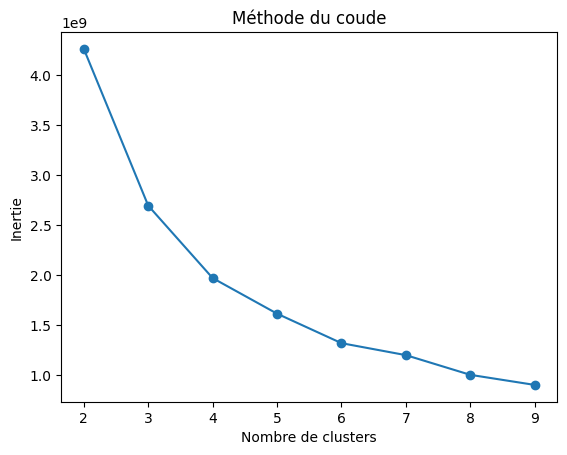

<Figure size 640x480 with 0 Axes>

In [ ]:
# Tracer la courbe du coude
plt.plot(clusters_range, inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

# Sauvegarder le graphique dans un fichier
plt.savefig('Methode_du_coudes_RFM_normal.png')

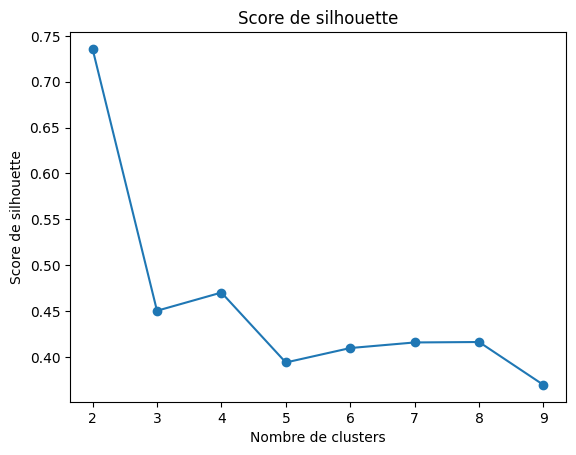

In [ ]:
# Tracer le score de silhouette
plt.plot(clusters_range, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette')
plt.show()

In [ ]:
# Stocker les centroids du meilleur nombre de clusters
best_cluster = silhouette_scores.index(max(silhouette_scores))
best_centroids = centroids[best_cluster]

In [ ]:
indice_cluster = best_cluster
indice_cluster

0

In [ ]:
meilleur_cluster = clusters_range[indice_cluster]

In [ ]:
meilleur_coef_silhouette_RFM_pca =  silhouette_scores[best_cluster]

In [ ]:
print('Meilleur cluster :', meilleur_cluster)
print('\n')
print('Meilleur silhouette_scores :', meilleur_coef_silhouette_RFM_pca)
print('\n')
print('Meilleur centroïde :', best_centroids)

Meilleur cluster : 2


Meilleur silhouette_scores : 0.7357016420844356


Meilleur centroïde : [[ 8.30221334e+02  1.28903291e+00]
 [-2.91376558e+01 -4.52402217e-02]]


On peut désormais afficher nos points :

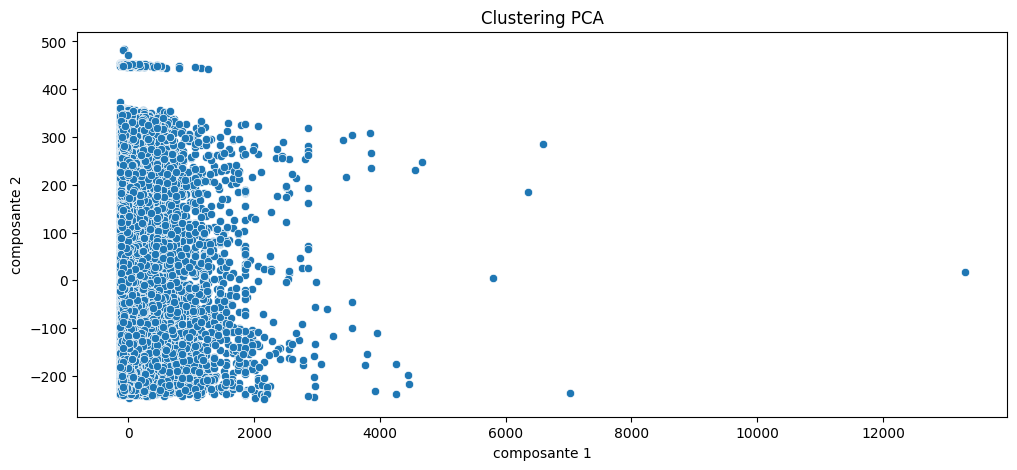

In [ ]:
# Affichage des points projetés
plt.figure(figsize = (12, 5))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.xlabel('composante 1')
plt.ylabel('composante 2')
plt.title("Clustering PCA")

plt.show()

In [ ]:
kmeans_pca = KMeans(n_clusters=meilleur_cluster, n_init=50, init='random')
kmeans_pca.fit(X_pca)

KMeans(init='random', n_clusters=2, n_init=50)

In [ ]:
rfm_pca = X_pca
rfm_pca

array([[ -48.07774234,   47.71488217],
       [ -82.28483858,  168.91259007],
       [  43.59270211,  306.19459916],
       ...,
       [ -91.05846017, -141.0422833 ],
       [  60.81316069, -163.91162702],
       [-115.65852466,  121.10277457]])

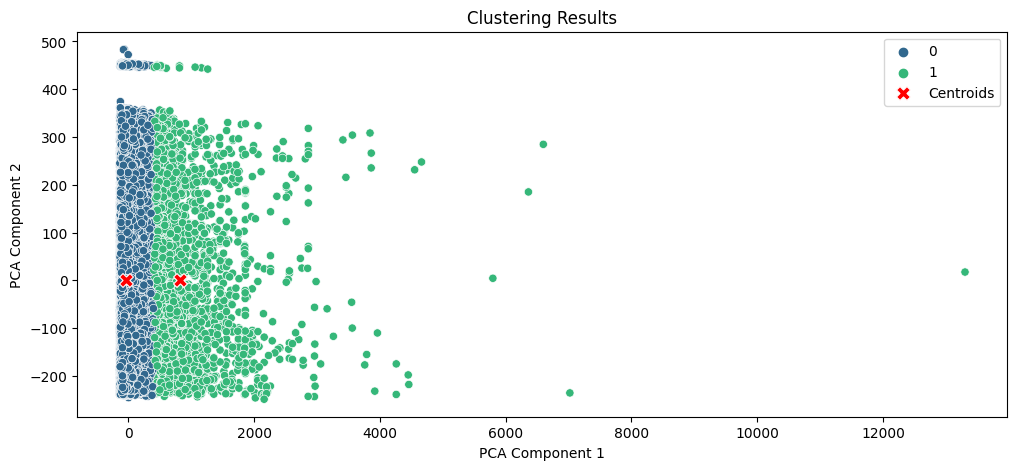

<Figure size 640x480 with 0 Axes>

In [ ]:
# Tracer les points et les centroïdes du meilleur cluster
plt.figure(figsize=(12, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_pca.labels_, palette='viridis')
sns.scatterplot(x=best_centroids[:, 0], y=best_centroids[:, 1], marker='X', color='red', s=100, label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Results')

plt.show()


# Sauvegarder le graphique dans un fichier
plt.savefig('Clustering_Results_RFM_normal.png')

>>>> #### **Segmentation de la clientèle**

Retransformation des données projetées dans leur unité d'origine

In [ ]:
rfm_pca_reconstruit = pca.inverse_transform(rfm_pca)
rfm_pca_reconstruit = pd.DataFrame(rfm_pca_reconstruit)
rfm_pca_reconstruit

0     1       2
0     436.000 1.128  89.800
1     315.000 1.115  54.900
2     177.000 1.168 179.990
3     346.000 1.154 149.900
4     575.000 1.128  93.000
...       ...   ...     ...
97912 559.000 1.122  78.000
97913 571.000 1.112  54.900
97914 625.000 1.109  47.900
97915 647.000 1.171 199.900
97916 363.000 1.101  21.800

[97917 rows x 3 columns]

In [ ]:
rfm_pca_reconstruit.loc[:, 'Identifiant_client'] = rfm['Identifiant_client']
rfm_pca_reconstruit.head()

0     1       2                Identifiant_client
0 436.000 1.128  89.800  00012a2ce6f8dcda20d059ce98491703
1 315.000 1.115  54.900  000161a058600d5901f007fab4c27140
2 177.000 1.168 179.990  0001fd6190edaaf884bcaf3d49edf079
3 346.000 1.154 149.900  0002414f95344307404f0ace7a26f1d5
4 575.000 1.128  93.000  000379cdec625522490c315e70c7a9fb

Vue d'ensemble du dataframe actuel

In [ ]:
rfm_pca = rfm_pca_reconstruit.rename(columns={0: 'Recence', 1: 'Frequence', 2: 'Montant'})
rfm_pca = rfm_pca.reindex(columns=['Identifiant_client', 'Recence', 'Frequence', 'Montant'])
rfm_pca.head()

Identifiant_client  Recence  Frequence  Montant
0  00012a2ce6f8dcda20d059ce98491703  436.000      1.128   89.800
1  000161a058600d5901f007fab4c27140  315.000      1.115   54.900
2  0001fd6190edaaf884bcaf3d49edf079  177.000      1.168  179.990
3  0002414f95344307404f0ace7a26f1d5  346.000      1.154  149.900
4  000379cdec625522490c315e70c7a9fb  575.000      1.128   93.000

Après avoir ajouté les étiquettes de regroupement résultantes dans la dernière colonne, la vue du dataframe.

In [ ]:
rfm_pca['cluster'] = kmeans_pca.labels_
rfm_pca.head()

Identifiant_client  Recence  Frequence  Montant  cluster
0  00012a2ce6f8dcda20d059ce98491703  436.000      1.128   89.800        0
1  000161a058600d5901f007fab4c27140  315.000      1.115   54.900        0
2  0001fd6190edaaf884bcaf3d49edf079  177.000      1.168  179.990        0
3  0002414f95344307404f0ace7a26f1d5  346.000      1.154  149.900        0
4  000379cdec625522490c315e70c7a9fb  575.000      1.128   93.000        0

In [ ]:
rfm_pca.cluster.unique()

array([0, 1], dtype=int32)

>>>>> ##### **Les 2 types de clients**

>>>>>> ###### Fichier client issu du RFM normal dont le cluster est égal correspond à 0

In [ ]:
type_client_1 = rfm_pca.loc[rfm_pca['cluster'] == 0]

display('Client 1', type_client_1.head())
print('\n')
print('Type de client au nombre de :', type_client_1.shape[0])

'Client 1'

Identifiant_client  Recence  Frequence  Montant  cluster
0  00012a2ce6f8dcda20d059ce98491703  436.000      1.128   89.800        0
1  000161a058600d5901f007fab4c27140  315.000      1.115   54.900        0
2  0001fd6190edaaf884bcaf3d49edf079  177.000      1.168  179.990        0
3  0002414f95344307404f0ace7a26f1d5  346.000      1.154  149.900        0
4  000379cdec625522490c315e70c7a9fb  575.000      1.128   93.000        0



Type de client au nombre de : 94651


In [ ]:
type_client_1['Identifiant_client'].describe()

count                                94651
unique                               94651
top       00012a2ce6f8dcda20d059ce98491703
freq                                     1
Name: Identifiant_client, dtype: object

In [ ]:
type_client_1[['Recence',	'Frequence',	'Montant']].describe()

Recence  Frequence   Montant
count 94651.000  94651.000 94651.000
mean    483.674      1.136   109.259
std     153.304      0.038    92.285
min      -0.000      1.089     0.850
25%     374.000      1.109    45.000
50%     503.000      1.125    82.000
75%     608.000      1.150   142.990
max     729.000      1.317   541.002

<ipython-input-298-c6294e00021d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_client_1['Montant_bin'] = pd.cut(type_client_1['Montant'], bins=bins, labels=labels)


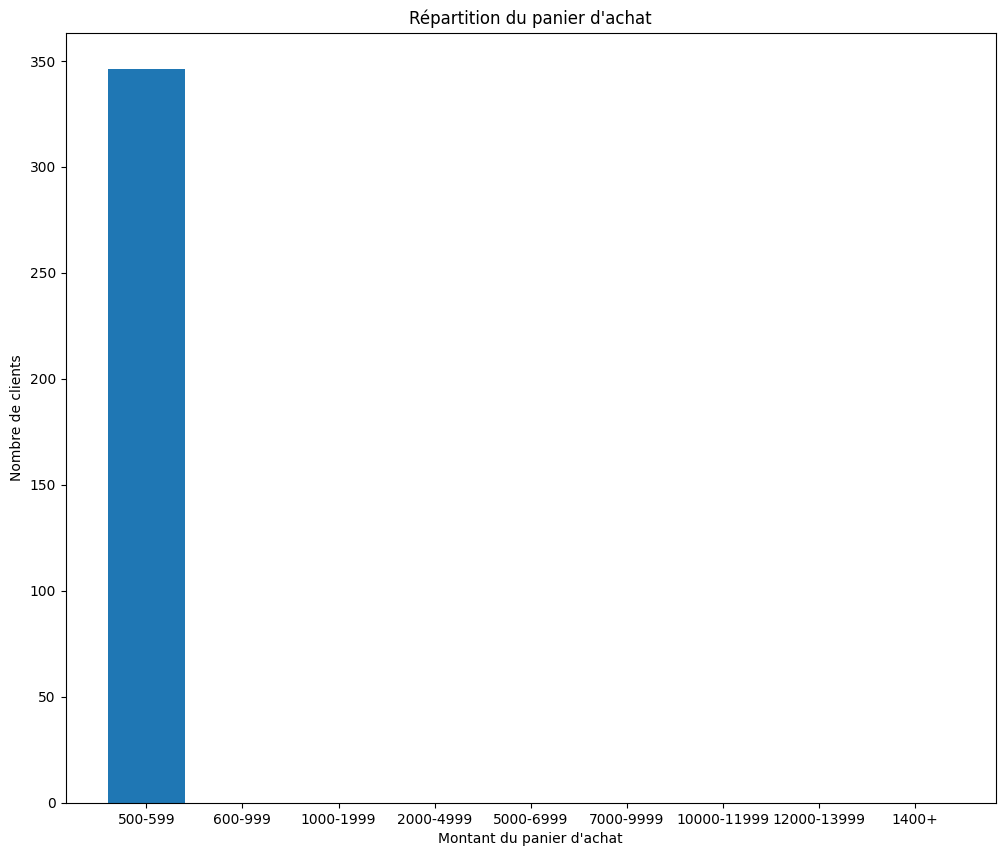

In [ ]:
plt.figure(figsize=(12, 10))
bins = [500, 600, 1000, 2000, 5000, 7000, 10000, 12000, 14000, 20000]
labels = ['500-599', '600-999', '1000-1999', '2000-4999', '5000-6999', '7000-9999', '10000-11999', '12000-13999', '1400+']

type_client_1['Montant_bin'] = pd.cut(type_client_1['Montant'], bins=bins, labels=labels)

bin_counts = type_client_1['Montant_bin'].value_counts().sort_index()

plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel("Montant du panier d'achat")
plt.ylabel("Nombre de clients")
plt.title("Répartition du panier d'achat")
plt.show()

<ipython-input-299-fa10ba60a53f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_client_1['Frequence_bin'] = pd.cut(type_client_1['Frequence'], bins=bins, labels=labels)


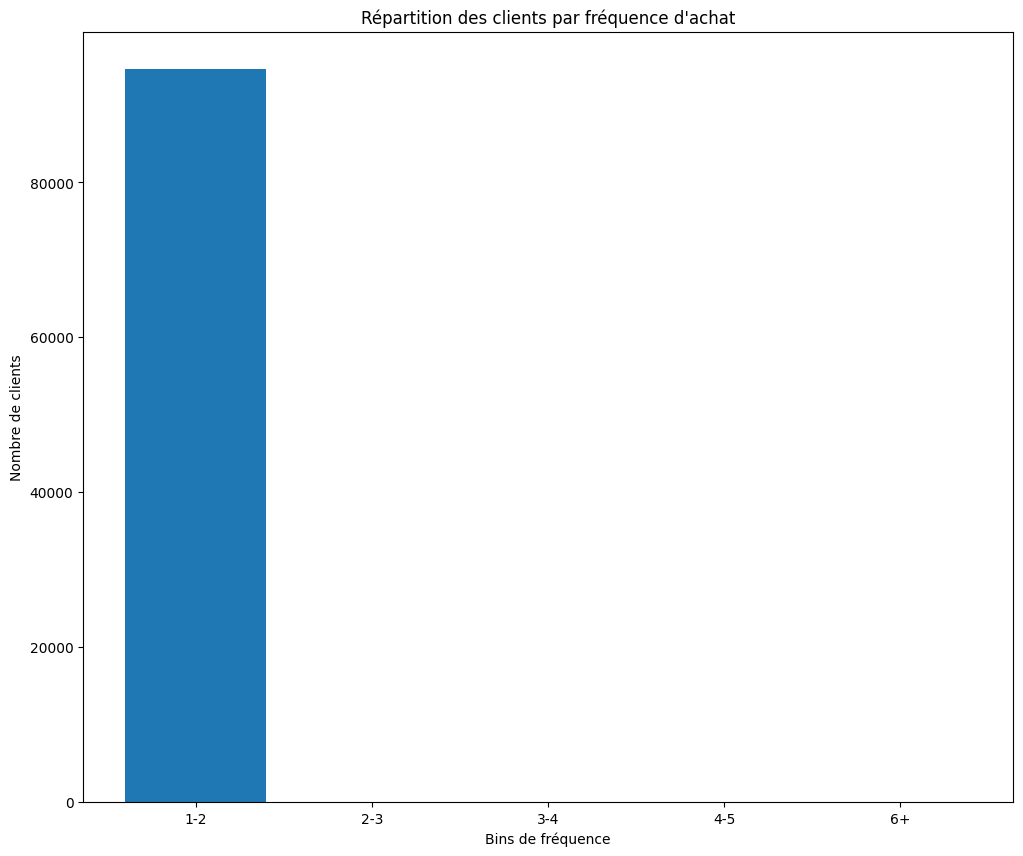

In [ ]:
plt.figure(figsize=(12, 10))
bins = [1, 2, 4, 5, 6, 10]
labels = ['1-2', '2-3', '3-4', '4-5', '6+']

type_client_1['Frequence_bin'] = pd.cut(type_client_1['Frequence'], bins=bins, labels=labels)

bin_counts = type_client_1['Frequence_bin'].value_counts().sort_index()

plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('Bins de fréquence')
plt.ylabel('Nombre de clients')
plt.title('Répartition des clients par fréquence d\'achat')
plt.show()


<ipython-input-300-5491dc22b050>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_client_1['Recence_bin'] = pd.cut(type_client_1['Recence'], bins=bins, labels=labels)


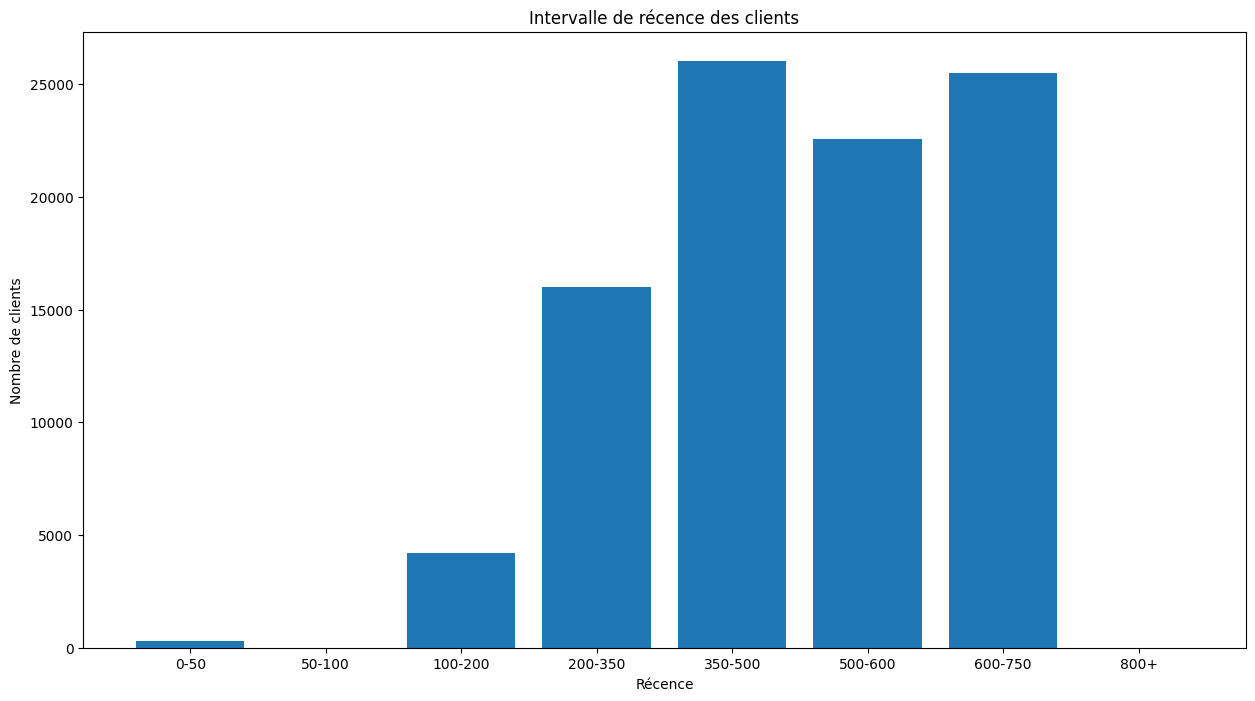

In [ ]:
plt.figure(figsize=(15, 8))

bins = [0, 50, 100, 200, 350, 500, 600, 750, 1000]
labels = ['0-50', '50-100', '100-200', '200-350', '350-500', '500-600', '600-750', '800+']

type_client_1['Recence_bin'] = pd.cut(type_client_1['Recence'], bins=bins, labels=labels)

bin_counts = type_client_1['Recence_bin'].value_counts().sort_index()

# Création de l'histogramme
plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('Récence')
plt.ylabel('Nombre de clients')
plt.title("Intervalle de récence des clients")
plt.show()

>>>>>> ###### Fichier client issu du RFM normal dont le cluster est égal correspond à 1

In [ ]:
type_client_2 = rfm_pca.loc[rfm_pca['cluster'] == 1]

display('Client 2', type_client_2.head())
print('\n')
print('Type de client au nombre de :', type_client_2.shape[0])

'Client 2'

Identifiant_client  Recence  Frequence  Montant  cluster
9    000598caf2ef4117407665ac33275130  706.000      1.545 1107.000        1
44   00205ad9ba1ef4340cef86583294cf82  615.000      1.460  899.900        1
74   0031abfb953b66e998f67b09e7b11375  506.000      1.353  637.900        1
87   003bc8d06ebed9d146eb9f100d0a89ae  549.000      1.325  569.000        1
110  0049e8442c2a3e4a8d1ff5a9549abd53  358.000      1.587 1200.000        1



Type de client au nombre de : 3266


In [ ]:
type_client_2['Identifiant_client'].describe()

count                                 3266
unique                                3266
top       000598caf2ef4117407665ac33275130
freq                                     1
Name: Identifiant_client, dtype: object

In [ ]:
type_client_2[['Recence',	'Frequence',	'Montant']].describe()

Recence  Frequence   Montant
count 3266.000   3266.000  3266.000
mean   476.621      1.493   975.440
std    156.640      0.245   593.987
min     30.000      1.313   541.800
25%    365.000      1.351   629.825
50%    494.000      1.417   792.710
75%    609.000      1.543  1099.000
max    723.000      6.633 13440.001

<ipython-input-304-6bcb1ef8d409>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_client_2['Montant_bin'] = pd.cut(type_client_2['Montant'], bins=bins, labels=labels)


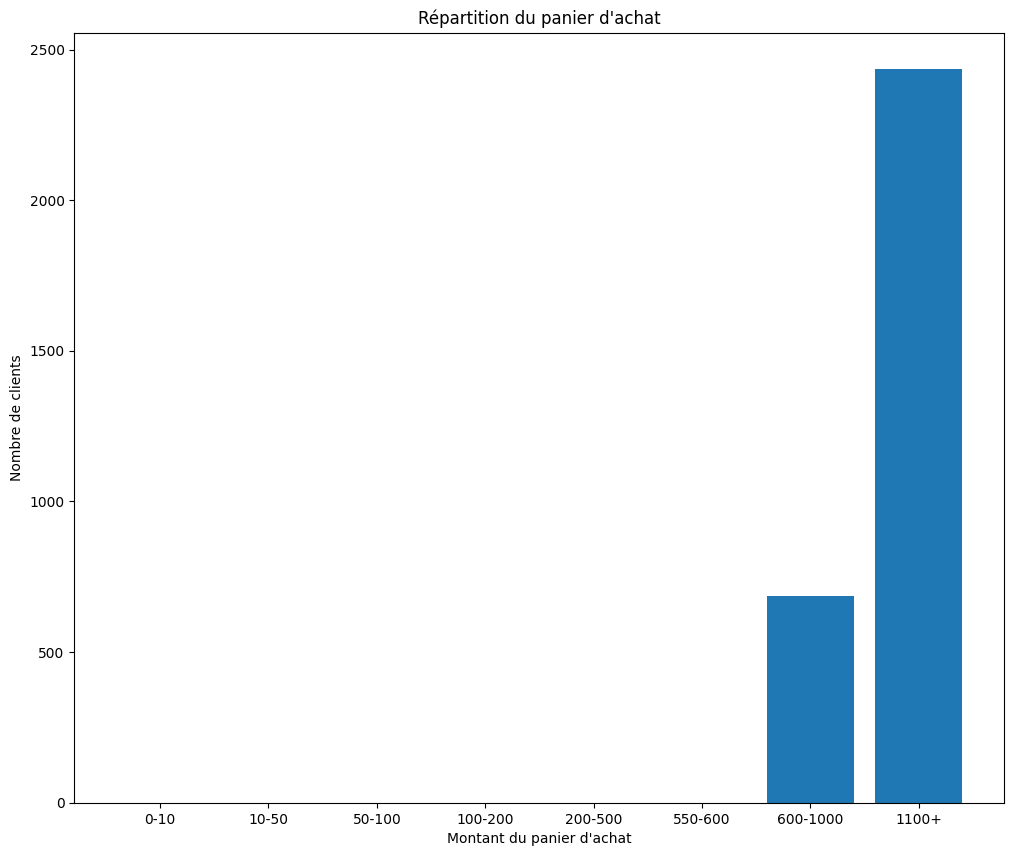

In [ ]:
plt.figure(figsize=(12, 10))
bins = [0, 10, 50, 100, 200, 350, 500, 600, 2000]
labels = ['0-10', '10-50', '50-100', '100-200', '200-500', '550-600', '600-1000', '1100+']

type_client_2['Montant_bin'] = pd.cut(type_client_2['Montant'], bins=bins, labels=labels)

bin_counts = type_client_2['Montant_bin'].value_counts().sort_index()

plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel("Montant du panier d'achat")
plt.ylabel("Nombre de clients")
plt.title("Répartition du panier d'achat")
plt.show()

<ipython-input-305-f1386bb2c651>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_client_2['Frequence_bin'] = pd.cut(type_client_2['Frequence'], bins=bins, labels=labels)


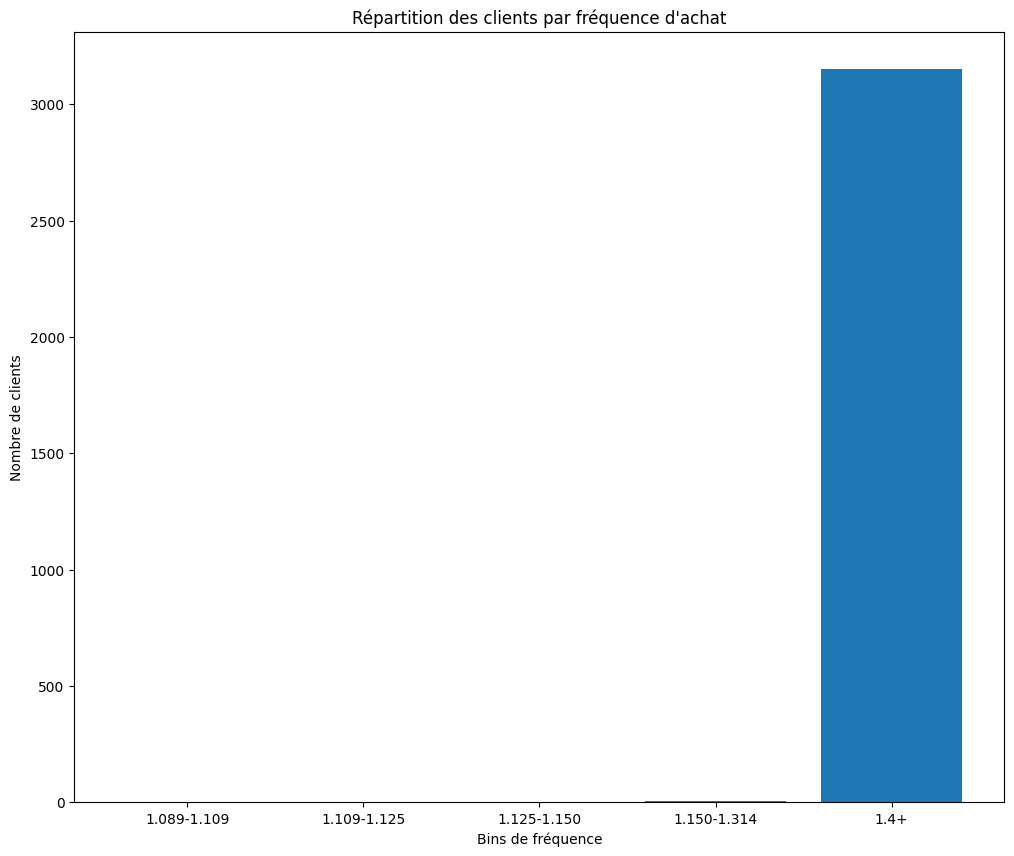

In [ ]:
plt.figure(figsize=(12, 10))
bins = [1.089, 1.109, 1.125, 1.150, 1.314, 2]
labels = ['1.089-1.109', '1.109-1.125', '1.125-1.150', '1.150-1.314', '1.4+']

type_client_2['Frequence_bin'] = pd.cut(type_client_2['Frequence'], bins=bins, labels=labels)

bin_counts = type_client_2['Frequence_bin'].value_counts().sort_index()

plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('Bins de fréquence')
plt.ylabel('Nombre de clients')
plt.title('Répartition des clients par fréquence d\'achat')
plt.show()

In [ ]:
type_client_2['Recence'].describe()

count   3266.000
mean     476.621
std      156.640
min       30.000
25%      365.000
50%      494.000
75%      609.000
max      723.000
Name: Recence, dtype: float64

<ipython-input-307-b8eae62b227c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_client_2['Recence_bin'] = pd.cut(type_client_2['Recence'], bins=bins, labels=labels)


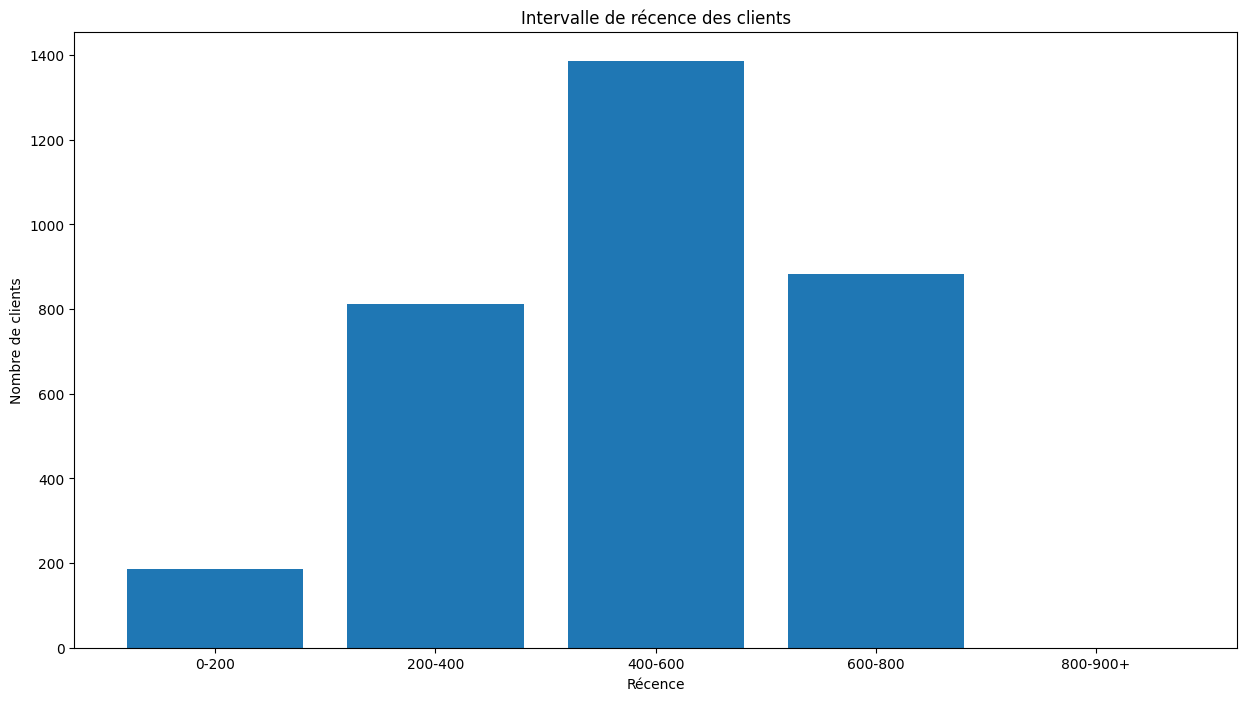

In [ ]:
plt.figure(figsize=(15, 8))

bins = [0, 200, 400, 600, 800, 900]
labels = ['0-200', '200-400', '400-600', '600-800', '800-900+']

type_client_2['Recence_bin'] = pd.cut(type_client_2['Recence'], bins=bins, labels=labels)

bin_counts = type_client_2['Recence_bin'].value_counts().sort_index()

# Création de l'histogramme
plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('Récence')
plt.ylabel('Nombre de clients')
plt.title("Intervalle de récence des clients")
plt.show()

>>>> #### **Analyses**

In [ ]:
best_centroids

array([[ 8.30221334e+02,  1.28903291e+00],
       [-2.91376558e+01, -4.52402217e-02]])

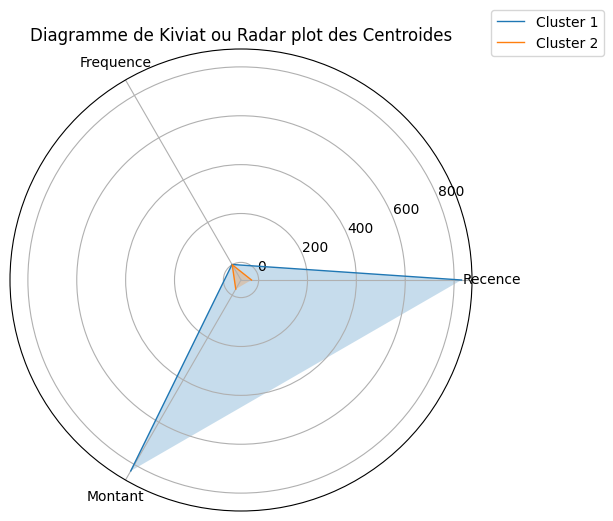

In [ ]:
# Noms des variables
variable_names = ['Recence', 'Frequence', 'Montant']

# Centroides
best_centroids = np.array(best_centroids)

# Nombre de variables
num_variables = len(variable_names)

# Création des angles pour chaque variable
angles = np.linspace(0, 2 * np.pi, num_variables, endpoint=False).tolist()

# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})

# Tracé des lignes pour chaque variable
for i in range(len(best_centroids)):
    values = best_centroids[i].tolist()
    values += [values[0]]  # Ajout de la première valeur à la fin pour fermer le polygone
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i + 1}')

# Remplissage des aires des polygones
for i in range(len(best_centroids)):
    values = best_centroids[i].tolist()
    values += [values[0]]  # Ajout de la première valeur à la fin pour fermer le polygone
    ax.fill(angles, values, alpha=0.25)

# Paramètres esthétiques
ax.set_xticks(angles)
ax.set_xticklabels(variable_names)
ax.yaxis.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Ajout du titre
ax.set_title("Diagramme de Kiviat ou Radar plot des Centroides")

# Affichage du diagramme de Kiviat
plt.show()


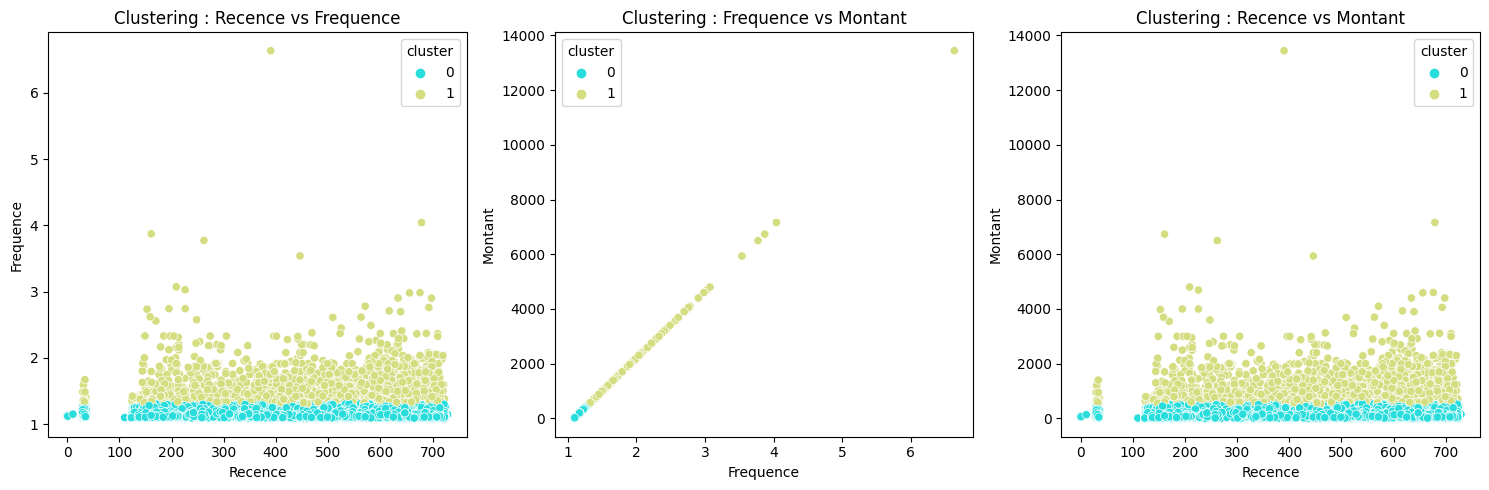

In [ ]:
# Créons une figure avec 1 ligne et 3 colonnes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Graphique 1
sns.scatterplot(x='Recence', y='Frequence', data=rfm_pca[['Recence', 'Frequence', 'Montant']], hue=rfm_pca['cluster'], palette='rainbow', ax=axes[0])
axes[0].set_title('Clustering : Recence vs Frequence')

# Graphique 2
sns.scatterplot(x='Frequence', y='Montant', data=rfm_pca[['Recence', 'Frequence', 'Montant']], hue=rfm_pca['cluster'], palette='rainbow', ax=axes[1])
axes[1].set_title('Clustering : Frequence vs Montant')

# Graphique 3
sns.scatterplot(x='Recence', y='Montant', data=rfm_pca[['Recence', 'Frequence', 'Montant']], hue=rfm_pca['cluster'], palette='rainbow', ax=axes[2])
axes[2].set_title('Clustering : Recence vs Montant')

# Ajustons l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichons la figure
plt.show()


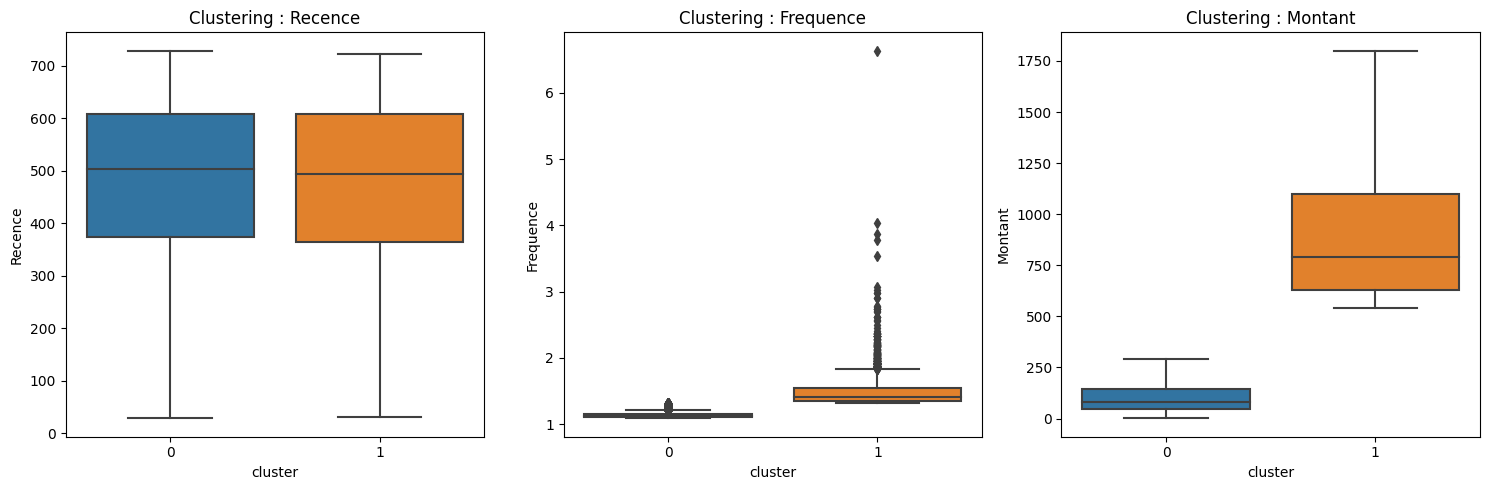

In [ ]:
# Créons une figure avec 1 ligne et 3 colonnes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Graphique 1
sns.boxplot(x=rfm_pca['cluster'], y='Recence', data=rfm_pca[['Recence', 'Frequence', 'Montant']], showfliers=False, ax=axes[0])
axes[0].set_title('Clustering : Recence')

# Graphique 2
sns.boxplot(x=rfm_pca['cluster'], y='Frequence', data=rfm_pca[['Recence', 'Frequence', 'Montant']], showfliers=True, ax=axes[1])
axes[1].set_title('Clustering : Frequence')

# Graphique 3
sns.boxplot(x=rfm_pca['cluster'], y='Montant', data=rfm_pca[['Recence', 'Frequence', 'Montant']], showfliers=False, ax=axes[2])
axes[2].set_title('Clustering : Montant')

# Ajustons l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichons la figure
plt.show()

>> ## **RFM + score de commentaire**

In [ ]:
df_for_essais.columns

Index(['Identifiant_commande', 'Identifiant_client', 'Statut_commande',
       'Horodatage_achat_annee', 'Horodatage_achat_mois',
       'Horodatage_achat_mois_nom', 'Horodatage_achat_annee_mois',
       'Horodatage_achat_jour', 'date_Horodatage_achat',
       'Horodatage_achat_dayofweek', 'Horodatage_achat_dayofweek_nom',
       'Horodatage_achat_heure', 'Horodatage_achat_time_day', 'Date_achat',
       'Heure_achat', 'Date_validation', 'Heure_validation',
       'Date_livraison_transporteur', 'Heure_livraison_transporteur',
       'Date_livraison_client', 'Heure_livraison_client',
       'Date_livraison_estimee', 'Heure_livraison_estimee',
       'classification_horodatage_achat', 'Identifiant_article_commande',
       'Identifiant_produit', 'Identifiant_vendeur', 'Prix', 'Frais_de_port',
       'Date_limite_livraison', 'Heure_livraison_livraison',
       'Identifiant_commentaire', 'Score_commentaire', 'Titre_commentaire',
       'Message_commentaire', 'Date_creation_commentaire',
  

In [ ]:
# Calculer la moyenne des notes de commentaire pour chaque client
moyenne_score_comment = df_for_essais.groupby('Identifiant_client')['Score_commentaire'].mean().reset_index()
moyenne_score_comment.head()

Identifiant_client  Score_commentaire
0  00012a2ce6f8dcda20d059ce98491703              1.000
1  000161a058600d5901f007fab4c27140              4.000
2  0001fd6190edaaf884bcaf3d49edf079              5.000
3  0002414f95344307404f0ace7a26f1d5              5.000
4  000379cdec625522490c315e70c7a9fb              4.000

In [ ]:
# Ajouter la colonne de score de commentaire à votre DataFrame RFM
rfm_score = rfm.merge(moyenne_score_comment, on='Identifiant_client', how='left')
rfm_score = rfm_score.drop('RFM_Score', axis=1)
rfm_score.head()

Identifiant_client  recence  frequence  montant r_quartile  \
0  00012a2ce6f8dcda20d059ce98491703      436          1   89.800          3   
1  000161a058600d5901f007fab4c27140      315          1   54.900          3   
2  0001fd6190edaaf884bcaf3d49edf079      177          1  179.990          2   
3  0002414f95344307404f0ace7a26f1d5      346          1  149.900          3   
4  000379cdec625522490c315e70c7a9fb      575          1   93.000          4   

  f_quartile m_quartile  Score_commentaire  
0          1          1              1.000  
1          1          1              4.000  
2          1          1              5.000  
3          1          1              5.000  
4          1          1              4.000

In [ ]:
rfm_score_data = rfm_score[['recence', 'frequence', 'montant', 'Score_commentaire']]
rfm_score_data.head()

recence  frequence  montant  Score_commentaire
0      436          1   89.800              1.000
1      315          1   54.900              4.000
2      177          1  179.990              5.000
3      346          1  149.900              5.000
4      575          1   93.000              4.000

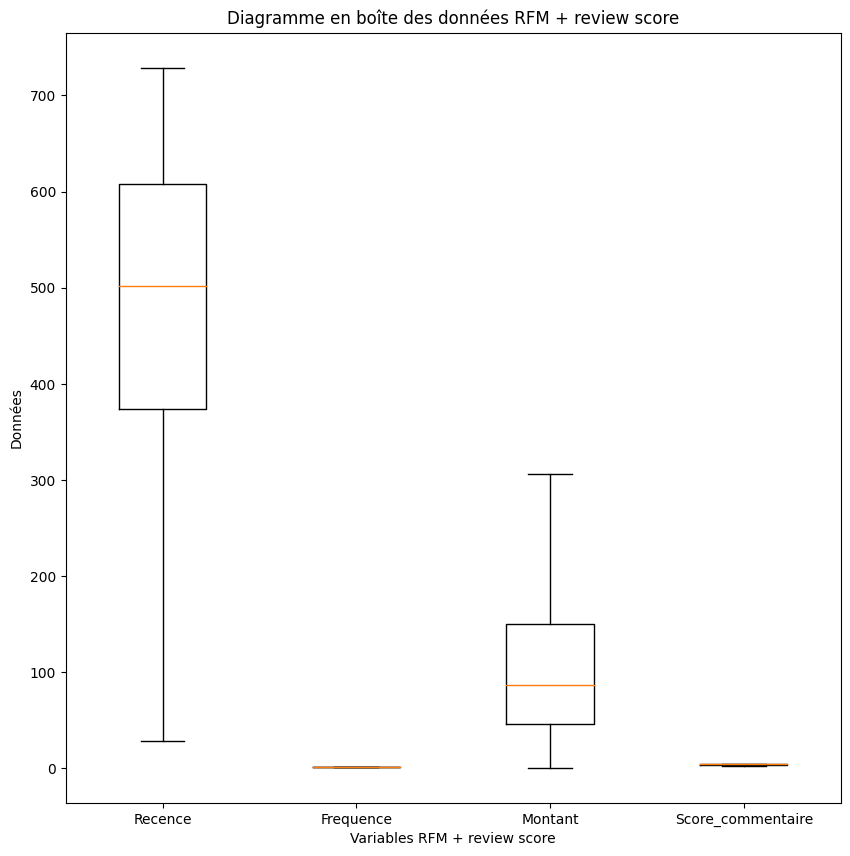

In [ ]:
plt.figure(figsize=(10,10))

# Tracer un diagramme en boîte de rfm_normalized
plt.boxplot(rfm_score_data, labels=['Recence', 'Frequence', 'Montant', 'Score_commentaire'], showfliers=False)

# Ajouter des titres et des légendes
plt.title('Diagramme en boîte des données RFM + review score')
plt.xlabel('Variables RFM + review score')
plt.ylabel('Données')
plt.show()

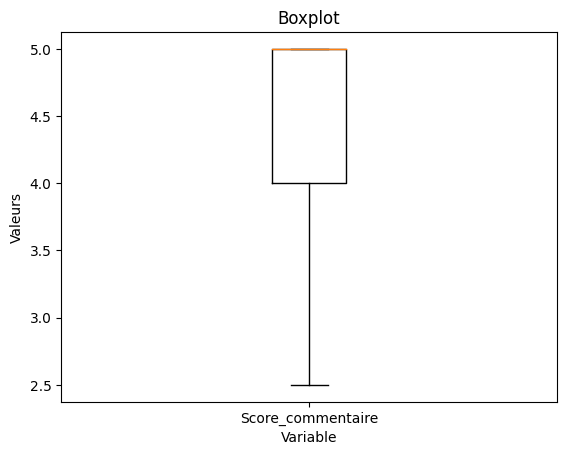

In [ ]:
# Données pour le boxplot
X = rfm_score_data['Score_commentaire'].values
labels = ['Score_commentaire']

# Tracer le boxplot
plt.boxplot(X, labels=labels, showfliers=False)
plt.xlabel('Variable')
plt.ylabel('Valeurs')
plt.title('Boxplot')
plt.show()


In [ ]:
rfm_score_data.frequence.value_counts()

1     87758
2      7850
3      1293
4       547
5       204
6       199
7        22
8        14
10        8
12        7
9         4
11        3
15        2
14        2
13        1
20        1
22        1
21        1
Name: frequence, dtype: int64

In [ ]:
rfm_score_data.frequence.values

array([1, 1, 1, ..., 1, 1, 2])

>>> ### **KMeans clustering**

J'ai tracé les valeurs Recence, Frequence et Montant dans un diagramme en boîte, mais ces données souffrent de valeurs aberrantes qui pourraient nuire à la précision des prédictions.

Je vais donc utiliser un scalaire standard pour normaliser les données.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_score_data_normalized = scaler.fit_transform(rfm_score_data)

In [ ]:
rfm_score_data_normalized

array([[-0.3092099 , -0.26824985, -0.23000999, -2.33408539],
       [-1.09789404, -0.26824985, -0.39603613, -0.07897034],
       [-1.99738505, -0.26824985,  0.1990415 ,  0.67273468],
       ...,
       [ 0.92270169, -0.26824985, -0.4293365 , -0.07897034],
       [ 1.0660988 , -0.26824985,  0.29375727,  0.67273468],
       [-0.78502761,  1.54885295, -0.55349931,  0.67273468]])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusters_range = range(2, 10)
inertia = []
silhouette_scores_review_kcl = []
centroids = []

for nbre_cluster in clusters_range:
    # On instancie notre Kmeans
    kmeans = KMeans(n_clusters=nbre_cluster, n_init=50, init='random')

    # On l'entraine :
    kmeans.fit(rfm_score_data_normalized)

    # Ajoutons la valeur de l'inertie du modèle pour le nombre de clusters à la liste inertia
    inertia.append(kmeans.inertia_)

    # Calculons le score de silhouette pour les clusters obtenus
    silhouette_scores_review_kcl.append(silhouette_score(rfm_score_data_normalized, kmeans.labels_))
    print("Pour n_clusters={0}, le coef. de silhouette pour la rfm normal est de : {1}".format(nbre_cluster, silhouette_scores_review_kcl))

    # Ajoutons les coordonnées des centroïdes à la liste centroids
    centroids.append(kmeans.cluster_centers_)
    print("son centroïde est de :", centroids)

    print('\n')

Pour n_clusters=2, le coef. de silhouette pour la rfm normal est de : [0.3890985087491451]
son centroïde est de : [array([[ 0.01023335, -0.10715113, -0.03943232,  0.48734076],
       [-0.03387541,  0.35470197,  0.13053265, -1.61324229]])]


Pour n_clusters=3, le coef. de silhouette pour la rfm normal est de : [0.3890985087491451, 0.3309090375040614]
son centroïde est de : [array([[ 0.01023335, -0.10715113, -0.03943232,  0.48734076],
       [-0.03387541,  0.35470197,  0.13053265, -1.61324229]]), array([[-0.99121862, -0.10967291, -0.04661462,  0.35943525],
       [ 0.01108262,  0.64007318,  0.30636202, -1.92914372],
       [ 0.74134566, -0.1351491 , -0.06910638,  0.38561653]])]


Pour n_clusters=4, le coef. de silhouette pour la rfm normal est de : [0.3890985087491451, 0.3309090375040614, 0.3620670584337273]
son centroïde est de : [array([[ 0.01023335, -0.10715113, -0.03943232,  0.48734076],
       [-0.03387541,  0.35470197,  0.13053265, -1.61324229]]), array([[-0.99121862, -0.10967291, 

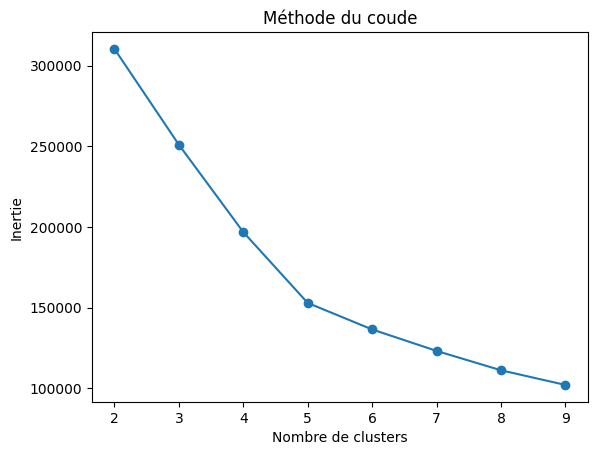

In [ ]:
# Tracer la courbe du coude
plt.plot(clusters_range, inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

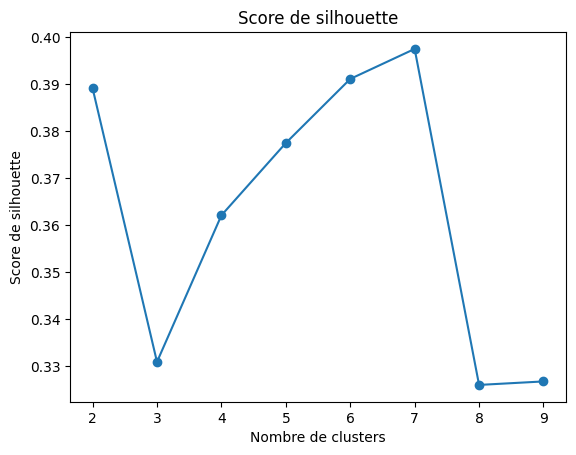

In [ ]:
# Tracer le score de silhouette
plt.plot(clusters_range, silhouette_scores_review_kcl, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette')
plt.show()

In [ ]:
# Stocker les centroids du meilleur nombre de clusters
best_cluster = silhouette_scores_review_kcl.index(max(silhouette_scores_review_kcl))
best_centroids = centroids[best_cluster]

In [ ]:
index_cluster = best_cluster
index_cluster

5

In [ ]:
meilleur_cluster = clusters_range[index_cluster]

In [ ]:
meilleur_coef_silhouette_review_klc =  silhouette_scores_review_kcl[index_cluster]

In [ ]:
print('Meilleur cluster :', meilleur_cluster)
print('\n')
print('Meilleur silhouette_scores :', meilleur_coef_silhouette_review_klc)
print('\n')
print('Meilleur centroïde :', best_centroids)

Meilleur cluster : 7


Meilleur silhouette_scores : 0.39744628019517


Meilleur centroïde : [[-1.01007611e+00 -2.59929074e-01 -1.79807956e-01  3.97447941e-01]
 [-5.18219331e-02  6.92376664e+00  9.77058223e-01 -5.61295583e-01]
 [ 1.35193708e-02 -1.29459589e-01  2.88286223e+00  1.02804283e-01]
 [-5.83519285e-03  3.22099212e-01  9.30405322e+00 -2.53040282e-01]
 [-9.42427724e-03 -4.74879048e-02 -1.08083777e-01 -1.90617304e+00]
 [ 7.60853893e-01 -2.68249854e-01 -1.85611973e-01  4.25591906e-01]
 [ 6.58520756e-03  1.88284588e+00  9.84190983e-02  1.59174336e-01]]


Modèle finalisé avec N_clusters = 6 sur la base de l'analyse ci-dessus

Ajustement du modèle avec les  clusters finalisées.

In [ ]:
kmeans_kcl = KMeans(n_clusters=meilleur_cluster, n_init=50, init='random')
kmeans_kcl.fit(rfm_score_data_normalized)

KMeans(init='random', n_clusters=7, n_init=50)

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(rfm_score_data_normalized)
print(pca.explained_variance_ratio_.cumsum())

rfm_score_trans = pca.transform(rfm_score_data_normalized)

[0.30381919 0.55450394]


In [ ]:
rfm_score_trans

array([[ 0.79199185, -0.84339235],
       [-0.30657135, -1.15974456],
       [-0.26020654, -1.76197971],
       ...,
       [-0.44455914,  0.77250781],
       [-0.38566768,  1.19297289],
       [ 0.44999306, -0.58886919]])

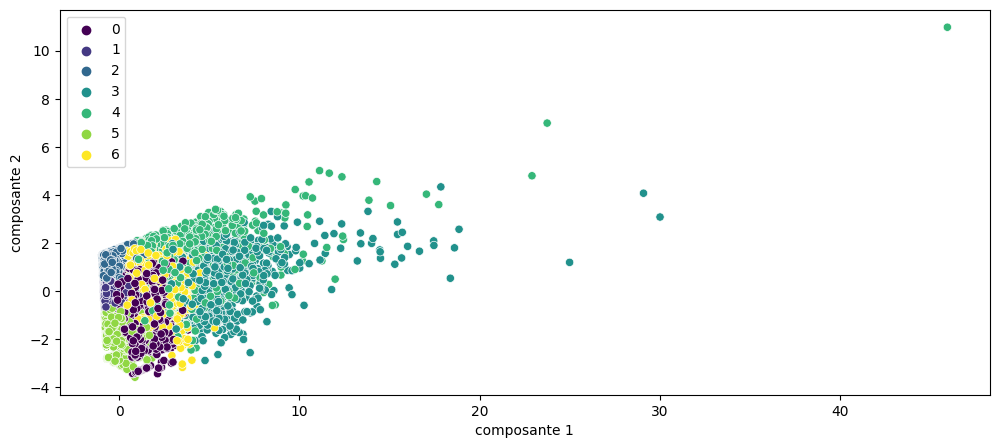

In [ ]:
plt.figure(figsize = (12, 5))

sns.scatterplot(x=rfm_score_trans[:, 0], y=rfm_score_trans[:, 1], hue=kmeans_kcl.labels_, palette='viridis')
plt.xlabel('composante 1')
plt.ylabel('composante 2')
plt.show()

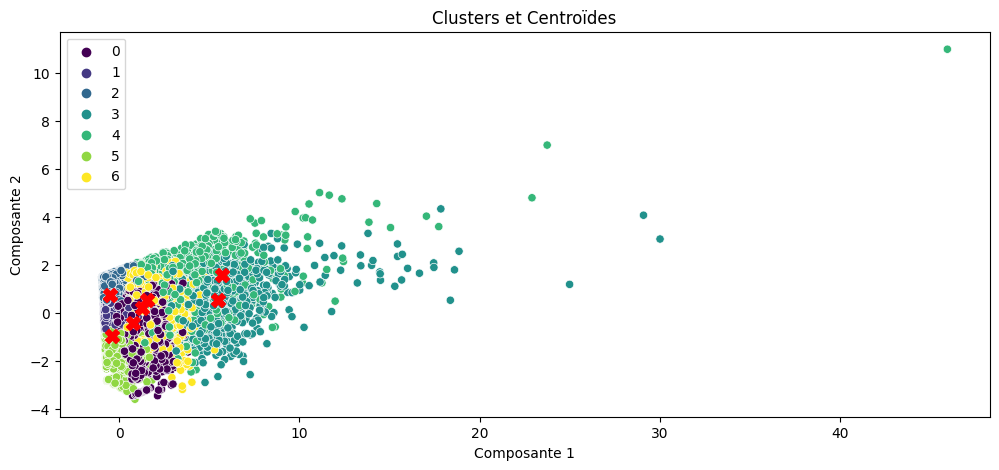

In [ ]:
# Tracer les points
plt.figure(figsize=(12, 5))
sns.scatterplot(x=rfm_score_trans[:, 0], y=rfm_score_trans[:, 1], hue=kmeans_kcl.labels_, palette='viridis')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')

# Tracer les centroïdes
centroids_trans = pca.transform(best_centroids)
plt.scatter(centroids_trans[:, 0], centroids_trans[:, 1], c='red', marker='X', s=100, label='Centroids')

plt.title('Clusters et Centroïdes')

plt.show()

In [ ]:
rfm_score_data_normalized

array([[-0.3092099 , -0.26824985, -0.23000999, -2.33408539],
       [-1.09789404, -0.26824985, -0.39603613, -0.07897034],
       [-1.99738505, -0.26824985,  0.1990415 ,  0.67273468],
       ...,
       [ 0.92270169, -0.26824985, -0.4293365 , -0.07897034],
       [ 1.0660988 , -0.26824985,  0.29375727,  0.67273468],
       [-0.78502761,  1.54885295, -0.55349931,  0.67273468]])

In [ ]:
rfm_score_data_normalized = pd.DataFrame(rfm_score_data_normalized)
rfm_score_data_normalized = rfm_score_data_normalized.rename(columns={0: 'Recence', 1: 'Frequence', 2: 'Montant', 3: 'Review Score'})
rfm_score_data_normalized.head()

Recence  Frequence  Montant  Review Score
0   -0.309     -0.268   -0.230        -2.334
1   -1.098     -0.268   -0.396        -0.079
2   -1.997     -0.268    0.199         0.673
3   -0.896     -0.268    0.056         0.673
4    0.597     -0.268   -0.215        -0.079

>> Retransformation des données projetées dans leur unité d'origine

In [ ]:
rfm_score_kcl_reconstruit = scaler.inverse_transform(rfm_score_data_normalized)

In [ ]:
rfm_score_kcl = pd.DataFrame(rfm_score_kcl_reconstruit)
rfm_score_kcl = rfm_score_kcl.rename(columns={0: 'Recence', 1: 'Frequence', 2: 'Montant', 3: 'Review Score'})
rfm_score_kcl.head()

Recence  Frequence  Montant  Review Score
0  436.000      1.000   89.800         1.000
1  315.000      1.000   54.900         4.000
2  177.000      1.000  179.990         5.000
3  346.000      1.000  149.900         5.000
4  575.000      1.000   93.000         4.000

In [ ]:
rfm_score_kcl.loc[:, 'Identifiant_client'] = rfm_score['Identifiant_client']

In [ ]:
rfm_score_kcl.head()

Recence  Frequence  Montant  Review Score                Identifiant_client
0  436.000      1.000   89.800         1.000  00012a2ce6f8dcda20d059ce98491703
1  315.000      1.000   54.900         4.000  000161a058600d5901f007fab4c27140
2  177.000      1.000  179.990         5.000  0001fd6190edaaf884bcaf3d49edf079
3  346.000      1.000  149.900         5.000  0002414f95344307404f0ace7a26f1d5
4  575.000      1.000   93.000         4.000  000379cdec625522490c315e70c7a9fb

Vue d'ensemble du dataframe actuel

In [ ]:
rfm_score_kcl = rfm_score_kcl.reindex(columns=['Identifiant_client', 'Recence', 'Frequence', 'Montant', 'Review Score'])
rfm_score_kcl.head()

Identifiant_client  Recence  Frequence  Montant  Review Score
0  00012a2ce6f8dcda20d059ce98491703  436.000      1.000   89.800         1.000
1  000161a058600d5901f007fab4c27140  315.000      1.000   54.900         4.000
2  0001fd6190edaaf884bcaf3d49edf079  177.000      1.000  179.990         5.000
3  0002414f95344307404f0ace7a26f1d5  346.000      1.000  149.900         5.000
4  000379cdec625522490c315e70c7a9fb  575.000      1.000   93.000         4.000

Après avoir ajouté les étiquettes de regroupement résultantes dans la dernière colonne, la vue du dataframe.

In [ ]:
rfm_score_kcl['cluster'] = kmeans_kcl.labels_
rfm_score_kcl

Identifiant_client  Recence  Frequence  Montant  \
0      00012a2ce6f8dcda20d059ce98491703  436.000      1.000   89.800   
1      000161a058600d5901f007fab4c27140  315.000      1.000   54.900   
2      0001fd6190edaaf884bcaf3d49edf079  177.000      1.000  179.990   
3      0002414f95344307404f0ace7a26f1d5  346.000      1.000  149.900   
4      000379cdec625522490c315e70c7a9fb  575.000      1.000   93.000   
...                                 ...      ...        ...      ...   
97912  fffcb937e9dd47a13f05ecb8290f4d3e  559.000      1.000   78.000   
97913  fffecc9f79fd8c764f843e9951b11341  571.000      1.000   54.900   
97914  fffeda5b6d849fbd39689bb92087f431  625.000      1.000   47.900   
97915  ffff42319e9b2d713724ae527742af25  647.000      1.000  199.900   
97916  ffffa3172527f765de70084a7e53aae8  363.000      2.000   21.800   

       Review Score  cluster  
0             1.000        0  
1             4.000        5  
2             5.000        5  
3             5.000        5  
4             4.000        2  
...             ...      ...  
97912         5.000        2  
97913         3.000        0  
97914         4.000        2  
97915         5.000        2  
97916         5.000        6  

[97917 rows x 6 columns]

In [ ]:
rfm_score_kcl.cluster.unique()

array([0, 5, 2, 1, 4, 3, 6], dtype=int32)

>>>> #### **Segmentation de la clientèle**

In [ ]:
type_client_1 = rfm_score_kcl.loc[rfm_score_kcl['cluster'] == 0]
type_client_1 = type_client_1[['Identifiant_client', 'cluster']]
display('Client 1', type_client_1.head())
print('\n')
print('Type de client au nombre de :', type_client_1.shape[0])

'Client 1'

Identifiant_client  cluster
0   00012a2ce6f8dcda20d059ce98491703        0
5   0004164d20a9e969af783496f3408652        0
6   000419c5494106c306a97b5635748086        0
24  001226b2341ef620415ce7bbafcfac28        0
28  001450ebb4a77efb3d68be5f7887cb1e        0



Type de client au nombre de : 16233


In [ ]:
type_client_2 = rfm_score_kcl.loc[rfm_score_kcl['cluster'] == 1]
type_client_2 = type_client_2[['Identifiant_client', 'cluster']]
display('Client 2', type_client_2.head())
print('\n')
print('Type de client au nombre de :', type_client_2.shape[0])

'Client 2'

Identifiant_client  cluster
7   00046a560d407e99b969756e0b10f282        1
8   00050bf6e01e69d5c0fd612f1bcfb69c        1
13  00072d033fe2e59061ae5c3aff1a2be5        1
17  000f17e290c26b28549908a04cfe36c1        1
21  00104a47c29da701ce41ee52077587d9        1



Type de client au nombre de : 25299


In [ ]:
type_client_3 = rfm_score_kcl.loc[rfm_score_kcl['cluster'] == 2]
type_client_3 = type_client_3[['Identifiant_client', 'cluster']]
display('Client 3', type_client_3.head())
print('\n')
print('Type de client au nombre de :', type_client_3.shape[0])

'Client 3'

Identifiant_client  cluster
4   000379cdec625522490c315e70c7a9fb        2
10  0005aefbb696d34b3424dccd0a0e9fd0        2
18  000fd45d6fedae68fc6676036610f879        2
20  001028b78fd413e19704b3867c369d3a        2
22  001051abfcfdbed9f87b4266213a5df1        2



Type de client au nombre de : 28820


In [ ]:
type_client_4 = rfm_score_kcl.loc[rfm_score_kcl['cluster'] == 3]
type_client_4 = type_client_4[['Identifiant_client', 'cluster']]
display('Client 4', type_client_4.head())
print('\n')
print('Type de client au nombre de :', type_client_4.shape[0])

'Client 4'

Identifiant_client  cluster
12   00066ccbe787a588c52bd5ff404590e3        3
100  00426311a53f3c052943c88b692a3be2        3
355  00f394e6fc446865ac4097b6db69ef4a        3
496  014fb09b34197c57ae3c77a43d18475e        3
566  0179f2f4c32e0b0c2a4cb0d57e7d5a26        3



Type de client au nombre de : 1002


In [ ]:
type_client_5 = rfm_score_kcl.loc[rfm_score_kcl['cluster'] == 4]
type_client_5 = type_client_5[['Identifiant_client', 'cluster']]
display('Client 5', type_client_5.head())
print('\n')
print('Type de client au nombre de :', type_client_5.shape[0])

'Client 5'

Identifiant_client  cluster
9    000598caf2ef4117407665ac33275130        4
44   00205ad9ba1ef4340cef86583294cf82        4
110  0049e8442c2a3e4a8d1ff5a9549abd53        4
121  005196c65bab2861e397cc85bc7664bf        4
300  00c634fb2feeb4e2767a916c2375c9b8        4



Type de client au nombre de : 1924


In [ ]:
type_client_6 = rfm_score_kcl.loc[rfm_score_kcl['cluster'] == 5]
type_client_6 = type_client_6[['Identifiant_client', 'cluster']]
display('Client 6', type_client_6.head())
print('\n')
print('Type de client au nombre de :', type_client_6.shape[0])

'Client 6'

Identifiant_client  cluster
1   000161a058600d5901f007fab4c27140        5
2   0001fd6190edaaf884bcaf3d49edf079        5
3   0002414f95344307404f0ace7a26f1d5        5
11  00062b33cb9f6fe976afdcff967ea74d        5
14  0009a69b72033b2d0ec8c69fc70ef768        5



Type de client au nombre de : 18035


In [ ]:
type_client_7 = rfm_score_kcl.loc[rfm_score_kcl['cluster'] == 6]
type_client_7 = type_client_7[['Identifiant_client', 'cluster']]
display('Client 7', type_client_7.head())
print('\n')
print('Type de client au nombre de :', type_client_7.shape[0])

'Client 7'

Identifiant_client  cluster
15  000bf8121c3412d3057d32371c5d3395        6
66  002f90a6eb386bc43bc9ba200db31a89        6
77  00331de1659c7f4fb660c8810e6de3f5        6
78  0033823ee55671ac5317d423291333c2        6
85  003a75d228dc67cb2918e40c2aacc4bf        6



Type de client au nombre de : 6604


Les clients sont maintenant divisés en 7 groupes, les derniers étant ceux qui ont dépensé le plus.

>>>> #### **Analyses**

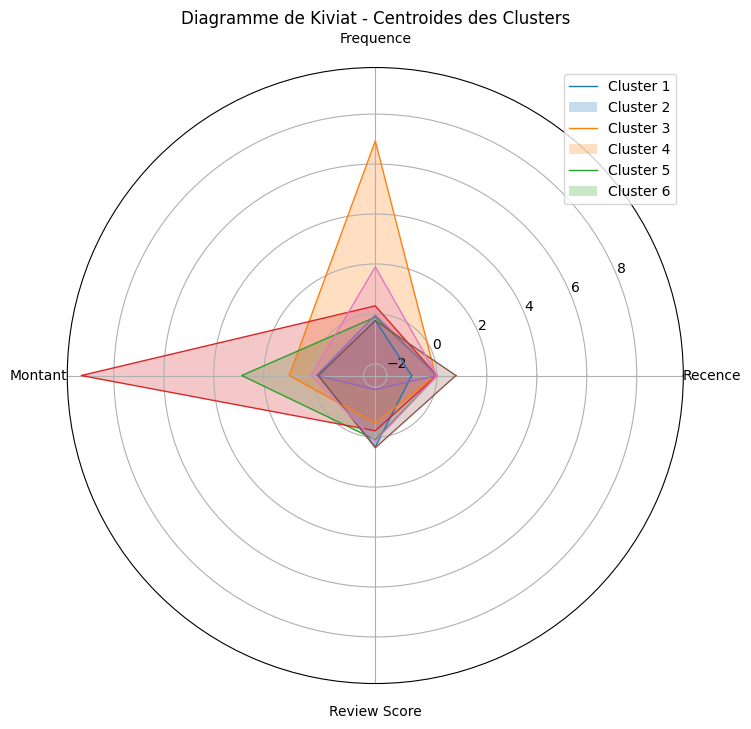

In [ ]:
# Variables
variables = ['Recence', 'Frequence', 'Montant', 'Review Score']

# Centroides
centroids = np.array(best_centroids)

# Tracer le diagramme de Kiviat
angles = np.linspace(0, 2*np.pi, len(variables), endpoint=False).tolist()
angles += angles[:1]  # Fermer la forme en ajoutant le premier angle à la fin

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
ax.set_xticks(angles[:-1])
ax.set_xticklabels(variables)
ax.tick_params(axis='x', pad=10)  # Augmenter l'espacement entre les étiquettes et le graphique

# Tracer les centroides pour chaque cluster
for centroid in centroids:
    values = centroid.tolist()
    values += values[:1]  # Fermer la forme en ajoutant la première valeur à la fin
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

# Ajouter une légende
legend_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']
ax.legend(legend_labels, loc='upper right')

plt.title('Diagramme de Kiviat - Centroides des Clusters')
plt.show()

In [ ]:
rfm_score_kcl.head()

Identifiant_client  Recence  Frequence  Montant  \
0  00012a2ce6f8dcda20d059ce98491703  436.000      1.000   89.800   
1  000161a058600d5901f007fab4c27140  315.000      1.000   54.900   
2  0001fd6190edaaf884bcaf3d49edf079  177.000      1.000  179.990   
3  0002414f95344307404f0ace7a26f1d5  346.000      1.000  149.900   
4  000379cdec625522490c315e70c7a9fb  575.000      1.000   93.000   

   Review Score  cluster  
0         1.000        0  
1         4.000        5  
2         5.000        5  
3         5.000        5  
4         4.000        2

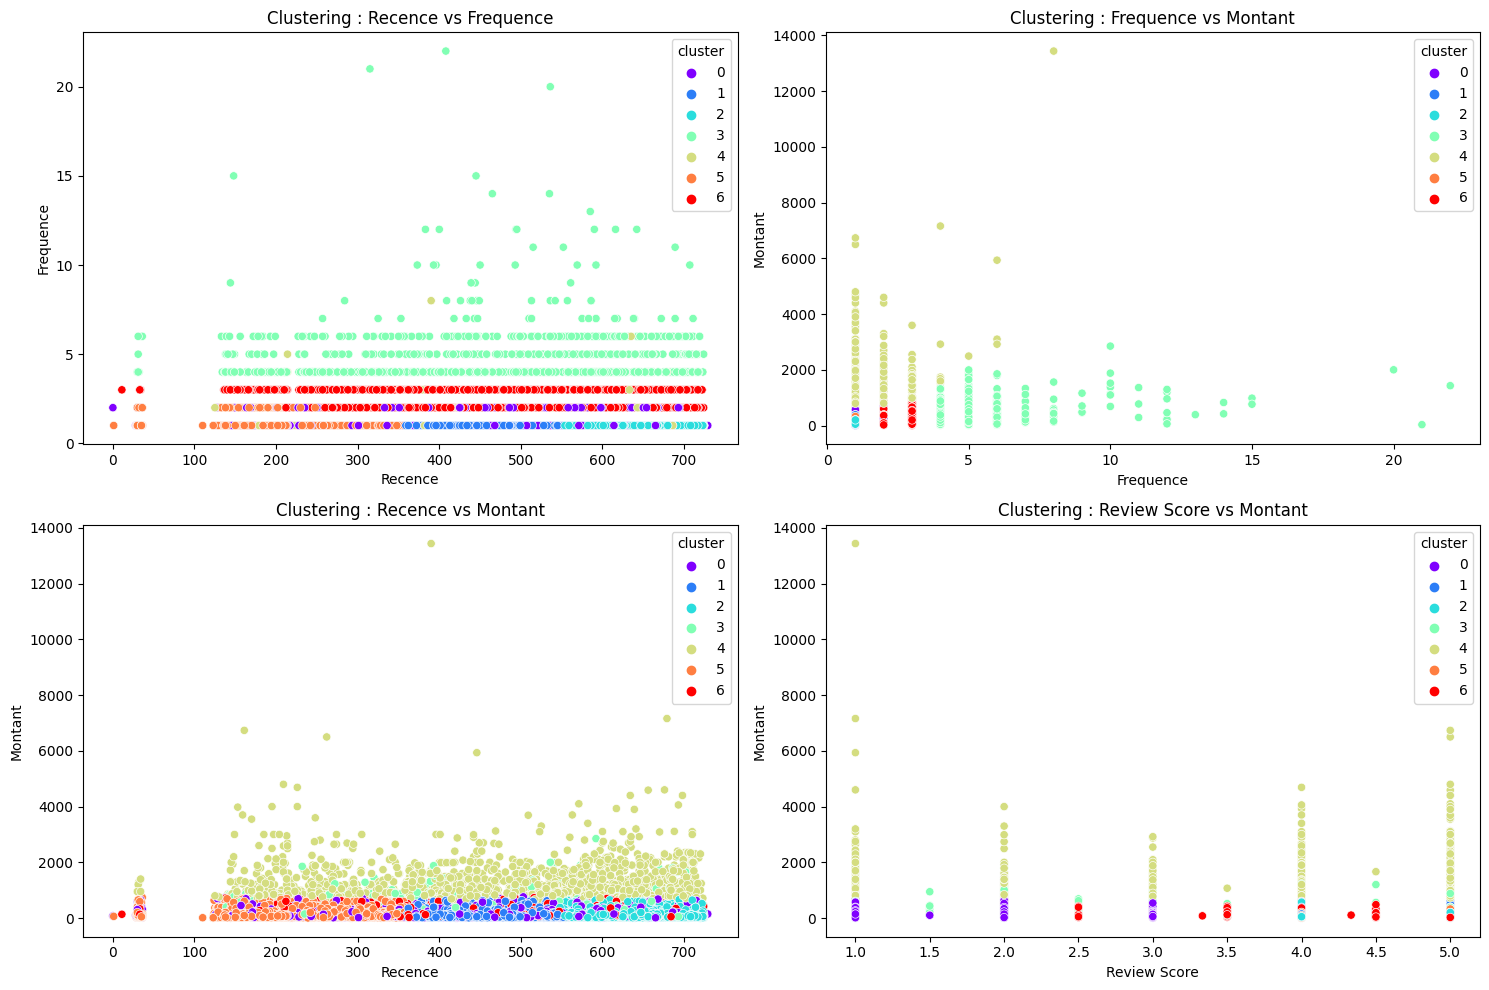

In [ ]:
# Créons une figure avec 2 lignes et 2 colonnes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graphique 1
sns.scatterplot(x='Recence', y='Frequence', data=rfm_score_kcl[['Recence', 'Frequence', 'Montant', 'Review Score']], hue=rfm_score_kcl['cluster'], palette='rainbow', ax=axes[0, 0])
axes[0, 0].set_title('Clustering : Recence vs Frequence')

# Graphique 2
sns.scatterplot(x='Frequence', y='Montant', data=rfm_score_kcl[['Recence', 'Frequence', 'Montant', 'Review Score']], hue=rfm_score_kcl['cluster'], palette='rainbow', ax=axes[0, 1])
axes[0, 1].set_title('Clustering : Frequence vs Montant')

# Graphique 3
sns.scatterplot(x='Recence', y='Montant', data=rfm_score_kcl[['Recence', 'Frequence', 'Montant', 'Review Score']], hue=rfm_score_kcl['cluster'], palette='rainbow', ax=axes[1, 0])
axes[1, 0].set_title('Clustering : Recence vs Montant')

# Graphique 4
sns.scatterplot(x='Review Score', y='Montant', data=rfm_score_kcl[['Recence', 'Frequence', 'Montant', 'Review Score']], hue=rfm_score_kcl['cluster'], palette='rainbow', ax=axes[1, 1])
axes[1, 1].set_title('Clustering : Review Score vs Montant')

# Ajustons l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichons la figure
plt.show()


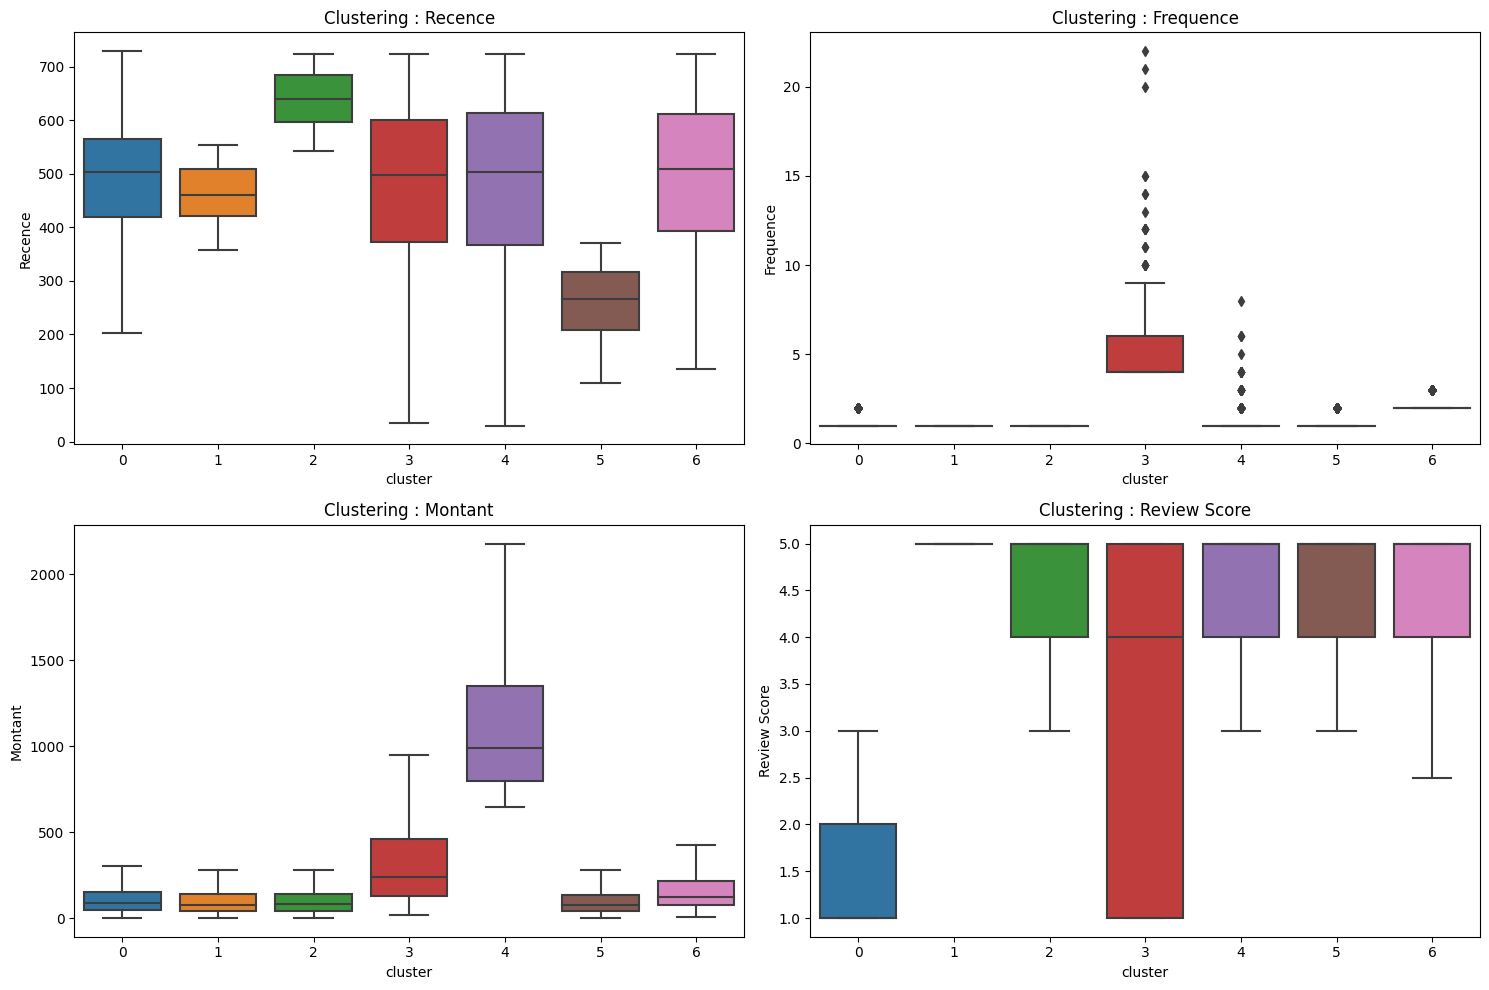

In [ ]:
# Créons une figure avec 2 ligne et 2 colonnes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graphique 1
sns.boxplot(x=rfm_score_kcl['cluster'], y='Recence', data=rfm_score_kcl[['Recence', 'Frequence', 'Montant', 'Review Score']], showfliers=False, ax=axes[0, 0])
axes[0, 0].set_title('Clustering : Recence')

# Graphique 2
sns.boxplot(x=rfm_score_kcl['cluster'], y='Frequence', data=rfm_score_kcl[['Recence', 'Frequence', 'Montant', 'Review Score']], showfliers=True, ax=axes[0, 1])
axes[0, 1].set_title('Clustering : Frequence')

# Graphique 3
sns.boxplot(x=rfm_score_kcl['cluster'], y='Montant', data=rfm_score_kcl[['Recence', 'Frequence', 'Montant', 'Review Score']], showfliers=False, ax=axes[1, 0])
axes[1, 0].set_title('Clustering : Montant')

# Graphique 4
sns.boxplot(x=rfm_score_kcl['cluster'], y='Review Score', data=rfm_score_kcl[['Recence', 'Frequence', 'Montant', 'Review Score']], showfliers=False, ax=axes[1, 1])
axes[1, 1].set_title('Clustering : Review Score')

plt.tight_layout()
plt.show()


>>> ### **Clustering hierarchique**

In [ ]:
rfm_score_data = rfm_score[['recence', 'frequence', 'montant', 'Score_commentaire']]
X_score_data = rfm_score_data
X_score_data.head()

recence  frequence  montant  Score_commentaire
0      436          1   89.800              1.000
1      315          1   54.900              4.000
2      177          1  179.990              5.000
3      346          1  149.900              5.000
4      575          1   93.000              4.000

Effectuer le clustering K-means pour obtenir les centres de cluster :

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform

# Appliquer le clustering K-means pour obtenir les centres de cluster
kmeans = KMeans(n_clusters=300, n_init=10)
kmeans.fit(X_score_data)
cluster_centers = kmeans.cluster_centers_

# Ajouter les coordonnées des centroïdes à la liste centroids
centroids_rs = []
for center in cluster_centers:
    centroids_rs.append(center.tolist())

# Calculer les distances entre les centres de cluster
distances = pdist(cluster_centers)

from scipy.spatial.distance import squareform
distance_matrix = squareform(distances)

from scipy.cluster import hierarchy

# Effectuer le clustering agglomératif avec les distances entre les centres de cluster
clusters = hierarchy.linkage(distance_matrix, method='ward', optimal_ordering=True)

# Obtenir les étiquettes de cluster à partir du modèle KMeans
cluster_labels = kmeans.labels_


<ipython-input-356-4e0aafbee7fc>:24: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = hierarchy.linkage(distance_matrix, method='ward', optimal_ordering=True)


In [ ]:
# Calculer le score silhouette
silhouette_coef_review_CLH = silhouette_score(X_score_data, cluster_labels)
print("Silhouette Score:", silhouette_coef_review_CLH)

print('\n')
# Afficher les coordonnées des centroïdes
print("Coordonnees des centroides:")
for i, centroid_rs in enumerate(centroids_rs):
    print("Cluster", i+1, ":", centroid_rs)

Silhouette Score: 0.335988081171432


Coordonnees des centroides:
Cluster 1 : [696.1428571428572, 1.3809523809523807, 413.15920634920644, 3.9761904761904763]
Cluster 2 : [498.4981981981981, 1.067567567567568, 48.34758558558522, 4.223423423423424]
Cluster 3 : [529.8181818181819, 1.2272727272727273, 1572.522272727273, 3.181818181818182]
Cluster 4 : [245.56293706293803, 1.1066433566433564, 90.02346153846167, 4.081293706293707]
Cluster 5 : [689.6544502617816, 1.0764397905759167, 49.4695497382197, 4.2785340314136135]
Cluster 6 : [325.42592592592587, 1.5370370370370368, 386.591388888889, 3.828703703703704]
Cluster 7 : [191.33333333333337, 1.0, 3992.9666666666667, 4.0]
Cluster 8 : [549.3457943925234, 1.4143302180685362, 225.64252336448612, 3.5591900311526485]
Cluster 9 : [408.91071428571433, 1.7499999999999996, 894.52875, 3.3571428571428577]
Cluster 10 : [390.0, 8.0, 13440.0, 1.0]
Cluster 11 : [373.02557544757053, 1.057544757033248, 52.9498593350383, 4.264705882352942]
Cluster 12 : [584.29423

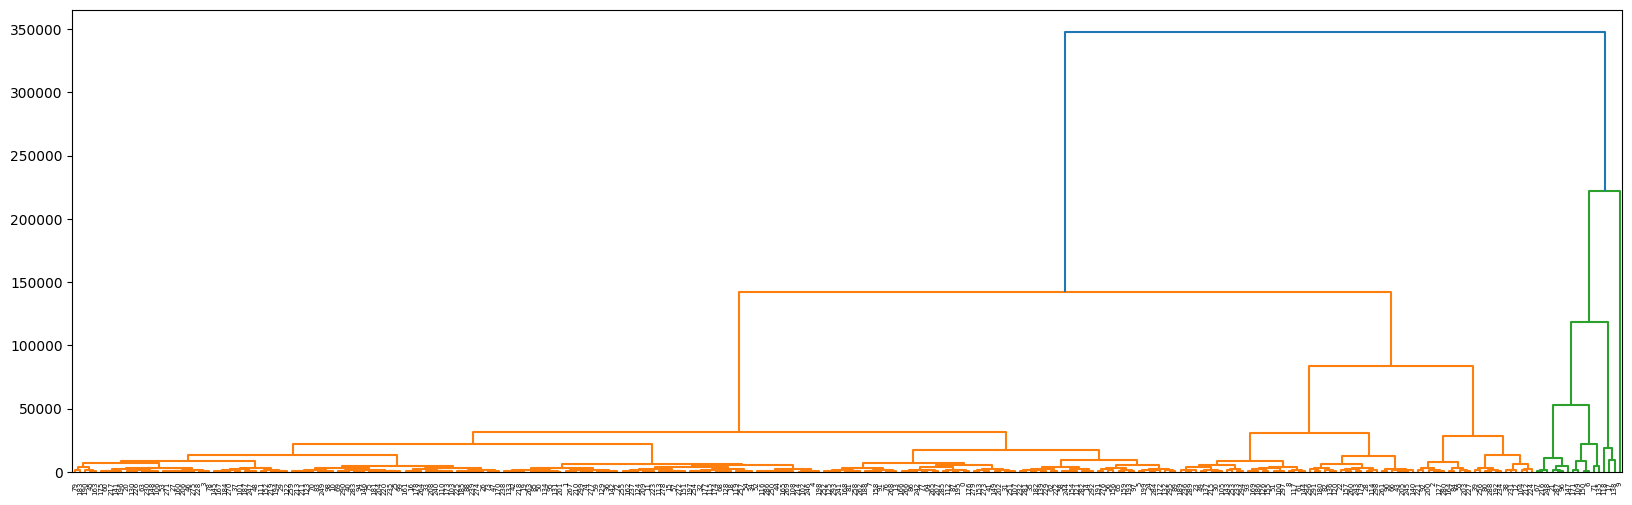

In [ ]:
# Tracer le dendrogramme
plt.figure(figsize=(20, 6))
dendrogram = hierarchy.dendrogram(clusters)

plt.show()

Et tracez les données après le regroupement agglomératif avec 300 clusters :

<ipython-input-359-67ab4e2766ea>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = hierarchy.linkage(distance_matrix, method='ward')


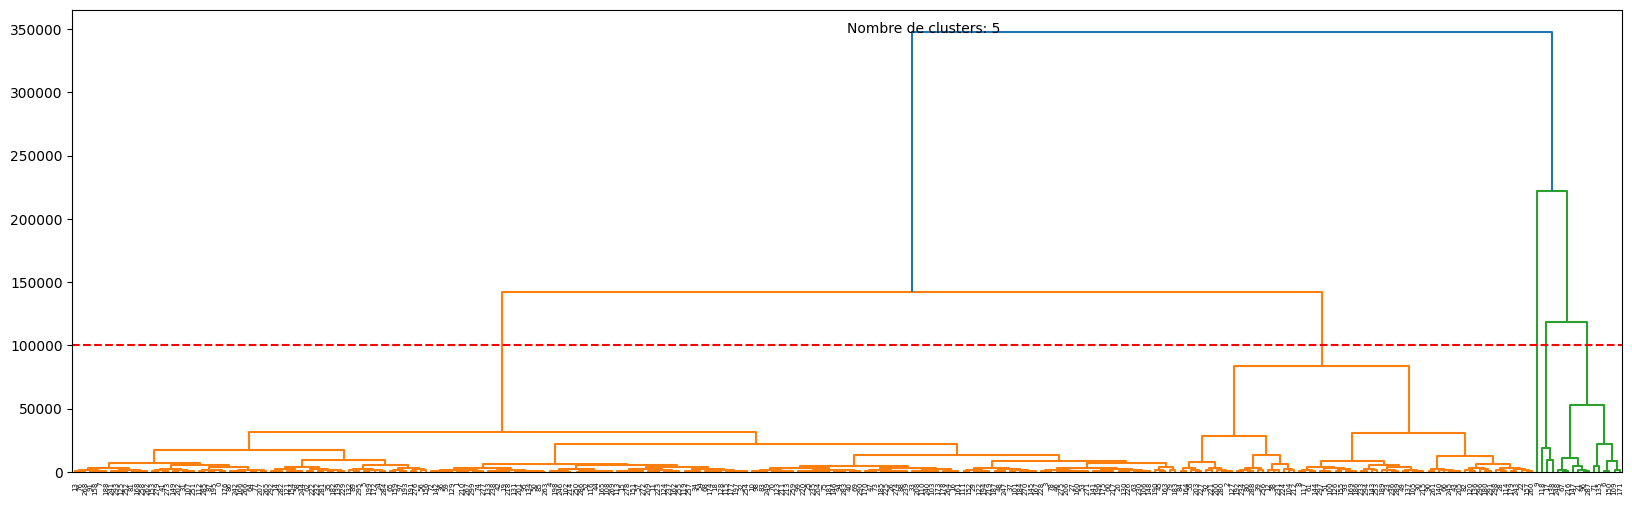

In [ ]:

# Effectuer le clustering agglomératif avec les distances entre les centres de cluster
clusters = hierarchy.linkage(distance_matrix, method='ward')

# Obtenir les clusters en coupant le dendrogramme à une distance de 100000
threshold = 100000
cluster_labels = hierarchy.fcluster(clusters, threshold, criterion='distance')

# Obtenir le nombre de clusters
num_clusters = len(set(cluster_labels))

# Tracer le dendrogramme
plt.figure(figsize=(20, 6))
dendrogram = hierarchy.dendrogram(clusters)

# Tracer une ligne horizontale basée sur la première plus grande distance entre les clusters
plt.axhline(threshold, color='red', linestyle='--')

# Afficher le nombre de clusters
plt.text(0.5, 0.95, f'Nombre de clusters: {num_clusters}', transform=plt.gca().transAxes)

plt.show()


In [ ]:
num_clusters

5

In [ ]:
# Appliquer le clustering K-means pour obtenir les centres de cluster
kmeans_score_ch = KMeans(n_clusters=num_clusters, n_init=10)
display(kmeans_score_ch.fit(X_score_data))
cluster_centers = kmeans_score_ch.cluster_centers_

KMeans(n_clusters=5, n_init=10)

In [ ]:
# Ajouter les coordonnées des centroïdes à la liste centroids
centroids_rs = []
for center in cluster_centers:
    centroids_rs.append(center.tolist())

# Calculer les distances entre les centres de cluster
distances = pdist(cluster_centers)

distance_matrix = squareform(distances)

# Effectuer le clustering agglomératif avec les distances entre les centres de cluster
clusters = hierarchy.linkage(distance_matrix, method='ward', optimal_ordering=True)

# Obtenir les étiquettes de cluster à partir du modèle KMeans
cluster_labels = kmeans_score_ch.labels_

<ipython-input-362-edf629d7fa59>:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = hierarchy.linkage(distance_matrix, method='ward', optimal_ordering=True)


In [ ]:
# Calculer le score silhouette
silhouette_coef_review_CLH = silhouette_score(X_score_data, cluster_labels)
print("Silhouette Score:", silhouette_coef_review_CLH)

print('\n')
# Afficher les coordonnées des centroïdes
print("Coordonnees des centroides:")
for i, centroid_rs in enumerate(centroids_rs):
    print("Cluster", i+1, ":", centroid_rs)

Silhouette Score: 0.39387654638123243


Coordonnees des centroides:
Cluster 1 : [468.78767083789404, 1.1280491321146382, 96.06854881495161, 3.999879860830815]
Cluster 2 : [475.34557823129256, 1.458503401360543, 1767.9076190476237, 3.895238095238096]
Cluster 3 : [264.8017644940387, 1.13098667626936, 101.322542311847, 4.165728904093133]
Cluster 4 : [636.9210859312029, 1.127487633728286, 100.51348815139009, 4.202605544691147]
Cluster 5 : [489.6895863570392, 1.4234397677793797, 571.467099056612, 3.934869375907117]


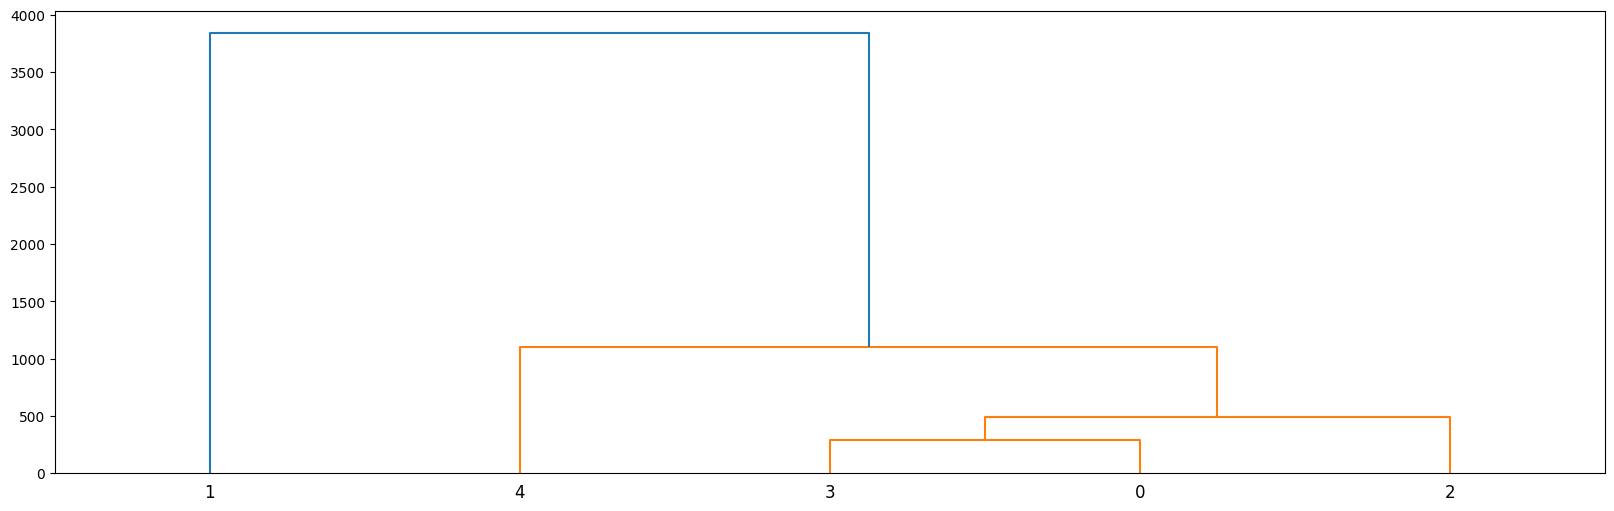

In [ ]:
# Tracer le dendrogramme
plt.figure(figsize=(20, 6))
dendrogram = hierarchy.dendrogram(clusters)

plt.show()

Modèle finalisé avec N_clusters = 5 sur la base de l'analyse ci-dessus

Ajustement du modèle avec les 5 clusters finalisées.

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X_score_data)
print(pca.explained_variance_ratio_.cumsum())

X_score_data_trans = pca.transform(X_score_data)

[0.65244198 0.99996956]


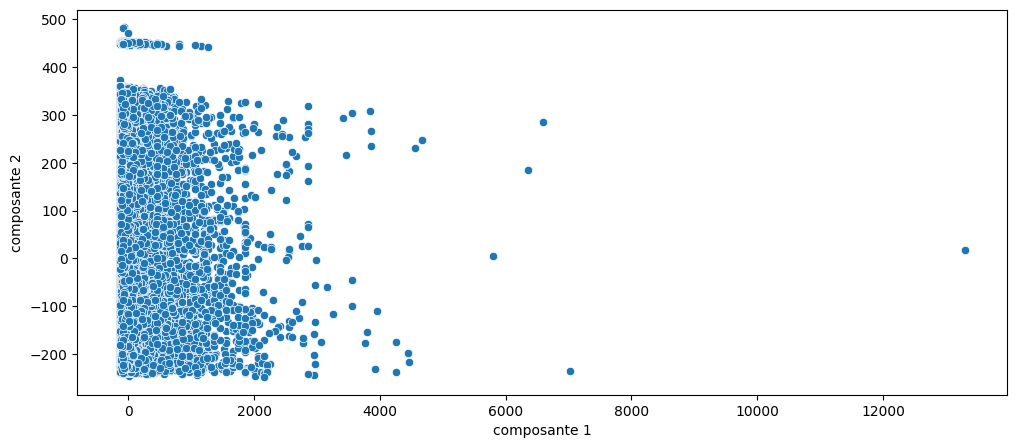

In [ ]:
plt.figure(figsize = (12, 5))

sns.scatterplot(x=X_score_data_trans[:, 0], y=X_score_data_trans[:, 1])
plt.xlabel('composante 1')
plt.ylabel('composante 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


'les coordonnées des centroides :'

array([[-4.19968175e+01,  1.48919008e+01],
       [ 1.62977733e+03, -1.23183453e+00],
       [-3.55757903e+01,  2.18844379e+02],
       [-3.85140243e+01, -1.53264223e+02],
       [ 4.33274437e+02, -8.72980262e+00]])

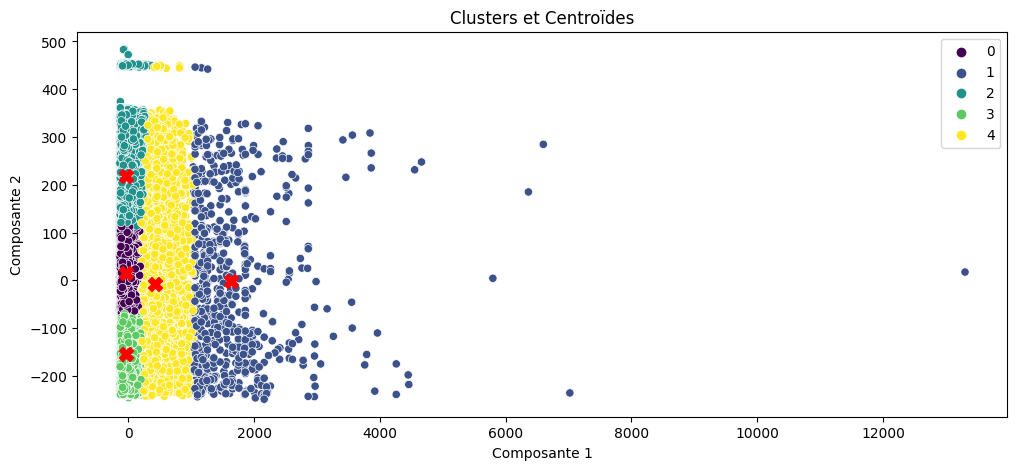

In [ ]:
# Tracer les points
plt.figure(figsize=(12, 5))
sns.scatterplot(x=X_score_data_trans[:, 0], y=X_score_data_trans[:, 1], hue=kmeans_score_ch.labels_, palette='viridis')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')

# Tracer les centroïdes
centroids_trans = pca.transform(centroids_rs)
display('les coordonnées des centroides :', centroids_trans)

print('\n')

plt.scatter(centroids_trans[:, 0], centroids_trans[:, 1], c='red', marker='X', s=100, label='Centroids')

plt.title('Clusters et Centroïdes')

plt.show()


>> Retransformation des données projetées dans leur unité d'origine

In [ ]:
X_score_data = pca.inverse_transform(X_score_data_trans)
X_score_data = pd.DataFrame(X_score_data)
X_score_data.head()

0     1       2     3
0 436.000 1.128  89.801 4.110
1 315.000 1.115  54.900 4.101
2 177.000 1.168 179.990 4.049
3 346.000 1.154 149.900 4.082
4 575.000 1.128  93.000 4.130

In [ ]:
X_score_data = X_score_data.rename(columns={0: 'Recence', 1: 'Frequence', 2: 'Montant', 3: 'Score review'})
X_score_data.head()

Recence  Frequence  Montant  Score review
0  436.000      1.128   89.801         4.110
1  315.000      1.115   54.900         4.101
2  177.000      1.168  179.990         4.049
3  346.000      1.154  149.900         4.082
4  575.000      1.128   93.000         4.130

In [ ]:
X_score_data.loc[:, 'Identifiant_client'] = rfm_score['Identifiant_client']

In [ ]:
X_score_data.head()

Recence  Frequence  Montant  Score review                Identifiant_client
0  436.000      1.128   89.801         4.110  00012a2ce6f8dcda20d059ce98491703
1  315.000      1.115   54.900         4.101  000161a058600d5901f007fab4c27140
2  177.000      1.168  179.990         4.049  0001fd6190edaaf884bcaf3d49edf079
3  346.000      1.154  149.900         4.082  0002414f95344307404f0ace7a26f1d5
4  575.000      1.128   93.000         4.130  000379cdec625522490c315e70c7a9fb

In [ ]:
X_score_data = X_score_data.reindex(columns=['Identifiant_client', 'Recence', 'Frequence', 'Montant', 'Score review'])
X_score_data.head()

Identifiant_client  Recence  Frequence  Montant  Score review
0  00012a2ce6f8dcda20d059ce98491703  436.000      1.128   89.801         4.110
1  000161a058600d5901f007fab4c27140  315.000      1.115   54.900         4.101
2  0001fd6190edaaf884bcaf3d49edf079  177.000      1.168  179.990         4.049
3  0002414f95344307404f0ace7a26f1d5  346.000      1.154  149.900         4.082
4  000379cdec625522490c315e70c7a9fb  575.000      1.128   93.000         4.130

In [ ]:
# Ajouter la colonne 'cluster' aux données d'origine
X_score_data['cluster'] =  kmeans_score_ch.labels_
X_score_data['cluster']

0        0
1        2
2        2
3        2
4        3
        ..
97912    3
97913    3
97914    3
97915    3
97916    2
Name: cluster, Length: 97917, dtype: int32

In [ ]:
X_score_data['cluster'].value_counts()

3    34775
0    34685
2    22217
4     5505
1      735
Name: cluster, dtype: int64

In [ ]:
X_score_data['cluster'].unique()

array([0, 2, 3, 4, 1], dtype=int32)

>>>> #### **Segmentation de la clientèle**

In [ ]:
X_score_data.head()

Identifiant_client  Recence  Frequence  Montant  \
0  00012a2ce6f8dcda20d059ce98491703  436.000      1.128   89.801   
1  000161a058600d5901f007fab4c27140  315.000      1.115   54.900   
2  0001fd6190edaaf884bcaf3d49edf079  177.000      1.168  179.990   
3  0002414f95344307404f0ace7a26f1d5  346.000      1.154  149.900   
4  000379cdec625522490c315e70c7a9fb  575.000      1.128   93.000   

   Score review  cluster  
0         4.110        0  
1         4.101        2  
2         4.049        2  
3         4.082        2  
4         4.130        3

In [ ]:
type_client_1 = X_score_data.loc[X_score_data['cluster'] == 0]
type_client_1 = type_client_1[['Identifiant_client', 'cluster']]
display('Client 1', type_client_1.head())
print('\n')
print('Type de client au nombre de :', type_client_1.shape[0])

'Client 1'

Identifiant_client  cluster
0   00012a2ce6f8dcda20d059ce98491703        0
6   000419c5494106c306a97b5635748086        0
7   00046a560d407e99b969756e0b10f282        0
8   00050bf6e01e69d5c0fd612f1bcfb69c        0
12  00066ccbe787a588c52bd5ff404590e3        0



Type de client au nombre de : 34685


In [ ]:
type_client_2 = X_score_data.loc[X_score_data['cluster'] == 1]
type_client_2 = type_client_2[['Identifiant_client', 'cluster']]
display('Client 2', type_client_2.head())
print('\n')
print('Type de client au nombre de :', type_client_2.shape[0])

'Client 2'

Identifiant_client  cluster
110  0049e8442c2a3e4a8d1ff5a9549abd53        1
300  00c634fb2feeb4e2767a916c2375c9b8        1
388  010be179fab38706ae5cf77170b038e3        1
525  016025d2b068f90498479376f9bfcca1        1
602  019200fa574c9eda0fbc82c71fcc8fbe        1



Type de client au nombre de : 735


In [ ]:
type_client_3 = X_score_data.loc[X_score_data['cluster'] == 2]
type_client_3 = type_client_3[['Identifiant_client', 'cluster']]
display('Client 3', type_client_3.head())
print('\n')
print('Type de client au nombre de :', type_client_3.shape[0])

'Client 3'

Identifiant_client  cluster
1   000161a058600d5901f007fab4c27140        2
2   0001fd6190edaaf884bcaf3d49edf079        2
3   0002414f95344307404f0ace7a26f1d5        2
5   0004164d20a9e969af783496f3408652        2
11  00062b33cb9f6fe976afdcff967ea74d        2



Type de client au nombre de : 22217


In [ ]:
type_client_4 = X_score_data.loc[X_score_data['cluster'] == 3]
type_client_4 = type_client_4[['Identifiant_client', 'cluster']]
display('Client 4', type_client_4.head())
print('\n')
print('Type de client au nombre de :', type_client_4.shape[0])

'Client 4'

Identifiant_client  cluster
4   000379cdec625522490c315e70c7a9fb        3
10  0005aefbb696d34b3424dccd0a0e9fd0        3
18  000fd45d6fedae68fc6676036610f879        3
20  001028b78fd413e19704b3867c369d3a        3
22  001051abfcfdbed9f87b4266213a5df1        3



Type de client au nombre de : 34775


In [ ]:
type_client_5 = X_score_data.loc[X_score_data['cluster'] == 4]
type_client_5 = type_client_5[['Identifiant_client', 'cluster']]
display('Client 5', type_client_5.head())
print('\n')
print('Type de client au nombre de :', type_client_5.shape[0])

'Client 5'

Identifiant_client  cluster
9   000598caf2ef4117407665ac33275130        4
25  0012a5c13793cf51e253f096a7e740dd        4
44  00205ad9ba1ef4340cef86583294cf82        4
56  0029cdf064769cabdf3186b54d068c99        4
74  0031abfb953b66e998f67b09e7b11375        4



Type de client au nombre de : 5505


>>>> #### **Analyses**

>> Analysons les clusters



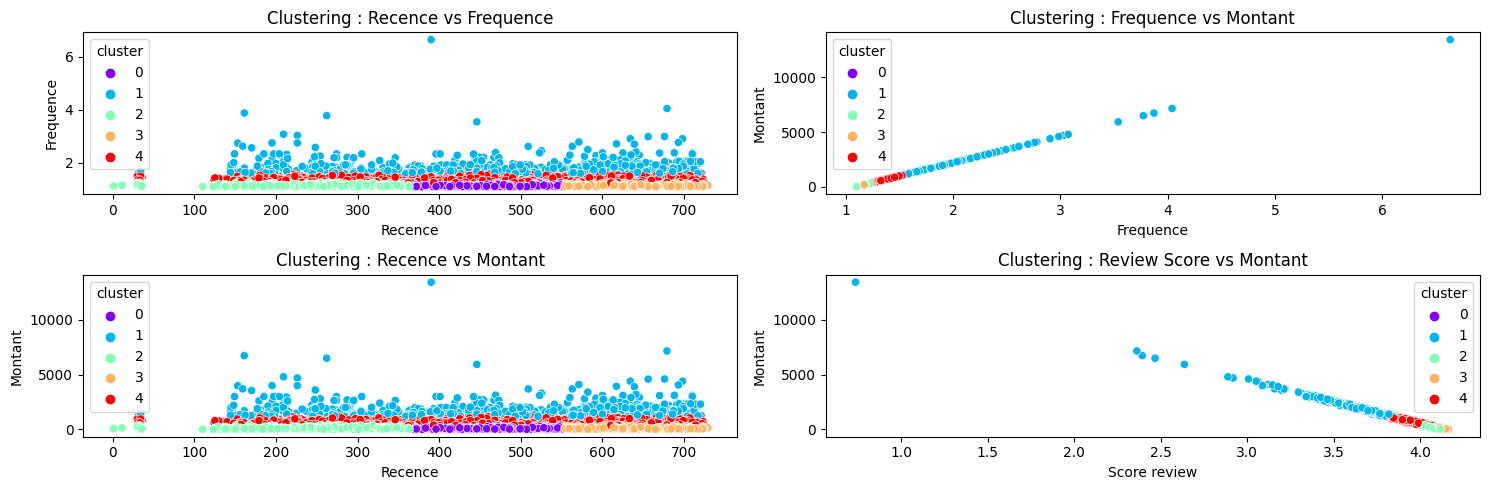

In [ ]:
# Créons une figure avec 1 ligne et 3 colonnes
fig, axes = plt.subplots(2, 2, figsize=(15, 5))

# Graphique 1
sns.scatterplot(x='Recence', y='Frequence', data=X_score_data[['Recence', 'Frequence', 'Montant', 'Score review']], hue=X_score_data['cluster'], palette='rainbow', ax=axes[0, 0])
axes[0, 0].set_title('Clustering : Recence vs Frequence')

# Graphique 2
sns.scatterplot(x='Frequence', y='Montant', data=X_score_data[['Recence', 'Frequence', 'Montant', 'Score review']], hue=X_score_data['cluster'], palette='rainbow', ax=axes[0, 1])
axes[0, 1].set_title('Clustering : Frequence vs Montant')

# Graphique 3
sns.scatterplot(x='Recence', y='Montant', data=X_score_data[['Recence', 'Frequence', 'Montant', 'Score review']], hue=X_score_data['cluster'], palette='rainbow', ax=axes[1, 0])
axes[1, 0].set_title('Clustering : Recence vs Montant')

# Graphique 4
sns.scatterplot(x='Score review', y='Montant', data=X_score_data[['Recence', 'Frequence', 'Montant', 'Score review']], hue=X_score_data['cluster'], palette='rainbow', ax=axes[1, 1])
axes[1, 1].set_title('Clustering : Review Score vs Montant')

# Ajustons l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichons la figure
plt.show()

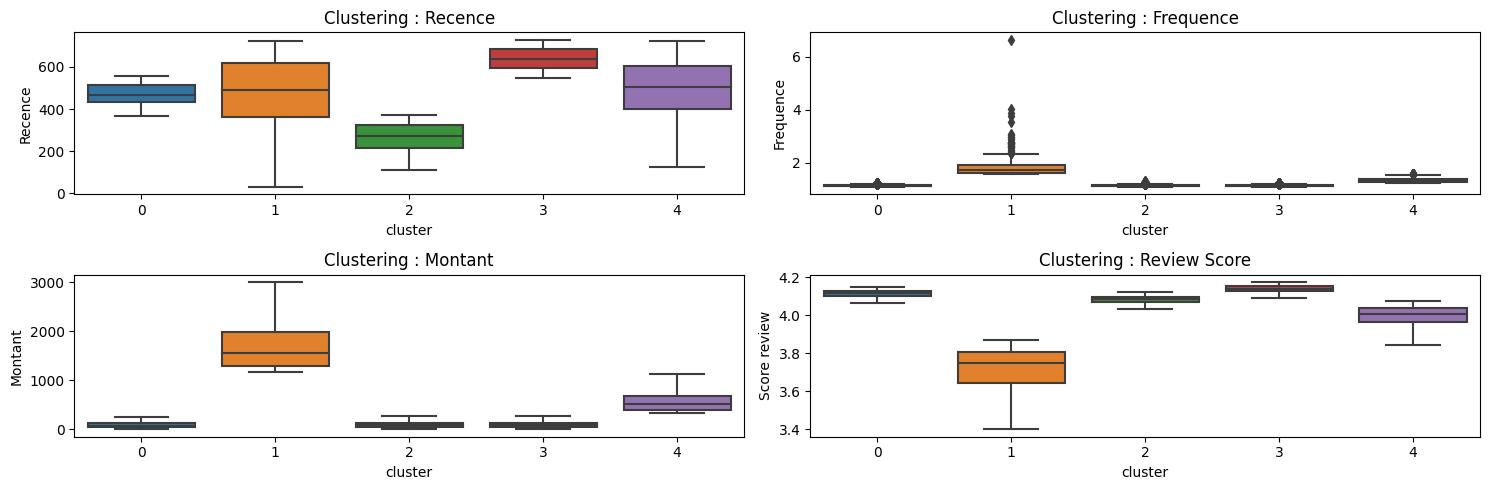

In [ ]:
# Créons une figure avec 1 ligne et 3 colonnes
fig, axes = plt.subplots(2, 2, figsize=(15, 5))

# Graphique 1
sns.boxplot(x=X_score_data['cluster'], y='Recence', data=X_score_data[['Recence', 'Frequence', 'Montant', 'Score review']], showfliers=False, ax=axes[0, 0])
axes[0, 0].set_title('Clustering : Recence')

# Graphique 2
sns.boxplot(x=X_score_data['cluster'], y='Frequence', data=X_score_data[['Recence', 'Frequence', 'Montant', 'Score review']], showfliers=True, ax=axes[0, 1])
axes[0, 1].set_title('Clustering : Frequence')

# Graphique 3
sns.boxplot(x=X_score_data['cluster'], y='Montant', data=X_score_data[['Recence', 'Frequence', 'Montant', 'Score review']], showfliers=False, ax=axes[1, 0])
axes[1, 0].set_title('Clustering : Montant')

# Graphique 4
sns.boxplot(x=X_score_data['cluster'], y='Score review', data=X_score_data[['Recence', 'Frequence', 'Montant', 'Score review']], showfliers=False, ax=axes[1, 1])
axes[1, 1].set_title('Clustering : Review Score')

# Ajustons l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichons la figure
plt.show()

>>> ### **PCA clustering**

In [ ]:
rfm_score.head()

Identifiant_client  recence  frequence  montant r_quartile  \
0  00012a2ce6f8dcda20d059ce98491703      436          1   89.800          3   
1  000161a058600d5901f007fab4c27140      315          1   54.900          3   
2  0001fd6190edaaf884bcaf3d49edf079      177          1  179.990          2   
3  0002414f95344307404f0ace7a26f1d5      346          1  149.900          3   
4  000379cdec625522490c315e70c7a9fb      575          1   93.000          4   

  f_quartile m_quartile  Score_commentaire  
0          1          1              1.000  
1          1          1              4.000  
2          1          1              5.000  
3          1          1              5.000  
4          1          1              4.000

In [ ]:
rfm_score_data = rfm_score[['recence', 'frequence', 'montant', 'Score_commentaire']]
rfm_score_data.head()

recence  frequence  montant  Score_commentaire
0      436          1   89.800              1.000
1      315          1   54.900              4.000
2      177          1  179.990              5.000
3      346          1  149.900              5.000
4      575          1   93.000              4.000

In [ ]:
X = rfm_score_data.values
X

array([[436.  ,   1.  ,  89.8 ,   1.  ],
       [315.  ,   1.  ,  54.9 ,   4.  ],
       [177.  ,   1.  , 179.99,   5.  ],
       ...,
       [625.  ,   1.  ,  47.9 ,   4.  ],
       [647.  ,   1.  , 199.9 ,   5.  ],
       [363.  ,   2.  ,  21.8 ,   5.  ]])

Nous pouvons passer à la partie visualisation. Pour ce faire, nous allons réaliser une ACP.

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial import transform

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
X_pca

array([[ -48.07695242,   47.71533877],
       [ -82.28480221,  168.91261011],
       [  43.59248696,  306.1944618 ],
       ...,
       [ -91.05843658, -141.04225925],
       [  60.81292518, -163.91176074],
       [-115.6587425 ,  121.10265178]])

Effectuons le clustering avec différents nombres de clusters

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
clusters_range = range(2, 10)
inertia = []
silhouette_scores_review_pca = []
centroids = []

for n_cluster in clusters_range:
    # On instancie notre Kmeans
    kmeans = KMeans(n_clusters=n_cluster, n_init=50, init='random') # fixer le random_state dans la parenthèse

    # On l'entraine :
    kmeans.fit(X_pca)

    # Ajoutons la valeur de l'inertie du modèle pour le nombre de clusters à la liste inertia
    inertia.append(kmeans.inertia_)

    # Calculons le score de silhouette pour les clusters obtenus
    silhouette_scores_review_pca.append(silhouette_score(X_pca, kmeans.labels_))
    print("Pour n_clusters={0}, le silhouette score PCA rfm normal est de : {1}".format(n_cluster, silhouette_scores_review_pca))

    # Ajoutons les coordonnées des centroïdes à la liste centroids
    centroids.append(kmeans.cluster_centers_)
    print("le centroïde du PCA de la rfm normale est de :", centroids)

    print('\n')

Pour n_clusters=2, le silhouette score PCA rfm normal est de : [0.7368259469850317]
le centroïde du PCA de la rfm normale est de : [array([[-2.88875763e+01, -6.88797778e-02],
       [ 8.37447741e+02,  1.99681737e+00]])]


Pour n_clusters=3, le silhouette score PCA rfm normal est de : [0.7368259469850317, 0.45035395912996057]
le centroïde du PCA de la rfm normale est de : [array([[-2.88875763e+01, -6.88797778e-02],
       [ 8.37447741e+02,  1.99681737e+00]]), array([[-2.81731674e+01, -1.10913134e+02],
       [ 8.65519515e+02,  6.74027379e-01],
       [-2.75589332e+01,  1.49340620e+02]])]


Pour n_clusters=4, le silhouette score PCA rfm normal est de : [0.7368259469850317, 0.45035395912996057, 0.47023740454098634]
le centroïde du PCA de la rfm normale est de : [array([[-2.88875763e+01, -6.88797778e-02],
       [ 8.37447741e+02,  1.99681737e+00]]), array([[-2.81731674e+01, -1.10913134e+02],
       [ 8.65519515e+02,  6.74027379e-01],
       [-2.75589332e+01,  1.49340620e+02]]), array([[-3.

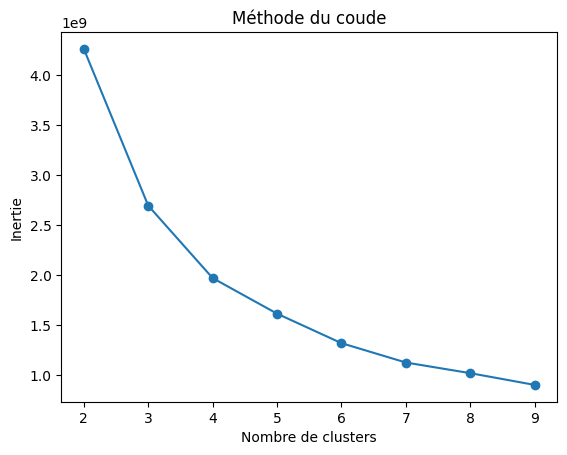

<Figure size 640x480 with 0 Axes>

In [ ]:
# Tracer la courbe du coude
plt.plot(clusters_range, inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

# Sauvegarder le graphique dans un fichier
plt.savefig('Methode_du_coude_RFM_avec_RScore.png')

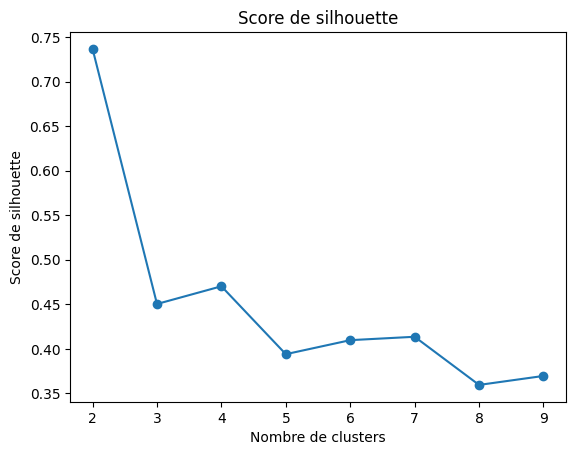

In [ ]:
# Tracer le score de silhouette
plt.plot(clusters_range, silhouette_scores_review_pca, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette')
plt.show()

In [ ]:
# Stocker les centroids du meilleur nombre de clusters
best_cluster = silhouette_scores_review_pca.index(max(silhouette_scores_review_pca))
best_centroids = centroids[best_cluster]

In [ ]:
indice_cluster = best_cluster
indice_cluster

0

In [ ]:
meilleur_cluster = clusters_range[indice_cluster]

In [ ]:
meilleur_coef_silhouette_review_pca = silhouette_scores_review_pca[indice_cluster]

In [ ]:
print('Meilleur cluster :', meilleur_cluster)
print('\n')
print('Meilleur silhouette_scores :', meilleur_coef_silhouette_review_pca)
print('\n')
print('Meilleur centroïde :', best_centroids)

Meilleur cluster : 2


Meilleur silhouette_scores : 0.7368259469850317


Meilleur centroïde : [[-2.88875763e+01 -6.88797778e-02]
 [ 8.37447741e+02  1.99681737e+00]]


On peut désormais afficher nos points :

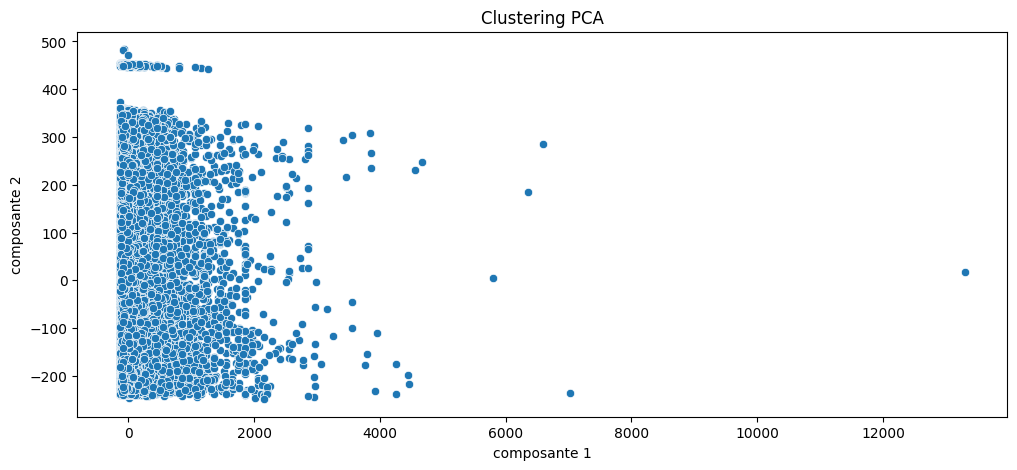

In [ ]:
# Affichage des points projetés
plt.figure(figsize = (12, 5))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.xlabel('composante 1')
plt.ylabel('composante 2')
plt.title("Clustering PCA")

plt.show()


In [ ]:
kmeans_score_pca = KMeans(n_clusters=meilleur_cluster, n_init=50, init='random')
kmeans_score_pca.fit(X_pca)

KMeans(init='random', n_clusters=2, n_init=50)

In [ ]:
rfm_score_pca = X_pca
rfm_score_pca

array([[ -48.07695242,   47.71533877],
       [ -82.28480221,  168.91261011],
       [  43.59248696,  306.1944618 ],
       ...,
       [ -91.05843658, -141.04225925],
       [  60.81292518, -163.91176074],
       [-115.6587425 ,  121.10265178]])

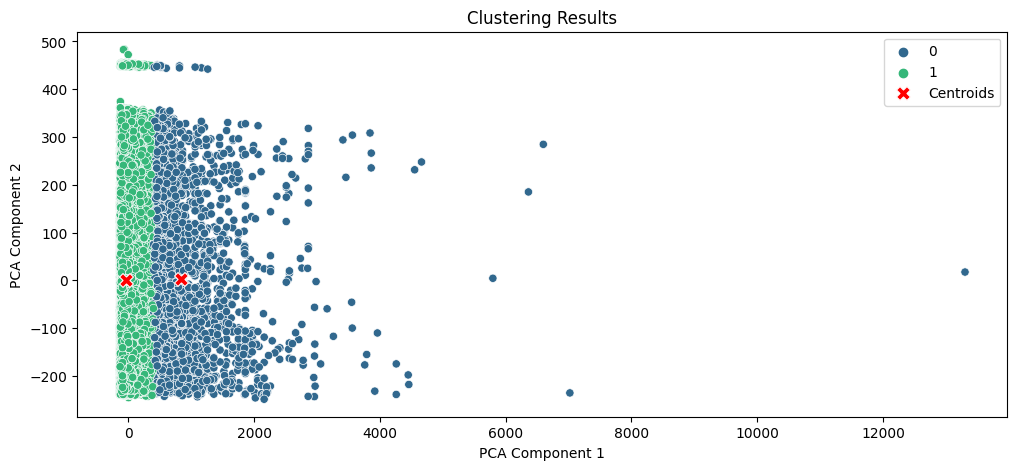

<Figure size 640x480 with 0 Axes>

In [ ]:
# Tracer les points et les centroïdes du meilleur cluster
plt.figure(figsize=(12, 5))
sns.scatterplot(x=rfm_score_pca[:, 0], y=rfm_score_pca[:, 1], hue=kmeans_score_pca.labels_, palette='viridis')
sns.scatterplot(x=best_centroids[:, 0], y=best_centroids[:, 1], marker='X', color='red', s=100, label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Results')

plt.show()

# Sauvegarder le graphique dans un fichier
plt.savefig('Clustering_Results_RFM_avec_RScore.png')

>>>> #### **Segmentation de la clientèle**

In [ ]:
rfm_score_pca_reconstruit = pca.inverse_transform(rfm_score_pca)
rfm_score_pca_reconstruit = pd.DataFrame(rfm_score_pca_reconstruit)
rfm_score_pca_reconstruit

0     1       2     3
0     436.000 1.128  89.801 4.110
1     315.000 1.115  54.900 4.101
2     177.000 1.168 179.990 4.049
3     346.000 1.154 149.900 4.082
4     575.000 1.128  93.000 4.130
...       ...   ...     ...   ...
97912 559.000 1.122  78.000 4.131
97913 571.000 1.112  54.900 4.139
97914 625.000 1.109  47.900 4.149
97915 647.000 1.171 199.900 4.114
97916 363.000 1.101  21.800 4.117

[97917 rows x 4 columns]

In [ ]:
rfm_score_pca_reconstruit.loc[:, 'Identifiant_client'] = rfm_score['Identifiant_client']
rfm_score_pca_reconstruit.head()

0     1       2     3                Identifiant_client
0 436.000 1.128  89.801 4.110  00012a2ce6f8dcda20d059ce98491703
1 315.000 1.115  54.900 4.101  000161a058600d5901f007fab4c27140
2 177.000 1.168 179.990 4.049  0001fd6190edaaf884bcaf3d49edf079
3 346.000 1.154 149.900 4.082  0002414f95344307404f0ace7a26f1d5
4 575.000 1.128  93.000 4.130  000379cdec625522490c315e70c7a9fb

Vue d'ensemble du dataframe actuel

In [ ]:
rfm_score_pca = rfm_score_pca_reconstruit.rename(columns={0: 'Recence', 1: 'Frequence', 2: 'Montant', 3: 'Score review'})
rfm_score_pca = rfm_score_pca.reindex(columns=['Identifiant_client', 'Recence', 'Frequence', 'Montant', 'Score review'])
rfm_score_pca.head()

Identifiant_client  Recence  Frequence  Montant  Score review
0  00012a2ce6f8dcda20d059ce98491703  436.000      1.128   89.801         4.110
1  000161a058600d5901f007fab4c27140  315.000      1.115   54.900         4.101
2  0001fd6190edaaf884bcaf3d49edf079  177.000      1.168  179.990         4.049
3  0002414f95344307404f0ace7a26f1d5  346.000      1.154  149.900         4.082
4  000379cdec625522490c315e70c7a9fb  575.000      1.128   93.000         4.130


Après avoir ajouté les étiquettes de regroupement résultantes dans la dernière colonne, la vue du dataframe.

In [ ]:
rfm_score_pca['cluster'] = kmeans_score_pca.labels_
rfm_score_pca.head()

Identifiant_client  Recence  Frequence  Montant  \
0  00012a2ce6f8dcda20d059ce98491703  436.000      1.128   89.801   
1  000161a058600d5901f007fab4c27140  315.000      1.115   54.900   
2  0001fd6190edaaf884bcaf3d49edf079  177.000      1.168  179.990   
3  0002414f95344307404f0ace7a26f1d5  346.000      1.154  149.900   
4  000379cdec625522490c315e70c7a9fb  575.000      1.128   93.000   

   Score review  cluster  
0         4.110        1  
1         4.101        1  
2         4.049        1  
3         4.082        1  
4         4.130        1

In [ ]:
rfm_score_pca.cluster.unique()

array([1, 0], dtype=int32)

>>>>> ##### **Les 2 types de clients**

>>>>>>  ###### Fichier client issu du RFM avec review score dont le cluster correspond à 0

In [ ]:
type_client_1 = rfm_score_pca.loc[rfm_score_pca['cluster'] == 0]

display('Client 1', type_client_1.head())
print('\n')
print('Type de client au nombre de :', type_client_1.shape[0])

'Client 1'

Identifiant_client  Recence  Frequence  Montant  \
9    000598caf2ef4117407665ac33275130  706.000      1.545 1106.999   
44   00205ad9ba1ef4340cef86583294cf82  615.000      1.460  899.900   
74   0031abfb953b66e998f67b09e7b11375  506.000      1.353  637.901   
87   003bc8d06ebed9d146eb9f100d0a89ae  549.000      1.325  569.000   
110  0049e8442c2a3e4a8d1ff5a9549abd53  358.000      1.587 1199.999   

     Score review  cluster  
9           3.893        0  
44          3.932        0  
74          3.982        0  
87          4.006        0  
110         3.819        0



Type de client au nombre de : 3301


In [ ]:
type_client_1.describe()

Recence  Frequence   Montant  Score review  cluster
count 3301.000   3301.000  3301.000      3301.000 3301.000
mean   476.686      1.491   970.821         3.894    0.000
std    156.359      0.244   592.512         0.151    0.000
min     30.000      1.311   537.990         0.734    0.000
25%    365.000      1.349   626.000         3.863    0.000
50%    494.000      1.416   790.000         3.939    0.000
75%    608.000      1.542  1098.999         3.978    0.000
max    723.000      6.634 13440.000         4.036    0.000

In [ ]:
type_client_1['Identifiant_client'].describe()

count                                 3301
unique                                3301
top       000598caf2ef4117407665ac33275130
freq                                     1
Name: Identifiant_client, dtype: object

In [ ]:
type_client_1[['Recence',	'Frequence',	'Montant', 'Score review']].describe()

Recence  Frequence   Montant  Score review
count 3301.000   3301.000  3301.000      3301.000
mean   476.686      1.491   970.821         3.894
std    156.359      0.244   592.512         0.151
min     30.000      1.311   537.990         0.734
25%    365.000      1.349   626.000         3.863
50%    494.000      1.416   790.000         3.939
75%    608.000      1.542  1098.999         3.978
max    723.000      6.634 13440.000         4.036

<ipython-input-412-08f57db9b7db>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_client_1['Montant_bin'] = pd.cut(type_client_1['Montant'], bins=bins, labels=labels)


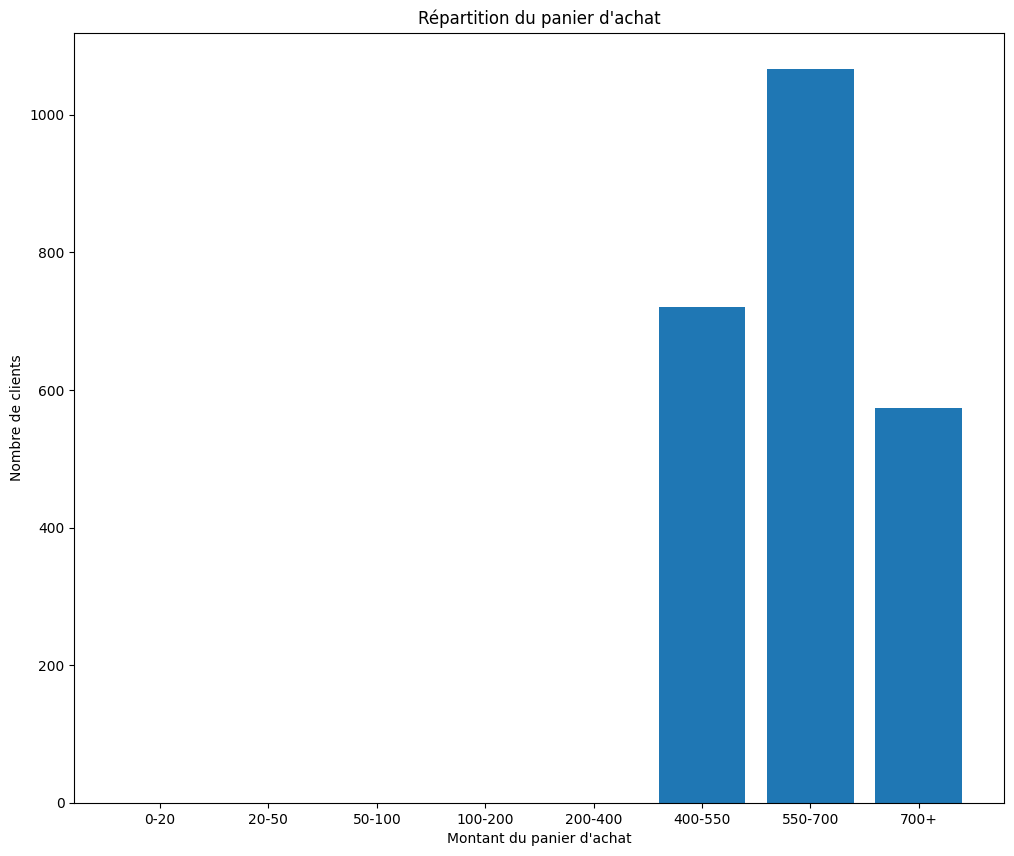

In [ ]:
plt.figure(figsize=(12, 10))

bins = [0, 20, 50, 100, 200, 400, 600, 800, 1000]
labels = ['0-20', '20-50', '50-100', '100-200', '200-400', '400-550', '550-700', '700+']

type_client_1['Montant_bin'] = pd.cut(type_client_1['Montant'], bins=bins, labels=labels)

bin_counts = type_client_1['Montant_bin'].value_counts().sort_index()

plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel("Montant du panier d'achat")
plt.ylabel("Nombre de clients")
plt.title("Répartition du panier d'achat")
plt.show()

<ipython-input-413-421a4e237de6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_client_1['Frequence_bin'] = pd.cut(type_client_1['Frequence'], bins=bins, labels=labels)


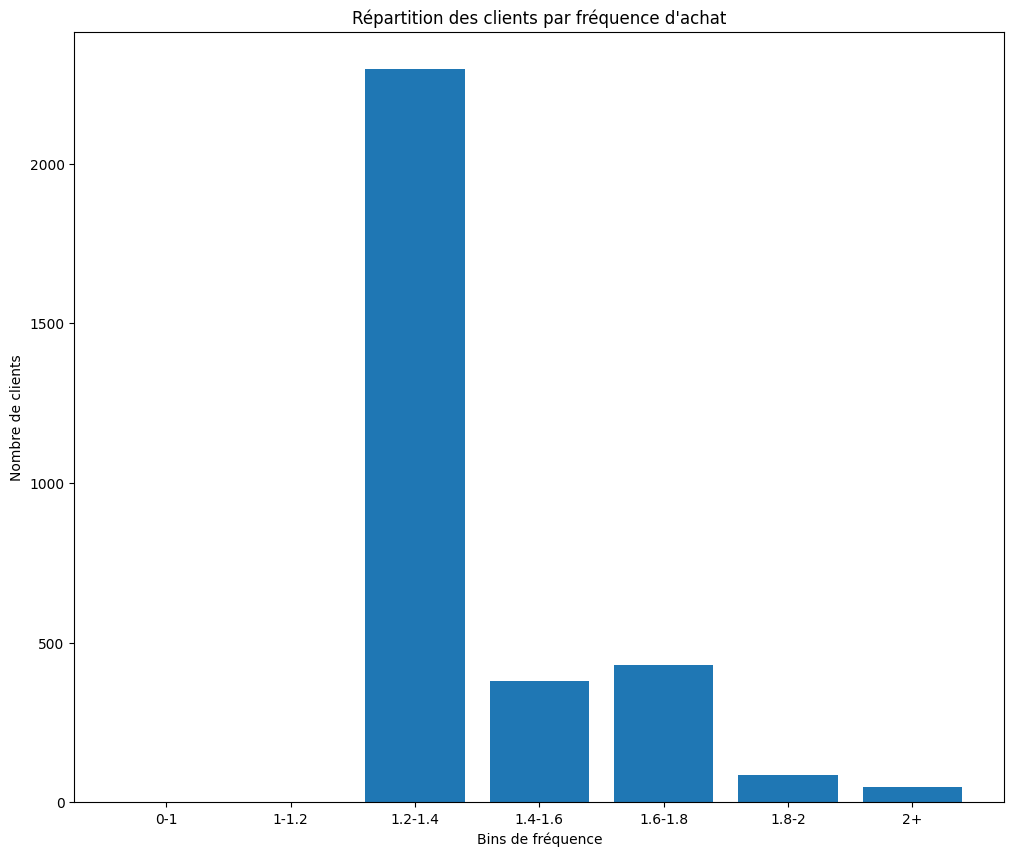

In [ ]:
plt.figure(figsize=(12, 10))

bins = [1, 1.1, 1.3, 1.5, 1.6, 1.9, 2, 2.2]
labels = ['0-1', '1-1.2', '1.2-1.4', '1.4-1.6', '1.6-1.8', '1.8-2', '2+']

type_client_1['Frequence_bin'] = pd.cut(type_client_1['Frequence'], bins=bins, labels=labels)

bin_counts = type_client_1['Frequence_bin'].value_counts().sort_index()

plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('Bins de fréquence')
plt.ylabel('Nombre de clients')
plt.title('Répartition des clients par fréquence d\'achat')
plt.show()


<ipython-input-414-ccc205e3e1de>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_client_1['Recence_bin'] = pd.cut(type_client_1['Recence'], bins=bins, labels=labels)


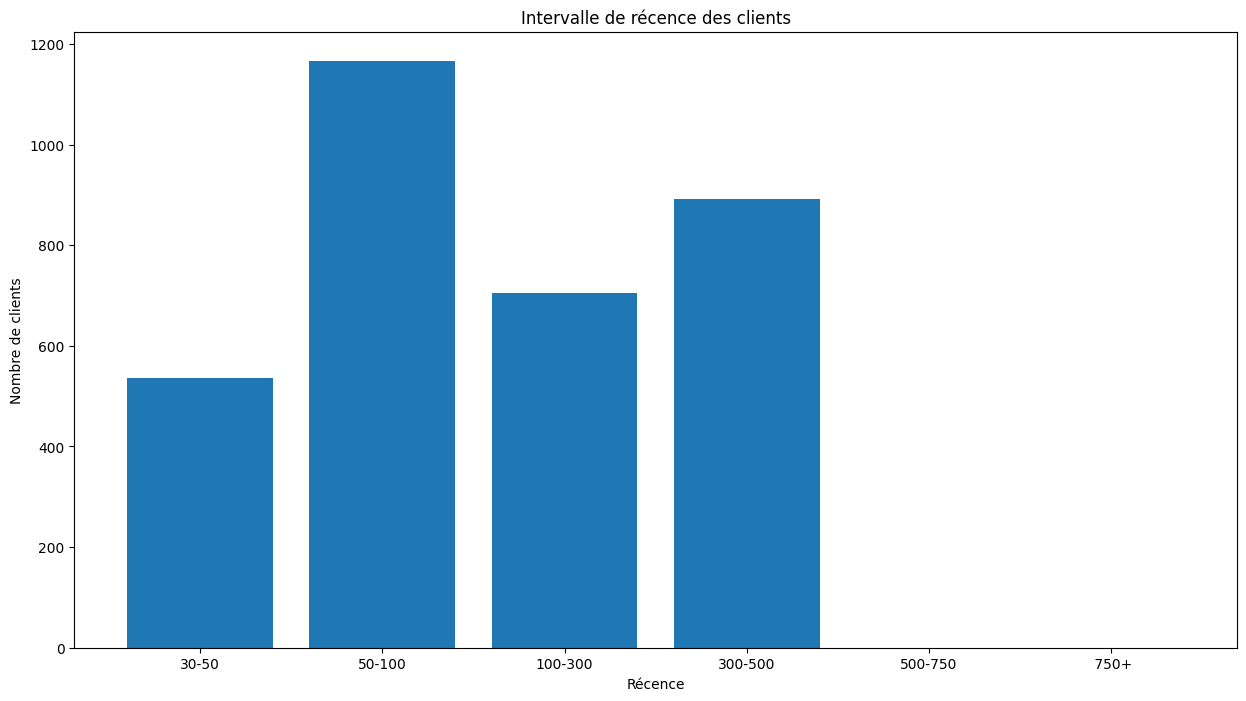

In [ ]:
plt.figure(figsize=(15, 8))

bins = [30, 300, 500, 600, 750, 850, 1000]
labels = ['30-50', '50-100', '100-300', '300-500', '500-750', ' 750+']

type_client_1['Recence_bin'] = pd.cut(type_client_1['Recence'], bins=bins, labels=labels)

bin_counts = type_client_1['Recence_bin'].value_counts().sort_index()

# Création de l'histogramme
plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('Récence')
plt.ylabel('Nombre de clients')
plt.title("Intervalle de récence des clients")
plt.show()

<ipython-input-415-25b844505cfa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_client_1['Score review_bin'] = pd.cut(type_client_1['Score review'], bins=bins, labels=labels)


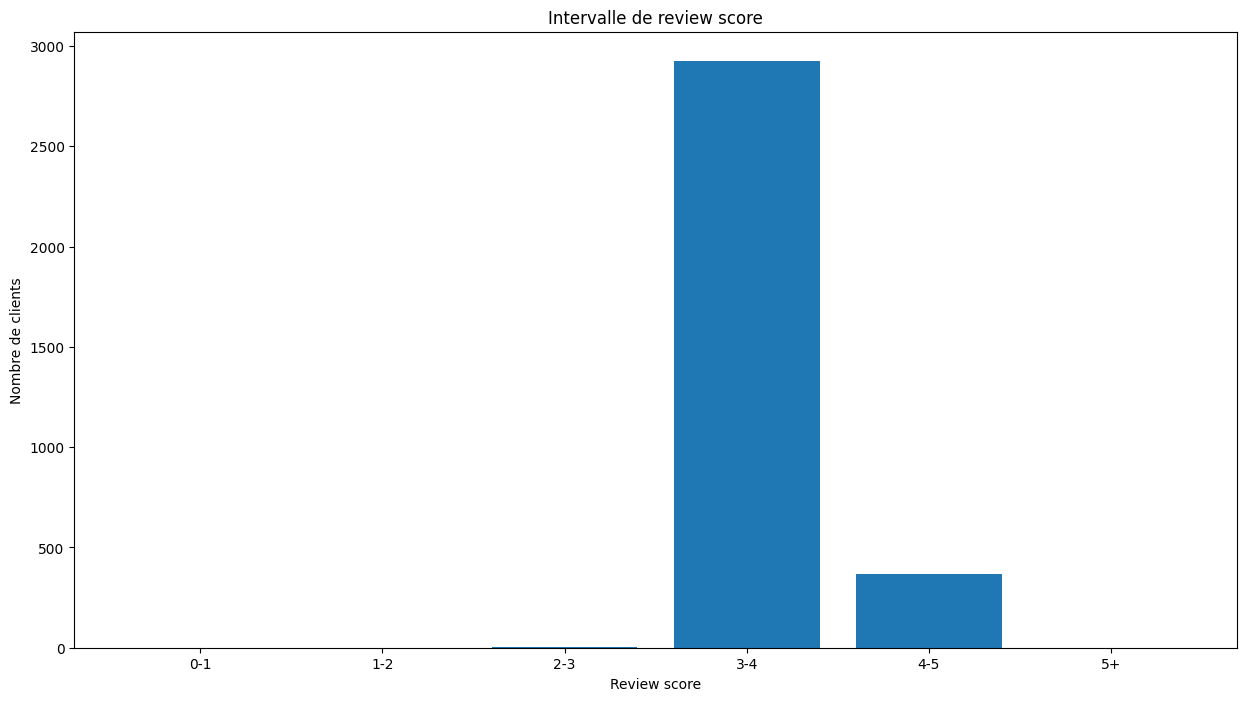

In [ ]:
plt.figure(figsize=(15, 8))

bins = [0, 1, 2, 3, 4, 6, 10]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5+']

type_client_1['Score review_bin'] = pd.cut(type_client_1['Score review'], bins=bins, labels=labels)

bin_counts = type_client_1['Score review_bin'].value_counts().sort_index()

# Création de l'histogramme
plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('Review score')
plt.ylabel('Nombre de clients')
plt.title("Intervalle de review score")
plt.show()

>>>>>>  ###### Fichier client issu du RFM avec review score dont le cluster correspond à 1

In [ ]:
type_client_2 = rfm_score_pca.loc[rfm_score_pca['cluster'] == 1]

display('Client 2', type_client_2.head())
print('\n')
print('Type de client au nombre de :', type_client_2.shape[0])

'Client 2'

Identifiant_client  Recence  Frequence  Montant  \
0  00012a2ce6f8dcda20d059ce98491703  436.000      1.128   89.801   
1  000161a058600d5901f007fab4c27140  315.000      1.115   54.900   
2  0001fd6190edaaf884bcaf3d49edf079  177.000      1.168  179.990   
3  0002414f95344307404f0ace7a26f1d5  346.000      1.154  149.900   
4  000379cdec625522490c315e70c7a9fb  575.000      1.128   93.000   

   Score review  cluster  
0         4.110        1  
1         4.101        1  
2         4.049        1  
3         4.082        1  
4         4.130        1



Type de client au nombre de : 94616


In [ ]:
type_client_2.describe()

Recence  Frequence   Montant  Score review   cluster
count 94616.000  94616.000 94616.000     94616.000 94616.000
mean    483.675      1.136   109.099         4.112     1.000
std     153.313      0.038    91.929         0.032     0.000
min      -0.000      1.089     0.850         3.947     1.000
25%     374.000      1.109    45.000         4.093     1.000
50%     503.000      1.125    82.000         4.117     1.000
75%     608.000      1.150   142.800         4.136     1.000
max     729.000      1.314   540.000         4.174     1.000

In [ ]:
type_client_2['Identifiant_client'].describe()

count                                94616
unique                               94616
top       00012a2ce6f8dcda20d059ce98491703
freq                                     1
Name: Identifiant_client, dtype: object

In [ ]:
type_client_2[['Recence',	'Frequence',	'Montant',	'Score review']].describe()

Recence  Frequence   Montant  Score review
count 94616.000  94616.000 94616.000     94616.000
mean    483.675      1.136   109.099         4.112
std     153.313      0.038    91.929         0.032
min      -0.000      1.089     0.850         3.947
25%     374.000      1.109    45.000         4.093
50%     503.000      1.125    82.000         4.117
75%     608.000      1.150   142.800         4.136
max     729.000      1.314   540.000         4.174

<ipython-input-420-053f6e4d43ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_client_2['Montant_bin'] = pd.cut(type_client_2['Montant'], bins=bins, labels=labels)


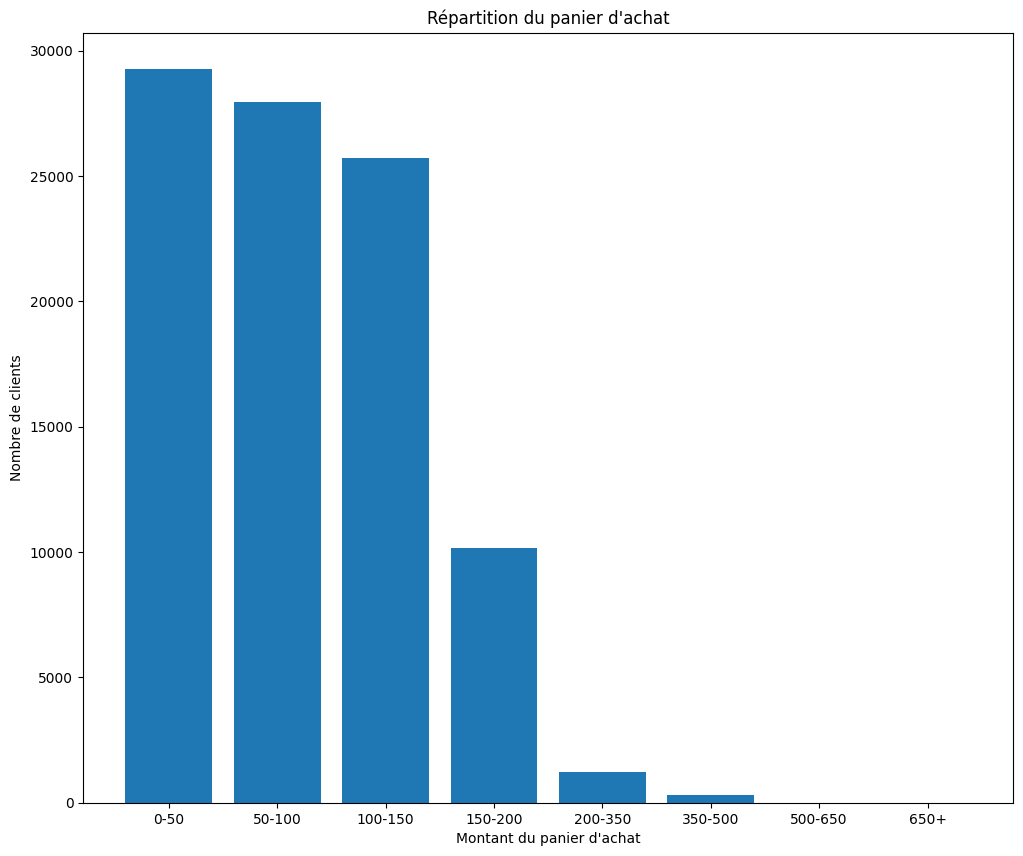

In [ ]:
plt.figure(figsize=(12, 10))

bins = [0, 50, 100, 200, 400, 500, 700, 800, 1000]
labels = ['0-50', '50-100', '100-150', '150-200', '200-350', '350-500', '500-650', '650+']

type_client_2['Montant_bin'] = pd.cut(type_client_2['Montant'], bins=bins, labels=labels)

bin_counts = type_client_2['Montant_bin'].value_counts().sort_index()

plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel("Montant du panier d'achat")
plt.ylabel("Nombre de clients")
plt.title("Répartition du panier d'achat")
plt.show()

<ipython-input-421-cfc69eddb74e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_client_2['Frequence_bin'] = pd.cut(type_client_2['Frequence'], bins=bins, labels=labels)


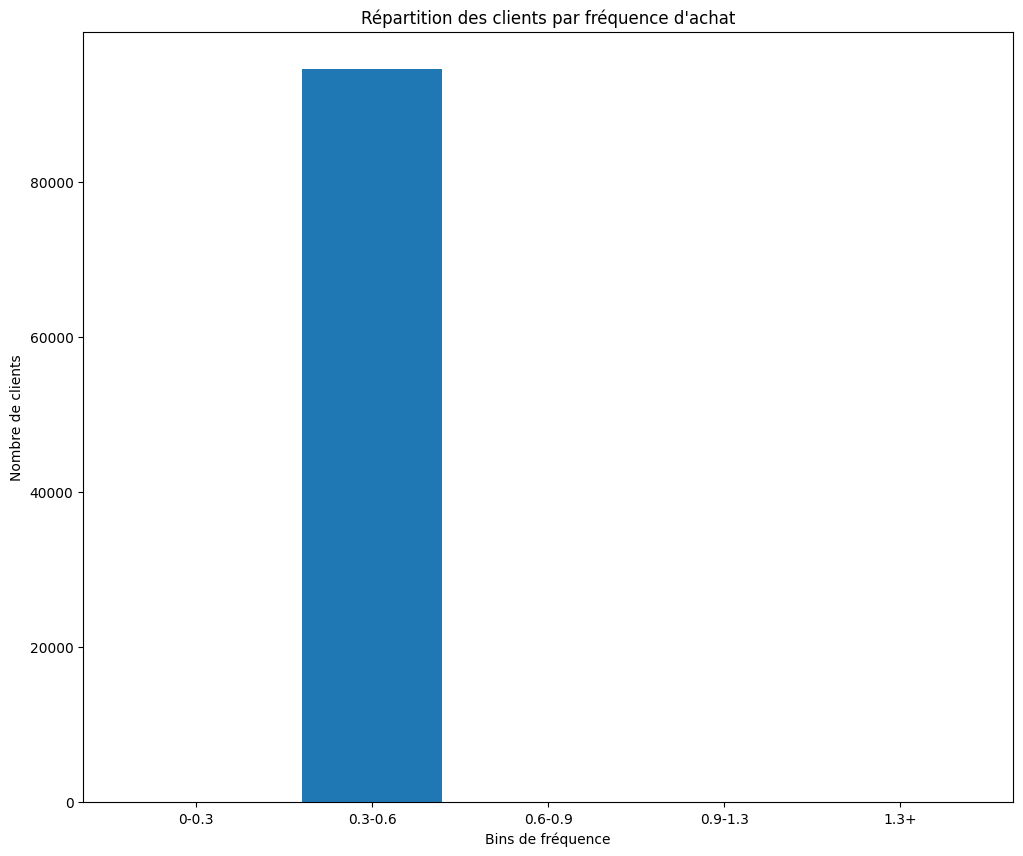

In [ ]:
plt.figure(figsize=(12, 10))

bins = [0, 1, 2, 3, 4, 5]
labels = ['0-0.3', '0.3-0.6', '0.6-0.9', '0.9-1.3','1.3+']

type_client_2['Frequence_bin'] = pd.cut(type_client_2['Frequence'], bins=bins, labels=labels)

bin_counts = type_client_2['Frequence_bin'].value_counts().sort_index()

plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('Bins de fréquence')
plt.ylabel('Nombre de clients')
plt.title('Répartition des clients par fréquence d\'achat')
plt.show()

<ipython-input-422-d21890a0e6f8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_client_2['Recence_bin'] = pd.cut(type_client_2['Recence'], bins=bins, labels=labels)


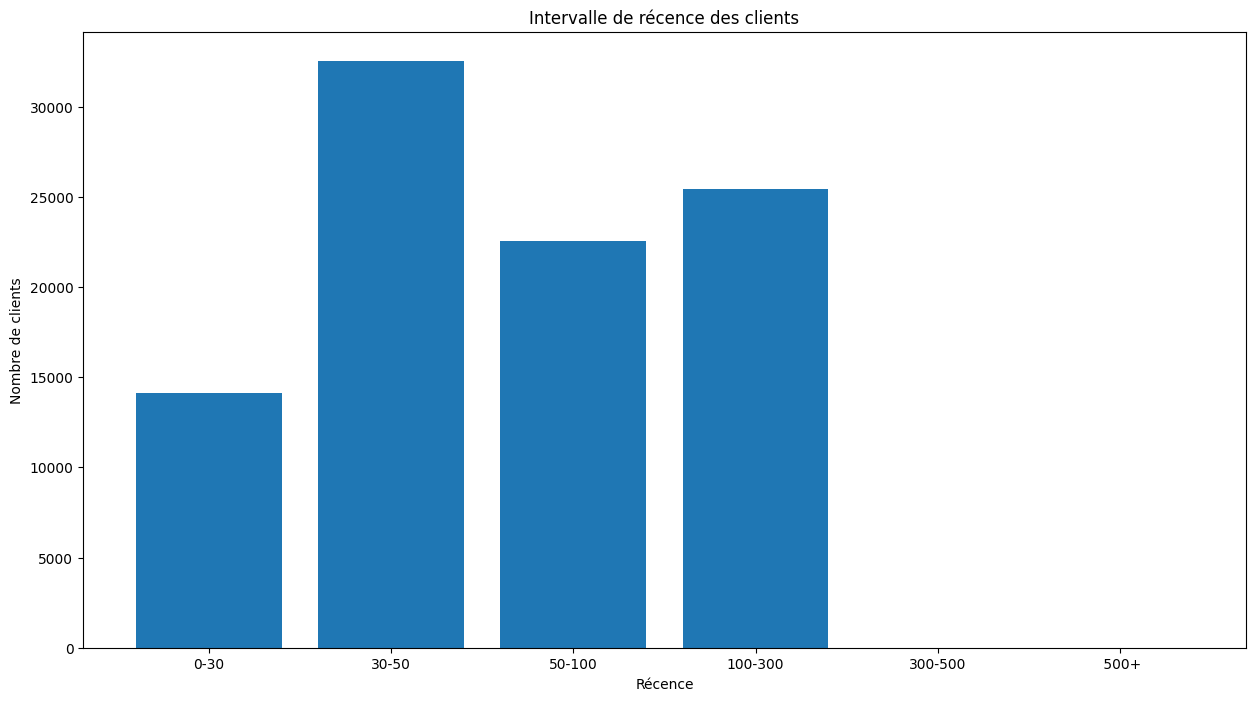

In [ ]:
plt.figure(figsize=(15, 8))

bins = [0, 300, 500, 600, 750, 850, 1000]
labels = ['0-30', '30-50', '50-100', '100-300', '300-500', ' 500+']

type_client_2['Recence_bin'] = pd.cut(type_client_2['Recence'], bins=bins, labels=labels)

bin_counts = type_client_2['Recence_bin'].value_counts().sort_index()

# Création de l'histogramme
plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('Récence')
plt.ylabel('Nombre de clients')
plt.title("Intervalle de récence des clients")
plt.show()

In [ ]:
type_client_2['Score review'].describe()

count   94616.000
mean        4.112
std         0.032
min         3.947
25%         4.093
50%         4.117
75%         4.136
max         4.174
Name: Score review, dtype: float64

<ipython-input-424-6cc1f8a4093a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_client_2['Score review_bin'] = pd.cut(type_client_2['Score review'], bins=bins, labels=labels)


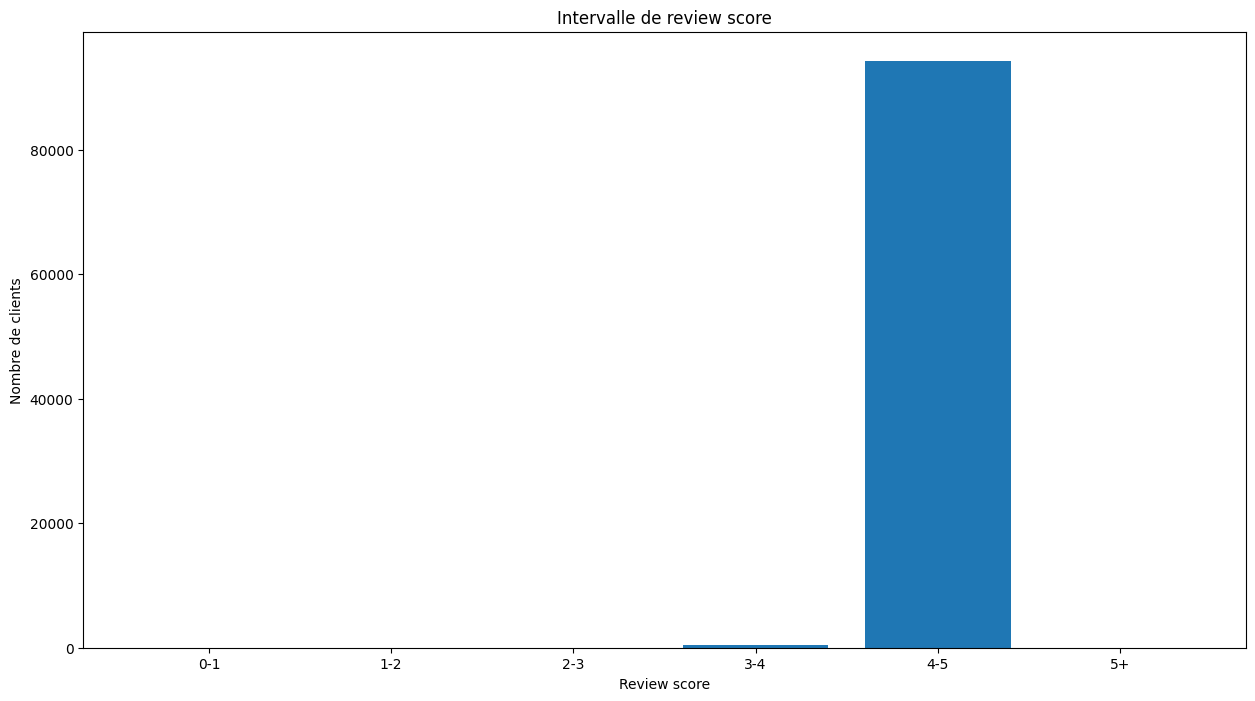

In [ ]:
plt.figure(figsize=(15, 8))

bins = [0, 1, 2, 3, 4, 6, 10]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5+']

type_client_2['Score review_bin'] = pd.cut(type_client_2['Score review'], bins=bins, labels=labels)

bin_counts = type_client_2['Score review_bin'].value_counts().sort_index()

# Création de l'histogramme
plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('Review score')
plt.ylabel('Nombre de clients')
plt.title("Intervalle de review score")
plt.show()

>>>> #### **Analyses**

>> **Analysons les differents clusters**

In [ ]:
# Créons une figure avec 1 ligne et 3 colonnes
fig, axes = plt.subplots(2, 2, figsize=(15, 5))

# Graphique 1
sns.scatterplot(x='Recence', y='Frequence', data=rfm_score_pca[['Recence', 'Frequence', 'Montant', 'Score review']], hue=rfm_score_pca['cluster'], palette='rainbow', ax=axes[0, 0])
axes[0, 0].set_title('Clustering : Recence vs Frequence')

# Graphique 2
sns.scatterplot(x='Frequence', y='Montant', data=rfm_score_pca[['Recence', 'Frequence', 'Montant', 'Score review']], hue=rfm_score_pca['cluster'], palette='rainbow', ax=axes[0, 1])
axes[0, 1].set_title('Clustering : Frequence vs Montant')

# Graphique 3
sns.scatterplot(x='Recence', y='Montant', data=rfm_score_pca[['Recence', 'Frequence', 'Montant', 'Score review']], hue=rfm_score_pca['cluster'], palette='rainbow', ax=axes[1, 0])
axes[1, 0].set_title('Clustering : Recence vs Montant')

# Graphique 4
sns.scatterplot(x='Score review', y='Montant', data=rfm_score_pca[['Recence', 'Frequence', 'Montant', 'Score review']], hue=rfm_score_pca['cluster'], palette='rainbow', ax=axes[1, 1])
axes[1, 1].set_title('Clustering : Review Score vs Montant')

# Ajustons l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichons la figure
plt.show()

In [ ]:
# Créons une figure avec 1 ligne et 3 colonnes
fig, axes = plt.subplots(2, 2, figsize=(15, 5))

# Graphique 1
sns.boxplot(x=rfm_score_pca['cluster'], y='Recence', data=rfm_score_pca[['Recence', 'Frequence', 'Montant', 'Score review']], showfliers=False, ax=axes[0, 0])
axes[0, 0].set_title('Clustering : Recence')

# Graphique 2
sns.boxplot(x=rfm_score_pca['cluster'], y='Frequence', data=rfm_score_pca[['Recence', 'Frequence', 'Montant', 'Score review']], showfliers=True, ax=axes[0, 1])
axes[0, 1].set_title('Clustering : Frequence')

# Graphique 3
sns.boxplot(x=rfm_score_pca['cluster'], y='Montant', data=rfm_score_pca[['Recence', 'Frequence', 'Montant', 'Score review']], showfliers=False, ax=axes[1, 0])
axes[1, 0].set_title('Clustering : Montant')

# Graphique 4
sns.boxplot(x=rfm_score_pca['cluster'], y='Score review', data=rfm_score_pca[['Recence', 'Frequence', 'Montant', 'Score review']], showfliers=False, ax=axes[1, 1])
axes[1, 1].set_title('Clustering : Review Score')

# Ajustons l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichons la figure
plt.show()

# **Coefficients de silhouette : comparaison et analyses**

> ## **Pour la RFM normale**

In [ ]:
print("Coefficient de silhouette pour K-means RFM :", meilleur_coef_silhouette_RFM_KCL)
print("Coefficient de silhouette pour K-means RFM PCA :", meilleur_coef_silhouette_RFM_pca)
print("Coefficient de silhouette pour le clustering hiérarchique RFM :", meilleur_coef_silhouette_RFM_CLH)

> ## **Pour la RFM avec score review**

In [ ]:
print("Coefficient de silhouette pour K-means RFM avec score review  :", meilleur_coef_silhouette_review_klc)
print("Coefficient de silhouette pour K-means RFM avec score review (PCA) :", meilleur_coef_silhouette_review_pca)
print("Coefficient de silhouette pour le clustering hiérarchique RFM avec score review :", silhouette_coef_review_CLH)

# **Choix du modèle final**

> ## **RFM normale**

Au vu de l'analyse des différents coefficient de silhouette, le modèle que je selectionne est le **PCA Clustering**

In [ ]:
from IPython.display import display, Image

In [ ]:
# Afficher l'image sauvegardée
display(Image(filename='Methode_du_coudes_RFM_normal.png'))

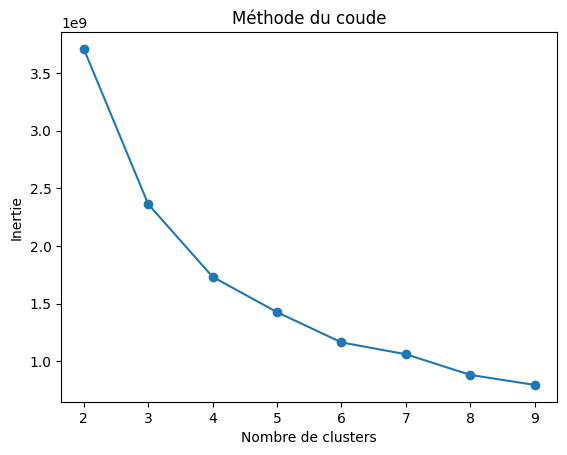

In [ ]:
# Afficher l'image sauvegardée
display(Image(filename='Clustering_Results_RFM_normal.png'))

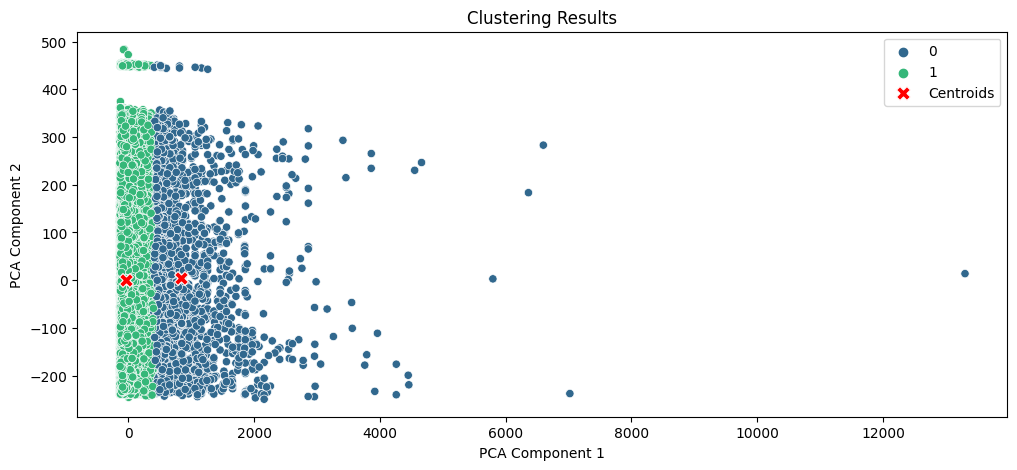

> ## **RFM avec review score**

Au vu de l'analyse des différents coefficient de silhouette, le modèle que je selectionne est le **PCA Clustering**

In [ ]:
from IPython.display import display, Image

In [ ]:
# Afficher l'image sauvegardée
display(Image(filename='Methode_du_coude_RFM_avec_RScore.png'))

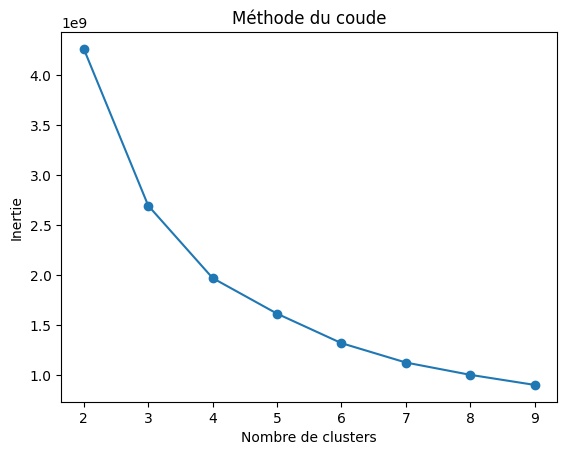

In [ ]:
# Afficher l'image sauvegardée
display(Image(filename='Clustering_Results_RFM_avec_RScore.png'))

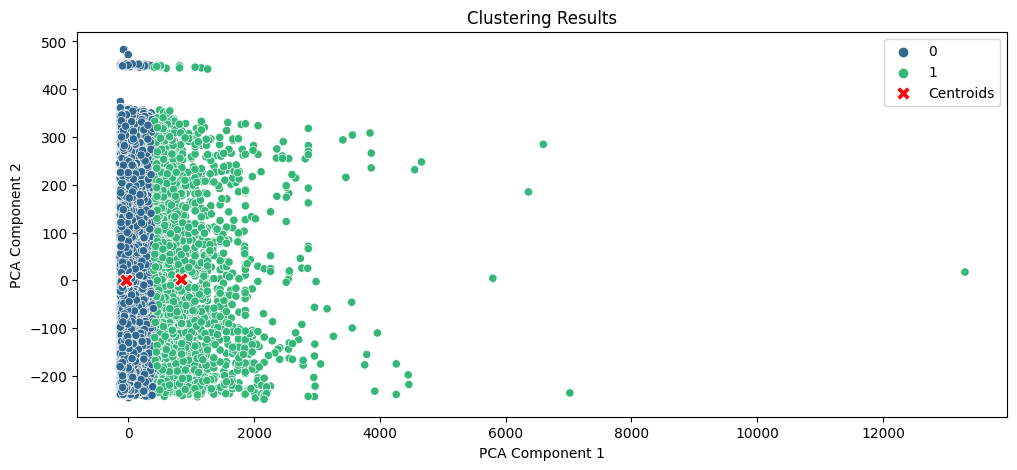